# Data Project 1: EDA & Data Cleaning

Deeksha LNU

Jasnoor Kaur Khangura

Ravneet Singh Plaha

Rahul Singla

#**Understanding**

**NPRI Dataset: Data Cleaning and Analysis**

**Background:**

The National Pollutant Release Inventory (NPRI) is Canada's public registry that tracks the annual release, disposal, and transfer of pollutants from industrial and commercial facilities. Established in 1992, the NPRI ensures transparency by providing data on pollutants released to the environment. It serves as an essential tool for tracking pollution trends and regulatory compliance across Canada.

The dataset includes records of pollutants released to air, water, and land, along with data on the disposal and transfer of these pollutants for further treatment. For this analysis, we focus on emissions of nitrogen oxides (NOx) and carbon monoxide (CO), two key pollutants released from burning fossil fuels.

This dataset spans from 2000 to 2022, a period that includes 2019, the year Canada’s federal carbon pricing system was introduced. This allows us to evaluate pre- and post-carbon pricing emission trends, particularly focusing on whether this policy has reduced NOx and CO emissions.

The dataset is divided into three categories:

**Releases**: Data on pollutants released directly into air, water, or land.

**Disposals and Transfers:** Information on pollutants that were disposed of on-site or transferred off-site for treatment.

**Comments:**Additional information providing context or explanations for specific data points.

**Objectives:**

The primary purpose of this analysis is to explore and clean the NPRI dataset to ensure it is ready for further analysis in determining whether carbon pricing has impacted emissions.

 Specifically, we aim to:

Address missing values, correct data types, and remove duplicates to ensure data quality.
Visualize the relationships between different variables using a correlation heatmap to identify patterns and trends.
Prepare cleaned datasets for future analytical tasks, such as predicting future decreases in NOx and CO emissions as the carbon pricing system gradually increases by $15 per year from 2023 to 2030.

Carbon pricing is an economic incentive designed to reduce emissions by increasing the cost of emitting pollutants like NOx and CO. As the price per tonne of carbon emissions rises, industries face greater financial pressure to adopt cleaner technologies or shift toward renewable energy sources. In regions like Europe and California, carbon pricing has led to significant reductions in greenhouse gases. By analyzing the NPRI dataset, we aim to assess whether Canada's federal carbon pricing system, introduced in 2019, is showing similar results. This analysis is critical for informing future policy decisions and adjusting pricing mechanisms to achieve national emission reduction targets

This initial exploration and cleaning of the NPRI dataset will lay the foundation for predicting future reductions in NOx and CO emissions as carbon pricing continues to increase by $15 per year from 2023 to 2030. The findings from this analysis will be critical in shaping long-term emission reduction strategies, as both government policymakers and industry leaders need to understand the projected impacts of higher carbon prices on pollution levels. The ability to forecast these trends will help ensure that Canada's climate targets are met and that industries remain competitive in a low-carbon economy.



# Description of Columns of Releases

**Reporting_Year / Année**: The year in which the pollutant data was reported.

**NPRI_ID / No_INRP**: Unique identification number for the reporting facility.

**Number of employees**: The total number of employees at the facility.

**Company_Name / Dénomination_sociale_de_l'entreprise**: The name of the company owning the facility.

**Facility_Name / Installation**: The name of the individual facility reporting the pollutant data.

**NAICS / Code_SCIAN**: North American Industry Classification System code for the facility.

**NAICS Title / Titre Code_SCIAN**: The title or description corresponding to the NAICS code.

**PROVINCE**: The province where the facility is located.

**City**: The city where the facility is located.

**Latitude**: The geographical latitude of the facility.

**Longitude**: The geographical longitude of the facility.

**CAS_Number / No_CAS**: The Chemical Abstracts Service (CAS) number, which uniquely identifies each chemical substance reported.

**Substance Name (English) / Nom de substance (Anglais)**: The name of the substance being reported, in both English and French.

**Units / Unités**: The units in which the pollutants are reported (e.g., tonnes, kg).


**Estimation_Method / Méthode_d’estimation**: The method used to estimate the pollutant release.


**Release to Air - Fugitive**: The amount of pollutants released into the air from non-point sources, such as equipment leaks.

**Release to Air - Other Non-Point**: Pollutants released into the air from other non-point sources.

**Release to Air - Road dust**: Pollutants released into the air as road dust.

**Release to Air - Spills**: The amount of pollutants released into the air due to spills.

**Release to Air - Stack / Point**: Pollutant releases to air from stacks or point sources.

**Release to Air - Storage / Handling**: Pollutant releases to air from storage or handling activities.

**Releases to Land - Leaks**: Pollutant releases to land due to leaks.

**Releases to Land - Other**: Other types of pollutant releases to land not covered by specific categories.

**Releases to Land - Spills**: Pollutant releases to land due to spills.

**Releases to Water Bodies - Direct Discharges**: Pollutant releases directly into water bodies.

**Releases to Water Bodies - Leaks**: Pollutant releases to water bodies due to leaks.

**Releases to Water Bodies - Spills**: Pollutant releases to water bodies due to spills.

**Sum of release to all media (<1tonne)**: Total of all releases to air, land, and water bodies, for amounts less than one tonne.


# **Team's ML problem**

Has the federal carbon pricing system (started in 2019) decreased emissions of nitrogen oxides and carbon monoxide (substances released from burning fossil fuels)? And if so, what are the predicted decreases in the release of these substances as the carbon pricing system gradually increases in price?

a. Federal carbon pricing went into effect in 2019 at 20 dollars a Tonnes, increasing by 10 dollars each year to 50 dollars
per Tonnes in 2022. From 2023 to 2030, the pricing will increase by 15 dollars per year.

i. It is important to keep in mind that some provinces already have carbon pricing systems in
place, more info can be found here.

# Importing necessary libraries and datasets

In [ ]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Importing data from CSV files into Pandas dataframes
# 'latin1' encoding is specified to handle any special characters (like accents) in the dataset

# Reading the 'NPRI_2000-2022.csv' file and storing it in the dataframe 'data1'
data1 = pd.read_csv('NPRI_2000-2022.csv', encoding='latin1')

# Reading the 'disposal and transfer.csv' file and storing it in the dataframe 'data2'
data2 = pd.read_csv('disposal and transfer.csv', encoding='latin1')

# Reading the 'comments.csv' file and storing it in the dataframe 'data3'
data3 = pd.read_csv('comments.csv', encoding='latin1')


<ipython-input-2-b5c1eb8ecdcb>:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('NPRI_2000-2022.csv', encoding='latin1')
<ipython-input-2-b5c1eb8ecdcb>:8: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv('disposal and transfer.csv', encoding='latin1')


# **Issue Detection**

Here, we’re going to make sure our data is in great shape before we start analyzing or building models. Why? Because working with clean, reliable data gives us the best chance of getting accurate results. Let’s take a look at the key issues we’re going to detect and fix:

**Missing Values**: We’re going to check if any data is missing. Missing values (often called NaN) can throw off our calculations or cause our models to underperform. By finding where the gaps are, we can decide how to handle them—whether it’s filling them in, removing them, or some other fix. This will help us avoid problems down the line.

**Duplicate Values**: We’re also going to look for any errors in the data, like duplicated rows or weird entries that don’t make sense. These errors can sneak in when the data is collected or entered, and they can mess up our analysis if we don’t catch them early. We’ll scan for duplicates and take a closer look at columns to make sure everything looks right.

**Column Data Type**s: Lastly, we’re going to check that each column has the correct data type. For example, numbers should be stored as numerical data, and text should be in string format. If any data types are off, like numbers stored as text, we’re going to fix them so we can properly run calculations and models later.

**How Did We Approach This Issue**?

**Detecting Missing Values**: We’ll use isnull().sum() to count how many values are missing in each column. This helps us quickly spot where the gaps are.
Finding Duplicates and Errors: Using duplicated() will show us if there are any repeated rows, and we’ll also inspect the data for anything that doesn’t look right.

What we visualized is that data is kind of encoded in itself. For example, if an industry is releasing a particular substance by Stack/Point, it will leave all the other air release methods. So we replaced the null value of other release methods with zero and calculated the Total_Releases_to_Air, but we did not drop the other columns because we might do one-hot encoding on these columns in the future.

**Handling Duplicates**: We did not find any duplicate values.

**Checking Data Types**:


For data1: We converted Reporting year to datetime format, NAICS codes to int data type as they are numerical identifiers for industries, and casting them as integers ensures they can be used properly in operations like grouping or filtering. We also converted Number of Employees to numeric data type since this column may contain non-numeric values (e.g., missing or erroneous entries), we used 'pd.to_numeric' with 'errors=coerce' to convert invalid entries to NaN and ensure the column is properly treated as a numeric type for analysis. We also converted Substances, Provinces, Estimation Method and units to Category


In [ ]:
data1.head()

ï»¿Reporting_Year / AnnÃ©e  NPRI_ID / No_INRP Number of employees  \
0                        2000                  1                 440   
1                        2000                  1                 440   
2                        2000                  1                 440   
3                        2000                  1                 440   
4                        2000                  1                 440   

  Company_Name / DÃ©nomination_sociale_de_l'entreprise  \
0             Alberta-Pacific Forest Industries Inc.     
1             Alberta-Pacific Forest Industries Inc.     
2             Alberta-Pacific Forest Industries Inc.     
3             Alberta-Pacific Forest Industries Inc.     
4             Alberta-Pacific Forest Industries Inc.     

  Facility_Name / Installation  NAICS / Code_SCIAN  \
0                      (blank)              322112   
1                      (blank)              322112   
2                      (blank)              322112   
3                      (blank)              322112   
4                      (blank)              322112   

  NAICS Title / Titre Code_SCIAN PROVINCE                 City   Latitude  \
0            Chemical pulp mills       AB  County of Athabasca  54.923116   
1            Chemical pulp mills       AB  County of Athabasca  54.923116   
2            Chemical pulp mills       AB  County of Athabasca  54.923116   
3            Chemical pulp mills       AB  County of Athabasca  54.923116   
4            Chemical pulp mills       AB  County of Athabasca  54.923116   

   ...  Release to Air - Spills  Release to Air - Stack / Point    \
0  ...                       NaN                            5.200   
1  ...                       NaN                          113.000   
2  ...                       NaN                              NaN   
3  ...                       NaN                            7.670   
4  ...                       NaN                            0.665   

  Release to Air - Storage / Handling  Releases to Land - Leaks  \
0                                  NaN                      NaN   
1                                  NaN                      NaN   
2                                  NaN                      NaN   
3                                  NaN                      NaN   
4                                  NaN                      NaN   

  Releases to Land - Other   Releases to Land - Spills   \
0                       NaN                         NaN   
1                       NaN                         NaN   
2                       NaN                         NaN   
3                       NaN                         NaN   
4                       NaN                         NaN   

   Releases to Water Bodies - Direct Discharges   \
0                                            NaN   
1                                            NaN   
2                                            0.0   
3                                            NaN   
4                                            NaN   

   Releases to Water Bodies - Leaks  Releases to Water Bodies - Spills   \
0                               NaN                                 NaN   
1                               NaN                                 NaN   
2                               NaN                                 NaN   
3                               NaN                                 NaN   
4                               NaN                                 NaN   

   Sum of release to all media (<1tonne)  
0                                    NaN  
1                                    NaN  
2                                    NaN  
3                                    NaN  
4                                    NaN  

[5 rows x 28 columns]

In [ ]:
data1.describe()

ï»¿Reporting_Year / AnnÃ©e  NPRI_ID / No_INRP  NAICS / Code_SCIAN  \
count               737516.000000      737516.000000       737516.000000   
mean                  2012.267601       11248.268386       289175.551820   
std                      6.400156        9352.868266        94788.542197   
min                   2000.000000           1.000000       111120.000000   
25%                   2007.000000        3775.000000       211113.000000   
50%                   2012.000000        7114.000000       312140.000000   
75%                   2018.000000       18093.000000       327120.000000   
max                   2022.000000      306556.000000       913910.000000   

            Latitude      Longitude  Release to Air - Fugitive  \
count  733434.000000  733434.000000              125032.000000   
mean       49.644636     -97.375436                  61.156824   
std         5.155658      20.184399                 797.572502   
min         0.000000    -140.883600                   0.000000   
25%        45.431000    -114.767700                   0.051000   
50%        49.795100    -104.630100                   0.796000   
75%        53.508500     -79.540060                   7.582000   
max        82.498758       0.000000               58433.900000   

       Release to Air - Other Non-Point   Release to Air - Road dust    \
count                       30880.000000                  29861.000000   
mean                           91.455034                    117.236013   
std                          1628.905004                    856.012131   
min                             0.000000                      0.000000   
25%                             0.013000                      0.505400   
50%                             0.490000                      3.561900   
75%                             7.458500                     22.000000   
max                         91138.200000                  39992.961050   

       Release to Air - Spills   Release to Air - Stack / Point    \
count               9181.000000                     513282.000000   
mean                   1.742604                        144.203321   
std                   22.223163                       2014.861249   
min                    0.000000                          0.000000   
25%                    0.000000                          0.429000   
50%                    0.000300                          4.037595   
75%                    0.040000                         37.389000   
max                 1554.400000                     235907.000000   

       Release to Air - Storage / Handling   Releases to Land - Leaks  \
count                          80004.000000                910.000000   
mean                              23.462437                  0.356315   
std                              218.305058                  2.586239   
min                                0.000000                  0.000000   
25%                                0.015000                  0.000000   
50%                                0.358000                  0.000000   
75%                                3.953000                  0.000000   
max                            17883.110000                 39.058000   

       Releases to Land - Other   Releases to Land - Spills   \
count                5668.000000                 4470.000000   
mean                  515.614162                    5.090716   
std                  3181.280880                   93.378082   
min                     0.000000                    0.000000   
25%                     0.001000                    0.000000   
50%                     5.000000                    0.002000   
75%                    47.000000                    0.030000   
max                152270.000000                 4500.100000   

       Releases to Water Bodies - Direct Discharges   \
count                                   53188.000000   
mean                                       79.052084   
std                                

In [ ]:
data2.head()

ï»¿Reporting_Year / AnnÃ©e  NPRI_ID / No_INRP Number of employees  \
0                        2000                  1                 440   
1                        2000                  1                 440   
2                        2000                  4                 500   
3                        2000                  4                 500   
4                        2000                  4                 500   

  Company_Name / DÃ©nomination_sociale_de_l'entreprise  \
0             Alberta-Pacific Forest Industries Inc.     
1             Alberta-Pacific Forest Industries Inc.     
2                           Pine Falls Paper Company     
3                           Pine Falls Paper Company     
4                           Pine Falls Paper Company     

  Facility_Name / Installation  NAICS / Code_SCIAN  \
0                      (blank)              322112   
1                      (blank)              322112   
2                   Pine Falls              322122   
3                   Pine Falls              322122   
4                   Pine Falls              322122   

  NAICS Title / Titre Code_SCIAN PROVINCE                 City   Latitude  \
0            Chemical pulp mills       AB  County of Athabasca  54.923116   
1            Chemical pulp mills       AB  County of Athabasca  54.923116   
2                Newsprint mills       MB           PINE FALLS  50.568600   
3                Newsprint mills       MB           PINE FALLS  50.568600   
4                Newsprint mills       MB           PINE FALLS  50.568600   

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment  \
0                                                NaN                                 
1                                                NaN                                 
2                                                NaN                                 
3                                                NaN                                 
4                                                NaN                                 

  Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment  \
0                                                NaN                              
1                                                NaN                              
2                                                NaN                              
3                                                NaN                              
4                                                NaN                              

  Off-site Transfers for Treatment Prior to Final Disposal - Incineration / Thermal  \
0                                                NaN                                  
1                                                NaN                                  
2                                                NaN                                  
3                                                NaN                                  
4                                                NaN                                  

  Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant  \
0                                                NaN                                            
1                                                NaN                                            
2                                                NaN                                            
3                                                NaN                                            
4                                                NaN                                            

  Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment  \
0                                                NaN                              
1                                                NaN                              
2

In [ ]:
data2.describe()

ï»¿Reporting_Year / AnnÃ©e  NPRI_ID / No_INRP  NAICS / Code_SCIAN  \
count               191645.000000      191645.000000       191645.000000   
mean                  2011.289958        6494.859626       322061.467171   
std                      6.513027        6824.137165        96060.473632   
min                   2000.000000           1.000000       111120.000000   
25%                   2006.000000        2451.000000       221320.000000   
50%                   2011.000000        4540.000000       325510.000000   
75%                   2017.000000        6926.000000       334410.000000   
max                   2022.000000       33869.000000       913910.000000   

            Latitude      Longitude  Off-site Disposal - Land Treatment  \
count  190474.000000  190474.000000                        10921.000000   
mean       47.814052     -90.788715                           82.475758   
std         4.948937      19.328259                          677.826775   
min         0.000000    -137.228150                            0.000000   
25%        43.723090    -113.082400                            0.440000   
50%        46.051500     -80.381700                            6.573100   
75%        51.191300     -78.752910                           31.950000   
max        82.498758       0.000000                        32702.611600   

       Off-site Disposal - Landfill  Off-site Disposal - Storage  \
count                  5.572900e+04                  5934.000000   
mean                   1.279657e+03                   471.825394   
std                    2.479990e+04                 10103.940772   
min                    0.000000e+00                     0.000000   
25%                    4.500000e-02                     0.014633   
50%                    1.000000e+00                     0.292950   
75%                    1.755000e+01                     7.466000   
max                    2.562068e+06                713228.700000   

       Off-site Disposal - Tailings Management  \
count                               341.000000   
mean                               3910.340459   
std                               18633.422430   
min                                   0.000000   
25%                                  34.720000   
50%                                 114.400000   
75%                                 420.630000   
max                              206521.000000   

       Off-site Disposal - Underground Injection  ...  \
count                                8230.000000  ...   
mean                                  640.575267  ...   
std                                 10782.709557  ...   
min                                     0.000000  ...   
25%                                     0.030000  ...   
50%                                     0.620000  ...   
75%                                     9.627000  ...   
max                                431336.030000  ...   

       Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment  \
count                                        3129.000000                                 
mean                                           37.566374                                 
std                                           374.865827                                 
min                                             0.000000                                 
25%                                             0.004100                                 
50%                                             0.219000                                 
75%                                             5.271000                                 
max                                         16541.609000                                 

       Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment  \
count                                       12632.000000                               
mean                                          421.461882                         

In [ ]:
data3.head()

ï»¿Reporting_Year / AnnÃ©e  NPRI_ID / No_INRP  \
0                        2022                  1   
1                        2022                  1   
2                        2022                  1   
3                        2022                  1   
4                        2022                  1   

  Company_Name / DÃ©nomination_sociale_de_l'entreprise  \
0             Alberta-Pacific Forest Industries Inc.     
1             Alberta-Pacific Forest Industries Inc.     
2             Alberta-Pacific Forest Industries Inc.     
3             Alberta-Pacific Forest Industries Inc.     
4             Alberta-Pacific Forest Industries Inc.     

             Facility_Name / Installation  NAICS / Code_SCIAN  \
0  Alberta-Pacific Forest Industries Inc.              322112   
1  Alberta-Pacific Forest Industries Inc.              322112   
2  Alberta-Pacific Forest Industries Inc.              322112   
3  Alberta-Pacific Forest Industries Inc.              322112   
4  Alberta-Pacific Forest Industries Inc.              322112   

  NAICS Title EN / Titre Code SCIAN EN NAICS Title FR / Titre Code SCIAN FR  \
0                  Chemical pulp mills             Usines de pÃ¢te chimique   
1                  Chemical pulp mills             Usines de pÃ¢te chimique   
2                  Chemical pulp mills             Usines de pÃ¢te chimique   
3                  Chemical pulp mills             Usines de pÃ¢te chimique   
4                  Chemical pulp mills             Usines de pÃ¢te chimique   

  PROVINCE CAS_Number / No_CAS  \
0       AB            100-42-5   
1       AB            108-10-1   
2       AB            108-95-2   
3       AB            118-74-1   
4       AB            120-12-7   

  Substance Name (English) / Nom de substance (Anglais)  \
0                                            Styrene      
1                             Methyl isobutyl ketone      
2                             Phenol (and its salts)      
3                                  Hexachlorobenzene      
4                                         Anthracene      

  Substance Name (French) / Nom de substance (FranÃ§ais)  \
0                                           StyrÃ¨ne       
1                             MÃ©thylisobutylcÃ©tone       
2                              PhÃ©nol (et ses sels)       
3                                 HexachlorobenzÃ¨ne       
4                                        AnthracÃ¨ne       

  Comment_Type_Name (English) Type_de_commentaire (Anglais)  \
0                           On-site releases comment          
1                           On-site releases comment          
2                           On-site releases comment          
3                           On-site releases comment          
4                           On-site releases comment          

  Comment_Type_Name (French) Type_de_commentaire (FranÃ§ais)  \
0             Commentaire sur les rejets sur le site           
1             Commentaire sur les rejets sur le site           
2             Commentaire sur les rejets sur le site           
3             Commentaire sur les rejets sur le site           
4             Commentaire sur les rejets sur le site           

                              Comment / Commentaires  
0  In 2022 less wood waste (hog fuel) was combust...  
1  In 2022 less wood waste (hog fuel) was combust...  
2  Reduction in (bleached pulp) production rates ...  
3  In 2022 more natural gas was combusted in the ...  
4  In 2022 less black liquor was put through the ...

# Checking for missing values

In [ ]:
# Checking for missing values (NaN) in the 'data1' dataset
data1.isnull().sum()


ï»¿Reporting_Year / AnnÃ©e                                    0
NPRI_ID / No_INRP                                             0
Number of employees                                         616
Company_Name / DÃ©nomination_sociale_de_l'entreprise          0
Facility_Name / Installation                               1176
NAICS / Code_SCIAN                                            0
NAICS Title / Titre Code_SCIAN                                0
PROVINCE                                                      0
City                                                      90764
Latitude                                                   4082
Longitude                                                  4082
CAS_Number / No_CAS                                           0
Substance Name (English) / Nom de substance (Anglais)         0
Units / UnitÃ©s                                               0
Estimation_Method / MÃ©thode_dâestimation                   0
Release to Air - Fugitive                                612484
Release to Air - Other Non-Point                         706636
Release to Air - Road dust                               707655
Release to Air - Spills                                  728335
Release to Air - Stack / Point                           224234
Release to Air - Storage / Handling                      657512
Releases to Land - Leaks                                 736606
Releases to Land - Other                                 731848
Releases to Land - Spills                                733046
Releases to Water Bodies - Direct Discharges             684328
Releases to Water Bodies - Leaks                         736774
Releases to Water Bodies - Spills                        734436
Sum of release to all media (<1tonne)                    687331
dtype: int64

In [ ]:
# Checking for missing values (NaN) in the 'data2' dataset
data2.isnull().sum()


ï»¿Reporting_Year / AnnÃ©e                                                                          0
NPRI_ID / No_INRP                                                                                   0
Number of employees                                                                                94
Company_Name / DÃ©nomination_sociale_de_l'entreprise                                                0
Facility_Name / Installation                                                                      626
NAICS / Code_SCIAN                                                                                  0
NAICS Title / Titre Code_SCIAN                                                                      0
PROVINCE                                                                                            0
City                                                                                             3739
Latitude                                                                                         1171
Longitude                                                                                        1171
CAS_Number / No_CAS                                                                                 0
Substance Name (English) / Nom de substance (Anglais)                                               0
Units / UnitÃ©s                                                                                     0
Estimation_Method / MÃ©thode_dâestimation                                                         0
Off-site Disposal - Land Treatment                                                             180724
Off-site Disposal - Landfill                                                                   135916
Off-site Disposal - Storage                                                                    185711
Off-site Disposal - Tailings Management                                                        191304
Off-site Disposal - Underground Injection                                                      183415
Off-site Disposal - Waste Rock management                                                      191507
Off-site Transfers for Recycling - Energy Recovery                                             181878
Off-site Transfers for Recycling - Other                                                       181224
Off-site Transfers for Recycling - Recovery of Acids and Bases                                 190801
Off-site Transfers for Recycling - Recovery of Catalysts                                       190208
Off-site Transfers for Recycling - Recovery of Inorganic Materials (not metals)                189898
Off-site Transfers for Recycling - Recovery of Metals and Metal Compounds                      161717
Off-site Transfers for Recycling - Recovery of Organic Substances (not solvents)               183080
Off-site Transfers for Recycling - Recovery of Pollution Abatement Residues                    189496
Off-site Transfers for Recycling - Recovery of Solvents                                        181281
Off-site Transfers for Recycling - Refining or Re-use of Used Oil                              187652
Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment                188516
Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment                  179013
Off-site Transfers for Treatment Prior to Final Disposal - Incineration / Thermal              166954
Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant    175238
Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment                  181681
On-site Disposal - Land Treatment                                                              187774
On-site Disposal - Landfill                                                                    173375
On-site Disposal - Tailings Management                                                         175573
On-site Disposal - Und

In [ ]:
# Checking for missing values (NaN) in the 'data3' dataset
data3.isnull().sum()


ï»¿Reporting_Year / AnnÃ©e                                       0
NPRI_ID / No_INRP                                                0
Company_Name / DÃ©nomination_sociale_de_l'entreprise             0
Facility_Name / Installation                                  4005
NAICS / Code_SCIAN                                               0
NAICS Title EN / Titre Code SCIAN EN                            16
NAICS Title FR / Titre Code SCIAN FR                            16
PROVINCE                                                         0
CAS_Number / No_CAS                                              0
Substance Name (English) / Nom de substance (Anglais)            0
Substance Name (French) / Nom de substance (FranÃ§ais)           0
Comment_Type_Name (English) Type_de_commentaire (Anglais)        0
Comment_Type_Name (French) Type_de_commentaire (FranÃ§ais)       0
Comment / Commentaires                                        4275
dtype: int64

# Checking for duplicate values

  Duplicates can skew analysis and lead to inaccurate results.

  Identify duplicates using df.duplicated().sum().

  Remove duplicates using df.drop_duplicates().


In [ ]:
# Checking for duplicate rows in the 'data1' dataset
data1.duplicated().sum()


0

In [ ]:
# Checking for duplicate rows in the 'data2' dataset
data2.duplicated().sum()


0

In [ ]:
# Checking for duplicate rows in the 'data3' dataset
data3.duplicated().sum()


0

After checking all three datasets, we found **zero duplicate rows**. This is a good sign, as it means there are no repeated entries that could affect the accuracy of our analysis.

*********************************************************

# Cleaning the column names in all three datasets to remove any special characters or accents

In [ ]:
# 'str.encode('ascii', 'ignore')' converts the column names to ASCII encoding and ignores any non-ASCII characters (like accents or special symbols)
# 'str.decode('ascii')' decodes the column names back to a string format after removing the unwanted characters
# This ensures that the column names are clean and free of special characters, which can sometimes cause issues during analysis or modeling

# Cleaning the column names in 'train_data1'
data1.columns = data1.columns.str.encode('ascii', 'ignore').str.decode('ascii')

# Cleaning the column names in 'train_data2'
data2.columns = data2.columns.str.encode('ascii', 'ignore').str.decode('ascii')

# Cleaning the column names in 'train_data3'
data3.columns = data3.columns.str.encode('ascii', 'ignore').str.decode('ascii')


In [ ]:
data1['Reporting_Year / Anne'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

In [ ]:
# Checking the data types of each column in the 'data1' dataset
data1.dtypes

Reporting_Year / Anne                                      int64
NPRI_ID / No_INRP                                          int64
Number of employees                                       object
Company_Name / Dnomination_sociale_de_l'entreprise        object
Facility_Name / Installation                              object
NAICS / Code_SCIAN                                         int64
NAICS Title / Titre Code_SCIAN                            object
PROVINCE                                                  object
City                                                      object
Latitude                                                 float64
Longitude                                                float64
CAS_Number / No_CAS                                       object
Substance Name (English) / Nom de substance (Anglais)     object
Units / Units                                             object
Estimation_Method / Mthode_destimation                    object
Release to Air - Fugitive                                float64
Release to Air - Other Non-Point                         float64
Release to Air - Road dust                               float64
Release to Air - Spills                                  float64
Release to Air - Stack / Point                           float64
Release to Air - Storage / Handling                      float64
Releases to Land - Leaks                                 float64
Releases to Land - Other                                 float64
Releases to Land - Spills                                float64
Releases to Water Bodies - Direct Discharges             float64
Releases to Water Bodies - Leaks                         float64
Releases to Water Bodies - Spills                        float64
Sum of release to all media (<1tonne)                    float64
dtype: object

# Handling of data types

In [ ]:
# Converting the 'Reporting_Year / Anne' column to datetime format
# This column represents the year in which the data was reported, and converting it to datetime format (specifically year format) allows us to easily perform time-based operations like sorting or filtering by year
data1['Reporting_Year / Anne'] = pd.to_datetime(data1['Reporting_Year / Anne'], format='%Y',errors='coerce')

# Converting 'Number of employees' to a numeric data type
# Since this column may contain non-numeric values (e.g., missing or erroneous entries), we use 'pd.to_numeric' with 'errors=coerce' to convert invalid entries to NaN and ensure the column is properly treated as a numeric type for analysis
data1['Number of employees'] = pd.to_numeric(data1['Number of employees'], errors='coerce')

# Converting the 'NAICS / Code_SCIAN' column to integer type
# NAICS codes are numerical identifiers for industries, and casting them as integers ensures they can be used properly in operations like grouping or filtering
# data1['NAICS / Code_SCIAN'] = data1['NAICS / Code_SCIAN'].astype(int)
data1['NAICS / Code_SCIAN'] = pd.to_numeric(data1['NAICS / Code_SCIAN'], errors='coerce')


In [ ]:
data1['Substance Name (English) / Nom de substance (Anglais)'].unique()

array(['Chlorine dioxide', 'Methanol', 'Chloroform', 'Acetaldehyde',
       'Hydrochloric acid', 'Phosphoric acid', 'Sulphuric acid',
       'Chlorine', 'Manganese (and its compounds)',
       'Zinc (and its compounds)', 'Ammonia (total)',
       'Nitrate ion in solution at pH >= 6.0', 'Hydrogen sulphide',
       'Pyrene', 'Benzo[ghi]perylene', 'Benzo[e]pyrene',
       'Indeno[1,2,3-cd]pyrene', 'Perylene', 'Benzo[b]fluoranthene',
       'Fluoranthene', 'Benzo[k]fluoranthene', 'Benzo[a]pyrene',
       'Dibenz[a,h]anthracene', 'Benz[a]anthracene', 'Phenanthrene',
       'Mercury (and its compounds)', 'Epichlorohydrin',
       'Phenol (and its salts)', 'Formaldehyde', 'Formic acid',
       'Diethanolamine (and its salts)', 'Methyl isobutyl ketone',
       'Toluene', '2-Butoxyethanol', 'Xylene (all isomers)',
       'Isopropyl alcohol', 'n-Butyl alcohol', 'Methyl ethyl ketone',
       'Phthalic anhydride', 'Polymeric diphenylmethane diisocyanate',
       'Ethylbenzene', 'i-Butyl alcohol', 

In [ ]:
substance_type = pd.CategoricalDtype(categories=['Chlorine dioxide', 'Methanol', 'Chloroform', 'Acetaldehyde',
       'Hydrochloric acid', 'Phosphoric acid', 'Sulphuric acid',
       'Chlorine', 'Manganese (and its compounds)',
       'Zinc (and its compounds)', 'Ammonia (total)',
       'Nitrate ion in solution at pH >= 6.0', 'Hydrogen sulphide',
       'Pyrene', 'Benzo[ghi]perylene', 'Benzo[e]pyrene',
       'Indeno[1,2,3-cd]pyrene', 'Perylene', 'Benzo[b]fluoranthene',
       'Fluoranthene', 'Benzo[k]fluoranthene', 'Benzo[a]pyrene',
       'Dibenz[a,h]anthracene', 'Benz[a]anthracene', 'Phenanthrene',
       'Mercury (and its compounds)', 'Epichlorohydrin',
       'Phenol (and its salts)', 'Formaldehyde', 'Formic acid',
       'Diethanolamine (and its salts)', 'Methyl isobutyl ketone',
       'Toluene', '2-Butoxyethanol', 'Xylene (all isomers)',
       'Isopropyl alcohol', 'n-Butyl alcohol', 'Methyl ethyl ketone',
       'Phthalic anhydride', 'Polymeric diphenylmethane diisocyanate',
       'Ethylbenzene', 'i-Butyl alcohol', 'N-Methyl-2-pyrrolidone',
       'Naphthalene', '1,2,4-Trimethylbenzene', 'HCFC-141b',
       'Copper (and its compounds)', 'Lead (and its compounds)',
       'Chromium (and its compounds)', 'Nickel (and its compounds)',
       'Sodium nitrite', 'Nonylphenol polyethylene glycol ether',
       'Ethylene glycol', 'Cyanides (ionic)', 'Styrene', 'n-Hexane',
       'Cyclohexane', 'Benzene', 'Nitric acid',
       'Methylenebis(phenylisocyanate)', 'Bis(2-ethylhexyl) adipate',
       'Maleic anhydride', 'Toluenediisocyanate (mixed isomers)',
       'Dicyclopentadiene', 'Cumene hydroperoxide', 'Methyl methacrylate',
       'o-Cresol (and its salts)', 'Trichloroethylene', 'Vinyl acetate',
       'Propylene', 'Ethylene', 'Dichloromethane', 'Hexachlorobenzene',
       'Dioxins and furans - total', 'Aluminum (fume or dust only)',
       'Hydrazine (and its salts)',
       'Nitrilotriacetic acid (and its salts)', 'Hydrogen fluoride',
       'Cresol (mixed isomers, and their salts)', 'Chloromethane',
       '1,1,2-Trichloroethane', '1,3-Butadiene', '1,2-Dichloroethane',
       '2,4-Dichlorophenol (and its salts)', '1,4-Dioxane',
       'Tetrachloroethylene', 'HCFC-123 (all isomers)',
       'Carbon tetrachloride', 'Hexachloroethane', 'Chloroethane',
       'Vinyl chloride', 'Ethylene oxide', 'HCFC-22', 'HCFC-142b',
       'Pentachloroethane', '1,1,2,2-Tetrachloroethane', 'Biphenyl',
       'Antimony (and its compounds)', 'Arsenic (and its compounds)',
       'Selenium (and its compounds)', 'Acrylic acid (and its salts)',
       'Molybdenum trioxide', '2,4-Dinitrotoluene', '2-Methoxyethanol',
       '2-Ethoxyethyl acetate', 'Di-n-octyl phthalate', 'Triethylamine',
       'Nonylphenol', 'Carbon disulphide', 'Cadmium (and its compounds)',
       'PAHs, total unspeciated', 'Ethyl acrylate', 'Butyl acrylate',
       'Dibutyl phthalate', 'Methyl acrylate', 'Benzo[j]fluoranthene',
       'Chrysene', 'Dibenzo[a,i]pyrene', 'Dibenz[a,j]acridine',
       'Cobalt (and its compounds)', 'Asbestos (friable form only)',
       'Dimethylamine', 'Bis(2-ethylhexyl) phthalate',
       '7H-Dibenzo[c,g]carbazole', '2,6-Di-t-butyl-4-methylphenol',
       'Aluminum oxide (fibrous forms only)', 'Lithium carbonate',
       'Acrylamide', 'Nonylphenol, industrial', 'Butyl benzyl phthalate',
       'Sulphur hexafluoride', 'p-Dichlorobenzene', 'o-Dichlorobenzene',
       'Benzyl chloride', 'Propylene oxide', 'Dimethyl sulphate',
       'Phosphorus (yellow or white only)', 'p-Cresol (and its salts)',
       'm-Cresol (and its salts)', 'Cumene', 'Fluorine', 'Anthracene',
       'sec-Butyl alcohol', 'Calcium fluoride', '2-Ethoxyethanol',
       'Dimethyl phthalate', 'tert-Butyl alcohol', 'CFC-12',
       'Cyclohexanol', 'Butyraldehyde', 'HCFC-122 (all isomers)',
       'Aniline (and its salts)', 'Vanadium (fume or dust)',
       'Sodium fluoride', 'Silver (and its compounds)',
       'Hydrogen cyanide', 'n-Nonylphenol (mixed isomers)', 'Halon 1301',
       'Titanium tetrachloride', 'Acrolein', 'Acrylonitrile', 'Isoprene',
       'Acetophenone', 'Chlorobenzene', 'Acetonitrile', 'Bromine',
       'N-Methylolacrylamide', 'Quinoline (and its salts)',
       'Diphenylamine', "p,p'-Methylenebis(2-chloroaniline)",
       'p-Phenylenediamine (and its salts)', '2-Mercaptobenzothiazole',
       'Bisphenol A', 'Diethyl phthalate', 'Methyl tert-butyl ether',
       'Catechol', 'Benzoyl peroxide', 'CFC-114',
       'Dimethylphenol (mixed isomers)', 'Toluene-2,4-diisocyanate',
       'Toluene-2,6-diisocyanate', '1,2-Butylene oxide',
       'Hydroquinone (and its salts)', 'Tetraethyl lead',
       'Vinylidene chloride', 'Phosgene',
       '1,1-Methylenebis(4-isocyanatocyclohexane)',
       'Cresol (all isomers, and their salts)',
       'Vanadium (except when in an alloy) and its compounds',
       'n,n-Dimethylformamide', 'Decabromodiphenyl oxide',
       'p-Nonylphenol polyethylene glycol ether',
       'HCFC-124 (all isomers)', 'Iron pentacarbonyl',
       'Chloroacetic acid (and its salts)', '4-tert-Octylphenol',
       'Alkanes, C10-13, chloro', 'Bromomethane',
       'Peracetic acid (and its salts)', 'Propionaldehyde',
       'p-Nitrophenol (and its salts)', 'Isophorone diisocyanate',
       'Nitrogen oxides (expressed as nitrogen dioxide)',
       'Carbon monoxide', 'Hexavalent chromium (and its compounds)',
       'Total particulate matter',
       'PM10 - Particulate Matter <= 10 Micrometers',
       'PM2.5 - Particulate Matter <= 2.5 Micrometers',
       'Volatile Organic Compounds (VOCs)', 'Sulphur dioxide', 'CFC-11',
       'C.I. Food Red 15', 'Nonylphenoxy ethanol', 'p-Quinone',
       'Pyridine (and its salts)',
       '2,2,4-Trimethylhexamethylene diisocyanate', 'Thiourea',
       '1,2,4-Trichlorobenzene', 'o-Phenylphenol (and salts)',
       'Phosphorus (total)', 'Nonylphenol and its ethoxylates',
       'Nitroglycerin', 'Carbonyl sulphide',
       'Octylphenol and its ethoxylates', 'Benzoyl chloride',
       'C.I. Basic Green 4', "p,p'-Methylenedianiline",
       '1,2-Dichloropropane', 'C.I. Basic Red 1', 'Allyl alcohol',
       'Acenaphthylene', 'Acenaphthene', 'Fluorene', 'Thorium dioxide',
       'Ethylene thiourea',
       'Total reduced sulphur (expressed as hydrogen sulphide)',
       '3-Methylcholanthrene', '7,12-Dimethylbenz[a]anthracene',
       '5-Methylchrysene', 'Dibenzo[a,h]pyrene', 'Dibenzo[a,l]pyrene',
       'Dibenzo[a,e]pyrene', 'Dibenz[a,h]acridine',
       'Dibenzo[a,e]fluoranthene', '1-Nitropyrene', 'Boron trifluoride',
       'Potassium bromate', 'Tetracycline hydrochloride',
       '1,1,1,2-Tetrachloroethane',
       "3,3'-Dichlorobenzidine dihydrochloride", 'Isobutyraldehyde',
       'Thallium (and its compounds)', '2-(2-Methoxyethoxy)ethanol',
       'Quinoline',
       'Chlorinated alkanes, medium-chain, CnHxCl(2n+2–x), 14 = n = 17',
       'Vanadium (and its compounds)',
       "1,4-Benzenediamine, N,N'-mixed phenyl and tolyl derivatives",
       'Naphthenic acid fraction compounds (and their salts)',
       'N,N-Dimethylaniline (and its salts)',
       '2-Propanone, reaction products with diphenylamine',
       'Volatile Organic Compounds (Total)'])

data1["Substance Name (English) / Nom de substance (Anglais)"] = data1["Substance Name (English) / Nom de substance (Anglais)"].astype(substance_type)

In [ ]:
data1['PROVINCE'].unique()

array(['AB', 'MB', 'QC', 'ON', 'BC', 'NB', 'SK', 'NT', 'NS', 'PE', 'NL',
       'NU', 'YT'], dtype=object)

In [ ]:
province_type = pd.CategoricalDtype(categories=['AB', 'MB', 'QC', 'ON', 'BC', 'NB', 'SK', 'NT', 'NS', 'PE', 'NL','NU', 'YT'])
data1["PROVINCE"] = data1["PROVINCE"].astype(province_type)

In [ ]:
data1['Units / Units'].unique()

array(['tonnes', 'kg', 'grams', 'g TEQ'], dtype=object)

In [ ]:
units_type = pd.CategoricalDtype(categories=['tonnes', 'kg', 'grams', 'g TEQ'])
data1['Units / Units'] = data1["Units / Units"].astype(units_type)

In [ ]:
data1['Estimation_Method / Mthode_destimation'].unique().tolist()

['M - Monitoring or Direct Measurement',
 'E - Emission Factor',
 'O - Engineering Estimates',
 'C - Mass Balance',
 'E2 - Published Emission Factors',
 'M3 - Source Testing',
 'E1 - Site Specific Emission Factors',
 'NA - Not Applicable',
 'NI - No Information Available',
 'M2 - Predictive Emission Monitoring',
 'M1 - Continuous Emission Monitoring',
 '(blank)',
 'SP - Speciation profile',
 'RQ - Remote Quantification']

In [ ]:
Estimation_type = pd.CategoricalDtype(categories=['M - Monitoring or Direct Measurement',
 'E - Emission Factor',
 'O - Engineering Estimates',
 'C - Mass Balance',
 'E2 - Published Emission Factors',
 'M3 - Source Testing',
 'E1 - Site Specific Emission Factors',
 'NA - Not Applicable',
 'NI - No Information Available',
 'M2 - Predictive Emission Monitoring',
 'M1 - Continuous Emission Monitoring',
 '(blank)',
 'SP - Speciation profile',
 'RQ - Remote Quantification'])
data1['Estimation_Method / Mthode_destimation'] = data1["Estimation_Method / Mthode_destimation"].astype(Estimation_type)

In [ ]:
blank_count = (data1["Estimation_Method / Mthode_destimation"] == '(blank)').sum()

print(f"Number of rows with '(blank)' in 'Estimation_Method / Méthode_d’estimation': {blank_count}")


Number of rows with '(blank)' in 'Estimation_Method / Méthode_d’estimation': 3679


In [ ]:
data1 = data1[data1['Estimation_Method / Mthode_destimation'].str.strip() != '(blank)']

By applying str.strip(), we ensure that:

All variations of '(blank)' with extra spaces are captured.
We avoid inconsistent filtering, which could leave some '(blank)' rows unfiltered if they have whitespace.
we can visualize which industry did not specify their estimation method or dont have.

In [ ]:
# Checking the data types of each column again after changing types of needed columns in the 'data1' dataset
data1.dtypes

Reporting_Year / Anne                                    datetime64[ns]
NPRI_ID / No_INRP                                                 int64
Number of employees                                             float64
Company_Name / Dnomination_sociale_de_l'entreprise               object
Facility_Name / Installation                                     object
NAICS / Code_SCIAN                                                int64
NAICS Title / Titre Code_SCIAN                                   object
PROVINCE                                                       category
City                                                             object
Latitude                                                        float64
Longitude                                                       float64
CAS_Number / No_CAS                                              object
Substance Name (English) / Nom de substance (Anglais)          category
Units / Units                                                  category
Estimation_Method / Mthode_destimation                         category
Release to Air - Fugitive                                       float64
Release to Air - Other Non-Point                                float64
Release to Air - Road dust                                      float64
Release to Air - Spills                                         float64
Release to Air - Stack / Point                                  float64
Release to Air - Storage / Handling                             float64
Releases to Land - Leaks                                        float64
Releases to Land - Other                                        float64
Releases to Land - Spills                                       float64
Releases to Water Bodies - Direct Discharges                    float64
Releases to Water Bodies - Leaks                                float64
Releases to Water Bodies - Spills                               float64
Sum of release to all media (<1tonne)                           float64
dtype: object

In [ ]:
# Checking the data types of each column in the 'data2' dataset
data2.dtypes

Reporting_Year / Anne                                                                            int64
NPRI_ID / No_INRP                                                                                int64
Number of employees                                                                             object
Company_Name / Dnomination_sociale_de_l'entreprise                                              object
Facility_Name / Installation                                                                    object
NAICS / Code_SCIAN                                                                               int64
NAICS Title / Titre Code_SCIAN                                                                  object
PROVINCE                                                                                        object
City                                                                                            object
Latitude                                                                                       float64
Longitude                                                                                      float64
CAS_Number / No_CAS                                                                             object
Substance Name (English) / Nom de substance (Anglais)                                           object
Units / Units                                                                                   object
Estimation_Method / Mthode_destimation                                                          object
Off-site Disposal - Land Treatment                                                             float64
Off-site Disposal - Landfill                                                                   float64
Off-site Disposal - Storage                                                                    float64
Off-site Disposal - Tailings Management                                                        float64
Off-site Disposal - Underground Injection                                                      float64
Off-site Disposal - Waste Rock management                                                      float64
Off-site Transfers for Recycling - Energy Recovery                                             float64
Off-site Transfers for Recycling - Other                                                       float64
Off-site Transfers for Recycling - Recovery of Acids and Bases                                 float64
Off-site Transfers for Recycling - Recovery of Catalysts                                       float64
Off-site Transfers for Recycling - Recovery of Inorganic Materials (not metals)                float64
Off-site Transfers for Recycling - Recovery of Metals and Metal Compounds                      float64
Off-site Transfers for Recycling - Recovery of Organic Substances (not solvents)               float64
Off-site Transfers for Recycling - Recovery of Pollution Abatement Residues                    float64
Off-site Transfers for Recycling - Recovery of Solvents                                        float64
Off-site Transfers for Recycling - Refining or Re-use of Used Oil                              float64
Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment                float64
Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment                  float64
Off-site Transfers for Treatment Prior to Final Disposal - Incineration / Thermal              float64
Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant    float64
Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment                  float64
On-site Disposal - Land Treatment                                                              float64
On-site Disposal - Landfill                                                                    float64
On-site Disposal - Tailings Management                                                

In [ ]:
# Converting the 'Reporting_Year / Anne' column to datetime format
# This column represents the year the data was reported, and converting it to datetime allows for time-based operations such as filtering or comparing by year
data2['Reporting_Year / Anne'] = pd.to_datetime(data2['Reporting_Year / Anne'], format='%Y')

# Converting the 'NPRI_ID / No_INRP' column to integer type
# The NPRI ID is a unique identifier for each entry, and converting it to integer ensures it is treated as a numeric identifier for analysis or indexing
data2['NPRI_ID / No_INRP'] = data2['NPRI_ID / No_INRP'].astype(int)

# Converting the 'Number of employees' column to a numeric type, handling non-numeric values
# Some entries in this column might be invalid or missing, so we use 'pd.to_numeric' with 'errors=coerce' to convert invalid values to NaN and ensure it's treated as a numeric field for analysis
data2['Number of employees'] = pd.to_numeric(data2['Number of employees'], errors='coerce')

# Converting the 'NAICS / Code_SCIAN' column to integer type
# NAICS codes are industry classification numbers, and converting them to integers ensures that the codes are correctly formatted for grouping or filtering operations
data2['NAICS / Code_SCIAN'] = data2['NAICS / Code_SCIAN'].astype(int)


In [ ]:
province_type = pd.CategoricalDtype(categories=['AB', 'MB', 'QC', 'ON', 'BC', 'NB', 'SK', 'NT', 'NS', 'PE', 'NL','NU', 'YT'])
data2["PROVINCE"] = data2["PROVINCE"].astype(province_type)

In [ ]:
units_type = pd.CategoricalDtype(categories=['tonnes', 'kg', 'grams', 'g TEQ'])
data2['Units / Units'] = data2["Units / Units"].astype(units_type)

In [ ]:
# Checking the data types of each column again after changing types of needed columns in the 'train_data2' dataset
data2.dtypes

Reporting_Year / Anne                                                                          datetime64[ns]
NPRI_ID / No_INRP                                                                                       int64
Number of employees                                                                                   float64
Company_Name / Dnomination_sociale_de_l'entreprise                                                     object
Facility_Name / Installation                                                                           object
NAICS / Code_SCIAN                                                                                      int64
NAICS Title / Titre Code_SCIAN                                                                         object
PROVINCE                                                                                             category
City                                                                                                   object
Latitude                                                                                              float64
Longitude                                                                                             float64
CAS_Number / No_CAS                                                                                    object
Substance Name (English) / Nom de substance (Anglais)                                                  object
Units / Units                                                                                        category
Estimation_Method / Mthode_destimation                                                                 object
Off-site Disposal - Land Treatment                                                                    float64
Off-site Disposal - Landfill                                                                          float64
Off-site Disposal - Storage                                                                           float64
Off-site Disposal - Tailings Management                                                               float64
Off-site Disposal - Underground Injection                                                             float64
Off-site Disposal - Waste Rock management                                                             float64
Off-site Transfers for Recycling - Energy Recovery                                                    float64
Off-site Transfers for Recycling - Other                                                              float64
Off-site Transfers for Recycling - Recovery of Acids and Bases                                        float64
Off-site Transfers for Recycling - Recovery of Catalysts                                              float64
Off-site Transfers for Recycling - Recovery of Inorganic Materials (not metals)                       float64
Off-site Transfers for Recycling - Recovery of Metals and Metal Compounds                             float64
Off-site Transfers for Recycling - Recovery of Organic Substances (not solvents)                      float64
Off-site Transfers for Recycling - Recovery of Pollution Abatement Residues                           float64
Off-site Transfers for Recycling - Recovery of Solvents                                               float64
Off-site Transfers for Recycling - Refining or Re-use of Used Oil                                     float64
Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment                       float64
Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment                         float64
Off-site Transfers for Treatment Prior to Final Disposal - Incineration / Thermal                     float64
Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant           float64
Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment                         float64
On-site Disposal - Land Treatment       

In [ ]:
# Checking the data types of each column in the 'train_data3' dataset
data3.dtypes

Reporting_Year / Anne                                         int64
NPRI_ID / No_INRP                                             int64
Company_Name / Dnomination_sociale_de_l'entreprise           object
Facility_Name / Installation                                 object
NAICS / Code_SCIAN                                            int64
NAICS Title EN / Titre Code SCIAN EN                         object
NAICS Title FR / Titre Code SCIAN FR                         object
PROVINCE                                                     object
CAS_Number / No_CAS                                          object
Substance Name (English) / Nom de substance (Anglais)        object
Substance Name (French) / Nom de substance (Franais)         object
Comment_Type_Name (English) Type_de_commentaire (Anglais)    object
Comment_Type_Name (French) Type_de_commentaire (Franais)     object
Comment / Commentaires                                       object
dtype: object

In [ ]:
# Converting the 'Reporting_Year / Anne' column to datetime format
# This column represents the year in which the data was reported. Converting it to datetime format ensures that we can perform time-based operations, such as sorting or filtering by year, in a consistent manner.
data3['Reporting_Year / Anne'] = pd.to_datetime(data3['Reporting_Year / Anne'], format='%Y',errors='coerce')

# Converting the 'NPRI_ID / No_INRP' column to integer type
# NPRI ID is a unique identifier for each entry in the dataset. Converting it to integer ensures that this column is treated as a numeric identifier for indexing or analysis, which is the appropriate format for ID numbers.
data3['NPRI_ID / No_INRP'] = data3['NPRI_ID / No_INRP'].astype(int)



In [ ]:
province_type = pd.CategoricalDtype(categories=['AB', 'MB', 'QC', 'ON', 'BC', 'NB', 'SK', 'NT', 'NS', 'PE', 'NL','NU', 'YT'])
data3["PROVINCE"] = data3["PROVINCE"].astype(province_type)

In [ ]:
data3['Substance Name (English) / Nom de substance (Anglais)'].unique()

array(['Styrene', 'Methyl isobutyl ketone', 'Phenol (and its salts)',
       'Hexachlorobenzene', 'Anthracene', 'Catechol', 'Pyrene',
       'Fluoranthene', 'Acenaphthylene', 'Chrysene', 'Formaldehyde',
       'Methanol', 'Isopropyl alcohol', 'Benzene', 'Sulphur dioxide',
       'Acetaldehyde', 'Sulphuric acid', 'Hydrogen sulphide',
       'Phenanthrene', 'Fluorene', 'Arsenic (and its compounds)',
       'Cadmium (and its compounds)', 'Cobalt (and its compounds)',
       'Lead (and its compounds)', 'Manganese (and its compounds)',
       'Mercury (and its compounds)', 'Zinc (and its compounds)',
       'Ammonia (total)', 'Nitrate ion in solution at pH >= 6.0',
       'Phosphorus (total)', 'Dioxins and furans - total',
       'Total particulate matter',
       'PM10 - Particulate Matter <= 10 Micrometers',
       'PM2.5 - Particulate Matter <= 2.5 Micrometers',
       'Total reduced sulphur (expressed as hydrogen sulphide)',
       'Volatile Organic Compounds (Total)', 'Ethylene glycol'

In [ ]:
substance_type = pd.CategoricalDtype(categories=['Styrene', 'Methyl isobutyl ketone', 'Phenol (and its salts)',
       'Hexachlorobenzene', 'Anthracene', 'Catechol', 'Pyrene',
       'Fluoranthene', 'Acenaphthylene', 'Chrysene', 'Formaldehyde',
       'Methanol', 'Isopropyl alcohol', 'Benzene', 'Sulphur dioxide',
       'Acetaldehyde', 'Sulphuric acid', 'Hydrogen sulphide',
       'Phenanthrene', 'Fluorene', 'Arsenic (and its compounds)',
       'Cadmium (and its compounds)', 'Cobalt (and its compounds)',
       'Lead (and its compounds)', 'Manganese (and its compounds)',
       'Mercury (and its compounds)', 'Zinc (and its compounds)',
       'Ammonia (total)', 'Nitrate ion in solution at pH >= 6.0',
       'Phosphorus (total)', 'Dioxins and furans - total',
       'Total particulate matter',
       'PM10 - Particulate Matter <= 10 Micrometers',
       'PM2.5 - Particulate Matter <= 2.5 Micrometers',
       'Total reduced sulphur (expressed as hydrogen sulphide)',
       'Volatile Organic Compounds (Total)', 'Ethylene glycol',
       'Bisphenol A', 'Hydrochloric acid', 'Ethylbenzene', 'Toluene',
       '2-Butoxyethanol', 'Xylene (all isomers)', 'n-Butyl alcohol',
       'i-Butyl alcohol', 'Methyl ethyl ketone', 'N-Methyl-2-pyrrolidone',
       '1,2,4-Trimethylbenzene', 'Chromium (and its compounds)',
       'Nickel (and its compounds)',
       'Nitrogen oxides (expressed as nitrogen dioxide)',
       'Copper (and its compounds)', 'Cyanides (ionic)',
       'Selenium (and its compounds)', 'Vanadium (and its compounds)',
       'n-Hexane', 'Cyclohexane', 'Acetonitrile', 'Benzo[a]pyrene',
       'Vinyl acetate', 'Propylene',
       'Toluenediisocyanate (mixed isomers)',
       'Antimony (and its compounds)', 'Silver (and its compounds)',
       'Hexavalent chromium (and its compounds)', 'Carbon monoxide',
       'Phosphorus (yellow or white only)', 'Formic acid', 'Nitric acid',
       'Hydrogen fluoride', 'Chlorine', 'Thallium (and its compounds)',
       'Chlorine dioxide', '1,3-Butadiene',
       'Aluminum oxide (fibrous forms only)', 'Ethylene',
       'Dichloromethane', 'Methylenebis(phenylisocyanate)',
       'Polymeric diphenylmethane diisocyanate',
       'Aluminum (fume or dust only)', 'Nonylphenol and its ethoxylates',
       'Trichloroethylene', 'Dibutyl phthalate', 'Carbonyl sulphide',
       'Asbestos (friable form only)',
       '2-Propanone, reaction products with diphenylamine',
       'Hydroquinone (and its salts)', 'Dibenzo[a,i]pyrene',
       'Benzo[ghi]perylene', 'Benzo[e]pyrene', 'Indeno[1,2,3-cd]pyrene',
       'Perylene', 'Benzo[b]fluoranthene', 'Benzo[k]fluoranthene',
       'Dibenz[a,h]anthracene', 'Benz[a]anthracene', 'Acenaphthene',
       'PAHs, total unspeciated', 'Peracetic acid (and its salts)',
       'CFC-12', 'Bis(2-ethylhexyl) adipate', '1,2-Dichloroethane',
       'Azo disperse dyes', 'Methyl methacrylate', 'Sodium nitrite',
       'Chlorhexidine (and its salts)', 'Acrylic acid (and its salts)',
       'Chlorobenzene', 'Cresol (all isomers, and their salts)',
       'Dibenz[a,j]acridine', 'Dibenz[a,h]acridine', 'Calcium fluoride',
       '5-Methylchrysene', "p,p'-Methylenedianiline", 'Maleic anhydride',
       'HCFC-22', 'Quinoline', 'Benzo[j]fluoranthene', 'Isoprene',
       'Naphthalene', 'Biphenyl', 'Dicyclopentadiene',
       'Titanium tetrachloride', 'Acrylonitrile', 'Ethyl acrylate',
       'Butyl acrylate', 'Acrylamide', 'N-Methylolacrylamide',
       'Octylphenol and its ethoxylates', 'Carbon disulphide',
       'Diethanolamine (and its salts)', 'Toluene-2,4-diisocyanate',
       'Toluene-2,6-diisocyanate', 'Molybdenum trioxide', 'Cumene',
       'Bis(2-ethylhexyl) phthalate', 'Phthalic anhydride',
       'Isophorone diisocyanate', 'Butyl benzyl phthalate',
       '2-Mercaptobenzothiazole', 'Acrolein', 'Diphenylamine',
       '2-Methoxyethanol', '2-Ethoxyethanol', 'Pyridine (and its salts)',
       'Triethylamine', 'Methyl tert-butyl ether',
       'Aniline (and its salts)', 'Chloroform', 'Ethylene oxide',
       'Sodium fluoride', '7H-Dibenzo[c,g]carbazole',
       'Dibenzo[a,e]fluoranthene', 'Benzoyl peroxide',
       'Hydrazine (and its salts)', '2-(2-Methoxyethoxy)ethanol',
       'Naphthenic acid fraction compounds (and their salts)', 'Fluorine',
       'Tetrachloroethylene', 'Hydrogen cyanide',
       '7,12-Dimethylbenz[a]anthracene', 'Tetraethyl lead',
       'Carbon tetrachloride', '3-Methylcholanthrene', 'Vinyl chloride',
       'Dibenzo[a,l]pyrene', 'Dibenzo[a,e]pyrene', 'Dimethylamine',
       'Acetophenone', '2-Ethoxyethyl acetate', 'p-Dichlorobenzene',
       'n,n-Dimethylformamide', 'Butyraldehyde', '1,2,4-Trichlorobenzene',
       'Dibenzo[a,h]pyrene', 'sec-Butyl alcohol',
       "1,4-Benzenediamine, N,N'-mixed phenyl and tolyl derivatives",
       'Chlorinated alkanes, medium-chain, CnHxCl(2n+2â\x80\x93x), 14 = n = 17',
       'Chlorinated alkanes, long-chain, CnHxCl(2n+2â\x80\x93x), 18 = n = 20',
       'Nitrilotriacetic acid (and its salts)', 'Epichlorohydrin',
       'Allyl alcohol', 'Methyl acrylate', 'Dimethyl phthalate',
       "p,p'-Methylenebis(2-chloroaniline)",
       'Volatile Organic Compounds (VOCs)', 'Iron pentacarbonyl',
       '1-Nitropyrene', '1,1,2,2-Tetrachloroethane', 'Bromomethane',
       'p-Phenylenediamine (and its salts)', 'Propylene oxide',
       'tert-Butyl alcohol', 'Nitroglycerin', 'o-Dichlorobenzene',
       'Thiourea', 'Bromine', 'Chloroethane', '2,4-Dinitrotoluene',
       '1,4-Dioxane', 'Chloromethane', 'CFC-11',
       'Decabromodiphenyl oxide', 'Diethyl phthalate', 'Cyclohexanol',
       '2,6-Di-t-butyl-4-methylphenol', 'HCFC-123 (all isomers)',
       'HCFC-124 (all isomers)',
       'Vanadium (except when in an alloy) and its compounds',
       'Alkanes, C6-18, chloro', 'Lithium carbonate',
       'C.I. Basic Green 4', 'Di-n-octyl phthalate',
       '1,2-Dichloropropane', 'Dimethylphenol (mixed isomers)',
       'Diethyl sulphate', 'Phosgene', 'Quinoline (and its salts)',
       '1,1,2-Trichloroethane', 'Tetracycline hydrochloride',
       'Cumene hydroperoxide', 'C.I. Basic Red 1',
       '4,6-Dinitro-o-cresol (and its salts)', 'CFC-114',
       'Alkanes, C10-13, chloro', 'HCFC-142b',
       "3,3'-Dichlorobenzidine dihydrochloride",
       'Chloroacetic acid (and its salts)', 'HCFC-141b',
       'Sulphur hexafluoride', 'Halon 1301', 'Thorium dioxide',
       'Propionaldehyde', 'Boron trifluoride', 'Potassium bromate',
       'Paraldehyde', 'Hexachloroethane',
       '1,1-Methylenebis(4-isocyanatocyclohexane)', 'Pentachloroethane',
       'Ethylene thiourea', 'p-Quinone', 'Vinylidene chloride',
       'Nonylphenol polyethylene glycol ether', 'Nonylphenol, industrial',
       'Nonylphenol', 'n-Nonylphenol (mixed isomers)', 'Phosphoric acid',
       'Vanadium (fume or dust)',
       'Cresol (mixed isomers, and their salts)',
       '2-(p-Nonylphenoxy)ethanol'])

data3["Substance Name (English) / Nom de substance (Anglais)"] = data1["Substance Name (English) / Nom de substance (Anglais)"].astype(substance_type)

In [ ]:
# Checking the data types of each column again after changing types of needed columns in the 'train_data3' dataset
data3.dtypes

Reporting_Year / Anne                                        datetime64[ns]
NPRI_ID / No_INRP                                                     int64
Company_Name / Dnomination_sociale_de_l'entreprise                   object
Facility_Name / Installation                                         object
NAICS / Code_SCIAN                                                    int64
NAICS Title EN / Titre Code SCIAN EN                                 object
NAICS Title FR / Titre Code SCIAN FR                                 object
PROVINCE                                                           category
CAS_Number / No_CAS                                                  object
Substance Name (English) / Nom de substance (Anglais)              category
Substance Name (French) / Nom de substance (Franais)                 object
Comment_Type_Name (English) Type_de_commentaire (Anglais)            object
Comment_Type_Name (French) Type_de_commentaire (Franais)             object
Comment / Commentaires                                               object
dtype: object

# **Fixing Bad Housekeeping**

Now, we're going to clean up the data to make sure everything is in good shape before moving forward. This means handling missing values, fixing any inconsistencies, removing duplicate entries, and making sure the column names are tidy. Let’s break it down:

1. **Handling Missing Values**:
First, we're gonna check if any data is missing. If we find missing values, we can either fill them with something like the median or mean, or we can just drop the rows or columns that have too many gaps.
2. **Fixing Inconsistent or Invalid Data**:
Sometimes, data might have mistakes like typos, wrong formats, or strange values. We're gonna clean that up by standardizing things like text formatting (e.g., fixing capitalization or removing spaces) and replacing invalid numbers with proper values.
3. **Removing Duplicates**:
If there are any duplicate rows, we're gonna remove them. This helps make sure each row is unique and there's no repetition in the data.
4. **Standardizing Column Name**s:
Finally, we’re gonna make sure the column names are consistent and clean. This means removing extra spaces, getting rid of special characters, and maybe even making all the column names lowercase so they’re easy to work with.

# Handling Missing Values

In [ ]:
missing_values_data1 = data1.isnull().sum()
missing_values_data1 = missing_values_data1[missing_values_data1 > 0]
print(missing_values_data1)

Number of employees                                         773
Facility_Name / Installation                               1176
City                                                      88689
Latitude                                                   4072
Longitude                                                  4072
Substance Name (English) / Nom de substance (Anglais)        13
Release to Air - Fugitive                                608949
Release to Air - Other Non-Point                         703700
Release to Air - Road dust                               704102
Release to Air - Spills                                  724775
Release to Air - Stack / Point                           222539
Release to Air - Storage / Handling                      654697
Releases to Land - Leaks                                 732927
Releases to Land - Other                                 728174
Releases to Land - Spills                                729368
Releases to Water Bodies - Direct Discha

In [ ]:
data1.columns = data1.columns.str.strip()
data1[['Releases to Land - Leaks',
       'Releases to Land - Other',
       'Releases to Land - Spills']] = data1[['Releases to Land - Leaks',
                                              'Releases to Land - Other',
                                              'Releases to Land - Spills']].fillna(0)
# Create a new column 'Total_Release_to_Air' that sums the relevant columns
data1['Total_Release_to_Land'] = data1[['Releases to Land - Leaks',
                                       'Releases to Land - Other',
                                       'Releases to Land - Spills']].sum(axis=1)

# Verify the new column
print(data1[['Total_Release_to_Land']].head())

   Total_Release_to_Land
0                    0.0
1                    0.0
2                    0.0
3                    0.0
4                    0.0


In [ ]:
data1.columns = data1.columns.str.strip()
data1[['Releases to Water Bodies - Direct Discharges',
       'Releases to Water Bodies - Leaks',
       'Releases to Water Bodies - Spills']] = data1[['Releases to Water Bodies - Direct Discharges',
                                                      'Releases to Water Bodies - Leaks',
                                                      'Releases to Water Bodies - Spills']].fillna(0)
# Create a new column 'Total_Release_to_Air' that sums the relevant columns
data1['Total_Release_to_Water_Bodies'] = data1[['Releases to Water Bodies - Direct Discharges',
                                                'Releases to Water Bodies - Leaks',
                                                'Releases to Water Bodies - Spills']].sum(axis=1)

# Verify the new column
print(data1[['Total_Release_to_Water_Bodies']].head())

   Total_Release_to_Water_Bodies
0                            0.0
1                            0.0
2                            0.0
3                            0.0
4                            0.0


In [ ]:
# Fill missing values with 0 in the relevant "Release to Air" columns to handle NaN values before summing
data1.columns = data1.columns.str.strip()
data1[['Release to Air - Fugitive',
             'Release to Air - Other Non-Point',
             'Release to Air - Road dust',
             'Release to Air - Spills',
             'Release to Air - Stack / Point',
             'Release to Air - Storage / Handling']] = data1[['Release to Air - Fugitive',
                                                                   'Release to Air - Other Non-Point',
                                                                   'Release to Air - Road dust',
                                                                   'Release to Air - Spills',
                                                                   'Release to Air - Stack / Point',
                                                                   'Release to Air - Storage / Handling']].fillna(0)
# Create a new column 'Total_Release_to_Air' that sums the relevant columns
data1['Total_Release_to_Air'] = data1[['Release to Air - Fugitive',
                                                    'Release to Air - Other Non-Point',
                                                    'Release to Air - Road dust',
                                                    'Release to Air - Spills',
                                                    'Release to Air - Stack / Point',
                                                    'Release to Air - Storage / Handling']].sum(axis=1)

# Verify the new column
print(data1[['Total_Release_to_Air']].head())

   Total_Release_to_Air
0                 5.200
1               113.000
2                 0.000
3                 7.670
4                 0.665


In [ ]:
carbon_monoxide_df = data1[data1['Substance Name (English) / Nom de substance (Anglais)'] == 'Carbon monoxide'].copy()

In [ ]:
carbon_monoxide_df = carbon_monoxide_df.drop(['Releases to Land - Leaks','Releases to Land - Other','Releases to Land - Spills','Releases to Water Bodies - Direct Discharges','Releases to Water Bodies - Leaks','Releases to Water Bodies - Spills','Sum of release to all media (<1tonne)'],axis = 1)

In [ ]:
carbon_monoxide_df.shape

(60114, 24)

In [ ]:
carbon_monoxide_df["Company_Name / Dnomination_sociale_de_l'entreprise"].nunique()

3156

In [ ]:
carbon_monoxide_df["Facility_Name / Installation"].nunique()

14813

In [ ]:
carbon_monoxide_df.isnull().sum()

Reporting_Year / Anne                                        0
NPRI_ID / No_INRP                                            0
Number of employees                                         89
Company_Name / Dnomination_sociale_de_l'entreprise           0
Facility_Name / Installation                                21
NAICS / Code_SCIAN                                           0
NAICS Title / Titre Code_SCIAN                               0
PROVINCE                                                     0
City                                                     13975
Latitude                                                   205
Longitude                                                  205
CAS_Number / No_CAS                                          0
Substance Name (English) / Nom de substance (Anglais)        0
Units / Units                                                0
Estimation_Method / Mthode_destimation                       0
Release to Air - Fugitive                                    0
Release to Air - Other Non-Point                             0
Release to Air - Road dust                                   0
Release to Air - Spills                                      0
Release to Air - Stack / Point                               0
Release to Air - Storage / Handling                          0
Total_Release_to_Land                                        0
Total_Release_to_Water_Bodies                                0
Total_Release_to_Air                                         0
dtype: int64

In [ ]:
# # Calculate the mean of 'Number of employees' and round it off
# mean_employees = round(carbon_monoxide_df['Number of employees'].mean())

# # Fill missing values in 'Number of employees' with the rounded mean
# carbon_monoxide_df['Number of employees'].fillna(mean_employees, inplace=True)

carbon_monoxide_df['Number of employees'] = carbon_monoxide_df.groupby('NAICS Title / Titre Code_SCIAN')['Number of employees'].transform(lambda x: x.fillna(x.mean()))
carbon_monoxide_df['Number of employees'] = carbon_monoxide_df['Number of employees'].round().astype(int)

In [ ]:
carbon_monoxide_df.isnull().sum()

Reporting_Year / Anne                                        0
NPRI_ID / No_INRP                                            0
Number of employees                                          0
Company_Name / Dnomination_sociale_de_l'entreprise           0
Facility_Name / Installation                                21
NAICS / Code_SCIAN                                           0
NAICS Title / Titre Code_SCIAN                               0
PROVINCE                                                     0
City                                                     13975
Latitude                                                   205
Longitude                                                  205
CAS_Number / No_CAS                                          0
Substance Name (English) / Nom de substance (Anglais)        0
Units / Units                                                0
Estimation_Method / Mthode_destimation                       0
Release to Air - Fugitive                                    0
Release to Air - Other Non-Point                             0
Release to Air - Road dust                                   0
Release to Air - Spills                                      0
Release to Air - Stack / Point                               0
Release to Air - Storage / Handling                          0
Total_Release_to_Land                                        0
Total_Release_to_Water_Bodies                                0
Total_Release_to_Air                                         0
dtype: int64

In [ ]:
carbon_monoxide_df.to_csv('carbon_monoxide_data.csv', index=False)

In [ ]:
nitrogen_df = data1[data1['Substance Name (English) / Nom de substance (Anglais)'] == 'Nitrogen oxides (expressed as nitrogen dioxide)'].copy()


In [ ]:
nitrogen_df["Company_Name / Dnomination_sociale_de_l'entreprise"].nunique()

3124

In [ ]:
nitrogen_df["Facility_Name / Installation"].nunique()

16910

In [ ]:
nitrogen_df = nitrogen_df.drop(['Releases to Land - Leaks','Releases to Land - Other','Releases to Land - Spills','Releases to Water Bodies - Direct Discharges','Releases to Water Bodies - Leaks','Releases to Water Bodies - Spills','Sum of release to all media (<1tonne)'],axis = 1)

In [ ]:
nitrogen_df.head()

Reporting_Year / Anne  NPRI_ID / No_INRP  Number of employees  \
20037            2002-01-01                  1                440.0   
20065            2002-01-01                  4                450.0   
20177            2002-01-01                 54                850.0   
20230            2002-01-01                106                 25.0   
20308            2002-01-01                126                345.0   

      Company_Name / Dnomination_sociale_de_l'entreprise  \
20037                  ALBERTA PACIFIC FOREST INDUSTRIES   
20065                                  TEMBEC INDUSTRIES   
20177                                       NORANDA INC.   
20230                           Devon Canada Corporation   
20308                                   AT PLASTICS INC.   

      Facility_Name / Installation  NAICS / Code_SCIAN  \
20037                      (blank)              322112   
20065        PINE FALLS OPERATIONS              322122   
20177               Brunswick Mine              212231   
20230      Dunvegan Sour Gas Plant              211113   
20308                Edmonton Site              325110   

            NAICS Title / Titre Code_SCIAN PROVINCE                 City  \
20037                  Chemical pulp mills       AB  County of Athabasca   
20065                      Newsprint mills       MB           PINE FALLS   
20177                 Lead-zinc ore mining       NB             BATHURST   
20230  Conventional oil and gas extraction       AB             Fairview   
20308          Petrochemical manufacturing       AB                  NaN   

        Latitude  ...  Estimation_Method / Mthode_destimation  \
20037  54.923116  ...    M - Monitoring or Direct Measurement   
20065  50.568600  ...    M - Monitoring or Direct Measurement   
20177  47.471700  ...                     E - Emission Factor   
20230  55.998570  ...                     E - Emission Factor   
20308        NaN  ...    M - Monitoring or Direct Measurement   

      Release to Air - Fugitive Release to Air - Other Non-Point  \
20037                       0.0                              0.0   
20065                       0.0                              0.0   
20177                       0.0                              0.0   
20230                       0.0                              0.0   
20308                       0.0                              0.0   

      Release to Air - Road dust Release to Air - Spills  \
20037                        0.0                     0.0   
20065                        0.0                     0.0   
20177                        0.0                     0.0   
20230                        0.0                     0.0   
20308                        0.0                     0.0   

       Release to Air - Stack / Point  Release to Air - Storage / Handling  \
20037                        1376.830                                  0.0   
20065                         260.803                                  0.0   
20177                         453.570                                  0.0   
20230                         648.139                                  0.0   
20308                         415.000                                  0.0   

       Total_Release_to_Land  Total_Release_to_Water_Bodies  \
20037                    0.0                            0.0   
20065                    0.0                            0.0   
20177                    0.0                            0.0   
20230                    0.0                            0.0   
20308                    0.0                            0.0   

       Total_Release_to_Air  
20037              1376.830  
20065               260.803  
20177               453.570  
20230               648.139  
20308               415.000  

[5 rows x 24 columns]

In [ ]:
nitrogen_df.isnull().sum()

Reporting_Year / Anne                                        0
NPRI_ID / No_INRP                                            0
Number of employees                                         99
Company_Name / Dnomination_sociale_de_l'entreprise           0
Facility_Name / Installation                                30
NAICS / Code_SCIAN                                           0
NAICS Title / Titre Code_SCIAN                               0
PROVINCE                                                     0
City                                                     16227
Latitude                                                   178
Longitude                                                  178
CAS_Number / No_CAS                                          0
Substance Name (English) / Nom de substance (Anglais)        0
Units / Units                                                0
Estimation_Method / Mthode_destimation                       0
Release to Air - Fugitive                                    0
Release to Air - Other Non-Point                             0
Release to Air - Road dust                                   0
Release to Air - Spills                                      0
Release to Air - Stack / Point                               0
Release to Air - Storage / Handling                          0
Total_Release_to_Land                                        0
Total_Release_to_Water_Bodies                                0
Total_Release_to_Air                                         0
dtype: int64

In [ ]:
# # Calculate the mean of 'Number of employees' and round it off
# mean_employees = round(nitrogen_df['Number of employees'].mean())

# # Fill missing values in 'Number of employees' with the rounded mean
# nitrogen_df['Number of employees'].fillna(mean_employees, inplace=True)
nitrogen_df['Number of employees'] = nitrogen_df.groupby('NAICS Title / Titre Code_SCIAN')['Number of employees'].transform(lambda x: x.fillna(x.mean()))
nitrogen_df['Number of employees'] = nitrogen_df['Number of employees'].round().astype(int)

In [ ]:
nitrogen_df.shape

(73055, 24)

In [ ]:
nitrogen_df['Reporting_Year / Anne'].unique()

<DatetimeArray>
['2002-01-01 00:00:00', '2003-01-01 00:00:00', '2004-01-01 00:00:00',
 '2005-01-01 00:00:00', '2006-01-01 00:00:00', '2007-01-01 00:00:00',
 '2008-01-01 00:00:00', '2009-01-01 00:00:00', '2010-01-01 00:00:00',
 '2011-01-01 00:00:00', '2012-01-01 00:00:00', '2013-01-01 00:00:00',
 '2014-01-01 00:00:00', '2015-01-01 00:00:00', '2016-01-01 00:00:00',
 '2017-01-01 00:00:00', '2018-01-01 00:00:00', '2019-01-01 00:00:00',
 '2020-01-01 00:00:00', '2021-01-01 00:00:00', '2022-01-01 00:00:00']
Length: 21, dtype: datetime64[ns]

In [ ]:
nitrogen_df.to_csv('nitrogen_df.csv', index=False)

In [ ]:
merged_df = pd.concat([nitrogen_df, carbon_monoxide_df], ignore_index=True)

Since both DataFrames have the same structure (identical columns), pd.concat() easily combines them row by row.

In [ ]:
merged_df.to_csv('merged_data.csv', index=False)

In [ ]:
merged_df.shape

(133169, 24)

In [ ]:
merged_df.head()

Reporting_Year / Anne  NPRI_ID / No_INRP  Number of employees  \
0            2002-01-01                  1                  440   
1            2002-01-01                  4                  450   
2            2002-01-01                 54                  850   
3            2002-01-01                106                   25   
4            2002-01-01                126                  345   

  Company_Name / Dnomination_sociale_de_l'entreprise  \
0                  ALBERTA PACIFIC FOREST INDUSTRIES   
1                                  TEMBEC INDUSTRIES   
2                                       NORANDA INC.   
3                           Devon Canada Corporation   
4                                   AT PLASTICS INC.   

  Facility_Name / Installation  NAICS / Code_SCIAN  \
0                      (blank)              322112   
1        PINE FALLS OPERATIONS              322122   
2               Brunswick Mine              212231   
3      Dunvegan Sour Gas Plant              211113   
4                Edmonton Site              325110   

        NAICS Title / Titre Code_SCIAN PROVINCE                 City  \
0                  Chemical pulp mills       AB  County of Athabasca   
1                      Newsprint mills       MB           PINE FALLS   
2                 Lead-zinc ore mining       NB             BATHURST   
3  Conventional oil and gas extraction       AB             Fairview   
4          Petrochemical manufacturing       AB                  NaN   

    Latitude  ...  Estimation_Method / Mthode_destimation  \
0  54.923116  ...    M - Monitoring or Direct Measurement   
1  50.568600  ...    M - Monitoring or Direct Measurement   
2  47.471700  ...                     E - Emission Factor   
3  55.998570  ...                     E - Emission Factor   
4        NaN  ...    M - Monitoring or Direct Measurement   

  Release to Air - Fugitive Release to Air - Other Non-Point  \
0                       0.0                              0.0   
1                       0.0                              0.0   
2                       0.0                              0.0   
3                       0.0                              0.0   
4                       0.0                              0.0   

  Release to Air - Road dust Release to Air - Spills  \
0                        0.0                     0.0   
1                        0.0                     0.0   
2                        0.0                     0.0   
3                        0.0                     0.0   
4                        0.0                     0.0   

   Release to Air - Stack / Point  Release to Air - Storage / Handling  \
0                        1376.830                                  0.0   
1                         260.803                                  0.0   
2                         453.570                                  0.0   
3                         648.139                                  0.0   
4                         415.000                                  0.0   

   Total_Release_to_Land  Total_Release_to_Water_Bodies  Total_Release_to_Air  
0                    0.0                            0.0              1376.830  
1                    0.0                            0.0               260.803  
2                    0.0                            0.0               453.570  
3                    0.0                            0.0               648.139  
4                    0.0                            0.0               415.000  

[5 rows x 24 columns]

In [ ]:
merged_df['Reporting_Year / Anne'].unique()

<DatetimeArray>
['2002-01-01 00:00:00', '2003-01-01 00:00:00', '2004-01-01 00:00:00',
 '2005-01-01 00:00:00', '2006-01-01 00:00:00', '2007-01-01 00:00:00',
 '2008-01-01 00:00:00', '2009-01-01 00:00:00', '2010-01-01 00:00:00',
 '2011-01-01 00:00:00', '2012-01-01 00:00:00', '2013-01-01 00:00:00',
 '2014-01-01 00:00:00', '2015-01-01 00:00:00', '2016-01-01 00:00:00',
 '2017-01-01 00:00:00', '2018-01-01 00:00:00', '2019-01-01 00:00:00',
 '2020-01-01 00:00:00', '2021-01-01 00:00:00', '2022-01-01 00:00:00']
Length: 21, dtype: datetime64[ns]

Handling Missing values in Data 2

In [ ]:
data2.isnull().sum()

Reporting_Year / Anne                                                                               0
NPRI_ID / No_INRP                                                                                   0
Number of employees                                                                                97
Company_Name / Dnomination_sociale_de_l'entreprise                                                  0
Facility_Name / Installation                                                                      626
NAICS / Code_SCIAN                                                                                  0
NAICS Title / Titre Code_SCIAN                                                                      0
PROVINCE                                                                                            0
City                                                                                             3739
Latitude                                                                                         1171
Longitude                                                                                        1171
CAS_Number / No_CAS                                                                                 0
Substance Name (English) / Nom de substance (Anglais)                                               0
Units / Units                                                                                       0
Estimation_Method / Mthode_destimation                                                              0
Off-site Disposal - Land Treatment                                                             180724
Off-site Disposal - Landfill                                                                   135916
Off-site Disposal - Storage                                                                    185711
Off-site Disposal - Tailings Management                                                        191304
Off-site Disposal - Underground Injection                                                      183415
Off-site Disposal - Waste Rock management                                                      191507
Off-site Transfers for Recycling - Energy Recovery                                             181878
Off-site Transfers for Recycling - Other                                                       181224
Off-site Transfers for Recycling - Recovery of Acids and Bases                                 190801
Off-site Transfers for Recycling - Recovery of Catalysts                                       190208
Off-site Transfers for Recycling - Recovery of Inorganic Materials (not metals)                189898
Off-site Transfers for Recycling - Recovery of Metals and Metal Compounds                      161717
Off-site Transfers for Recycling - Recovery of Organic Substances (not solvents)               183080
Off-site Transfers for Recycling - Recovery of Pollution Abatement Residues                    189496
Off-site Transfers for Recycling - Recovery of Solvents                                        181281
Off-site Transfers for Recycling - Refining or Re-use of Used Oil                              187652
Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment                188516
Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment                  179013
Off-site Transfers for Treatment Prior to Final Disposal - Incineration / Thermal              166954
Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant    175238
Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment                  181681
On-site Disposal - Land Treatment                                                              187774
On-site Disposal - Landfill                                                                    173375
On-site Disposal - Tailings Management                                                         175573
On-site Disposal - Und

In [ ]:
data2.head()

Reporting_Year / Anne  NPRI_ID / No_INRP  Number of employees  \
0            2000-01-01                  1                440.0   
1            2000-01-01                  1                440.0   
2            2000-01-01                  4                500.0   
3            2000-01-01                  4                500.0   
4            2000-01-01                  4                500.0   

  Company_Name / Dnomination_sociale_de_l'entreprise  \
0             Alberta-Pacific Forest Industries Inc.   
1             Alberta-Pacific Forest Industries Inc.   
2                           Pine Falls Paper Company   
3                           Pine Falls Paper Company   
4                           Pine Falls Paper Company   

  Facility_Name / Installation  NAICS / Code_SCIAN  \
0                      (blank)              322112   
1                      (blank)              322112   
2                   Pine Falls              322122   
3                   Pine Falls              322122   
4                   Pine Falls              322122   

  NAICS Title / Titre Code_SCIAN PROVINCE                 City   Latitude  \
0            Chemical pulp mills       AB  County of Athabasca  54.923116   
1            Chemical pulp mills       AB  County of Athabasca  54.923116   
2                Newsprint mills       MB           PINE FALLS  50.568600   
3                Newsprint mills       MB           PINE FALLS  50.568600   
4                Newsprint mills       MB           PINE FALLS  50.568600   

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment  \
0                                                NaN                                 
1                                                NaN                                 
2                                                NaN                                 
3                                                NaN                                 
4                                                NaN                                 

  Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment  \
0                                                NaN                              
1                                                NaN                              
2                                                NaN                              
3                                                NaN                              
4                                                NaN                              

  Off-site Transfers for Treatment Prior to Final Disposal - Incineration / Thermal  \
0                                                NaN                                  
1                                                NaN                                  
2                                                NaN                                  
3                                                NaN                                  
4                                                NaN                                  

  Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant  \
0                                                NaN                                            
1                                                NaN                                            
2                                                NaN                                            
3                                                NaN                                            
4                                                NaN                                            

  Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment  \
0                                                NaN                              
1                                                NaN                              
2                                         

In [ ]:
data2.columns = data2.columns.str.strip()
data2[['Off-site Disposal - Land Treatment',
       'Off-site Disposal - Landfill',
       'Off-site Disposal - Storage',
       'Off-site Disposal - Tailings Management',
       'Off-site Disposal - Underground Injection',
       'Off-site Disposal - Waste Rock management']] = data2[['Off-site Disposal - Land Treatment',
                                                              'Off-site Disposal - Landfill',
                                                              'Off-site Disposal - Storage',
                                                              'Off-site Disposal - Tailings Management',
                                                              'Off-site Disposal - Underground Injection',
                                                              'Off-site Disposal - Waste Rock management']].fillna(0)
# Create a new column 'Total_Release_to_Air' that sums the relevant columns
data2['Total_Off-site_disposal'] = data2[['Off-site Disposal - Land Treatment',
                                                              'Off-site Disposal - Landfill',
                                                              'Off-site Disposal - Storage',
                                                              'Off-site Disposal - Tailings Management',
                                                              'Off-site Disposal - Underground Injection',
                                                              'Off-site Disposal - Waste Rock management']].sum(axis=1)

# Verify the new column
print(data2[['Total_Off-site_disposal']].head())

   Total_Off-site_disposal
0                      0.0
1                      0.0
2                      0.0
3                      0.0
4                      0.0


In [ ]:
data2.columns = data2.columns.str.strip()
data2[['Off-site Transfers for Recycling - Energy Recovery',
       'Off-site Transfers for Recycling - Other',
       'Off-site Transfers for Recycling - Recovery of Acids and Bases',
       'Off-site Transfers for Recycling - Recovery of Catalysts',
       'Off-site Transfers for Recycling - Recovery of Inorganic Materials (not metals)',
       'Off-site Transfers for Recycling - Recovery of Metals and Metal Compounds',
       'Off-site Transfers for Recycling - Recovery of Organic Substances (not solvents)',
       'Off-site Transfers for Recycling - Recovery of Pollution Abatement Residues',
       'Off-site Transfers for Recycling - Recovery of Solvents',
       'Off-site Transfers for Recycling - Refining or Re-use of Used Oil']] = data2[['Off-site Transfers for Recycling - Energy Recovery',
                                                                                      'Off-site Transfers for Recycling - Other',
                                                                                      'Off-site Transfers for Recycling - Recovery of Acids and Bases',
                                                                                      'Off-site Transfers for Recycling - Recovery of Catalysts',
                                                                                      'Off-site Transfers for Recycling - Recovery of Inorganic Materials (not metals)',
                                                                                      'Off-site Transfers for Recycling - Recovery of Metals and Metal Compounds',
                                                                                      'Off-site Transfers for Recycling - Recovery of Organic Substances (not solvents)',
                                                                                      'Off-site Transfers for Recycling - Recovery of Pollution Abatement Residues',
                                                                                      'Off-site Transfers for Recycling - Recovery of Solvents',
                                                                                      'Off-site Transfers for Recycling - Refining or Re-use of Used Oil']].fillna(0)
# Create a new column 'Total_Release_to_Air' that sums the relevant columns
data2['Total_Off-site_transfer_for_recycle'] = data2[['Off-site Transfers for Recycling - Energy Recovery',
                                                      'Off-site Transfers for Recycling - Other',
                                                      'Off-site Transfers for Recycling - Recovery of Acids and Bases',
                                                      'Off-site Transfers for Recycling - Recovery of Catalysts',
                                                      'Off-site Transfers for Recycling - Recovery of Inorganic Materials (not metals)',
                                                      'Off-site Transfers for Recycling - Recovery of Metals and Metal Compounds',
                                                      'Off-site Transfers for Recycling - Recovery of Organic Substances (not solvents)',
                                                      'Off-site Transfers for Recycling - Recovery of Pollution Abatement Residues',
                                                      'Off-site Transfers for Recycling - Recovery of Solvents',
                                                      'Off-site Transfers for Recycling - Refining or Re-use of Used Oil']].sum(axis=1)

# Verify the new column
print(data2[['Total_Off-site_transfer_for_recycle']].head())

   Total_Off-site_transfer_for_recycle
0                                  0.0
1                                  0.0
2                                  0.0
3                                  0.0
4                                  0.0


In [ ]:
data2.columns = data2.columns.str.strip()
data2[['Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment',
       'Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment',
       'Off-site Transfers for Treatment Prior to Final Disposal - Incineration / Thermal',
       'Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant',
       'Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment']] = data2[['Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment',
                                                                                                  'Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment',
                                                                                                  'Off-site Transfers for Treatment Prior to Final Disposal - Incineration / Thermal',
                                                                                                  'Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant',
                                                                                                  'Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment']].fillna(0)
# Create a new column 'Total_Release_to_Air' that sums the relevant columns
data2['Total_Off-site_transfer_for_treatment'] = data2[['Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment',
                                          'Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment',
                                          'Off-site Transfers for Treatment Prior to Final Disposal - Incineration / Thermal',
                                          'Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant',
                                          'Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment']].sum(axis=1)

# Verify the new column
print(data2[['Total_Off-site_transfer_for_treatment']].head())

   Total_Off-site_transfer_for_treatment
0                                    0.0
1                                    0.0
2                                    0.0
3                                    0.0
4                                    0.0


In [ ]:
data2.columns = data2.columns.str.strip()
data2[['On-site Disposal - Land Treatment',
       'On-site Disposal - Landfill',
       'On-site Disposal - Tailings Management',
       'On-site Disposal - Underground Injection',
       'On-site Disposal - Waste Rock management']] = data2[['On-site Disposal - Land Treatment',
                                                             'On-site Disposal - Landfill',
                                                             'On-site Disposal - Tailings Management',
                                                             'On-site Disposal - Underground Injection',
                                                             'On-site Disposal - Waste Rock management']].fillna(0)
# Create a new column 'Total_Release_to_Air' that sums the relevant columns
data2['Total_On-site_disposal'] = data2[['On-site Disposal - Land Treatment',
                                          'On-site Disposal - Landfill',
                                          'On-site Disposal - Tailings Management',
                                          'On-site Disposal - Underground Injection',
                                          'On-site Disposal - Waste Rock management']].sum(axis=1)

# Verify the new column
print(data2[['Total_On-site_disposal']].head())

   Total_On-site_disposal
0                    9.07
1                   27.38
2                    2.73
3                    5.70
4                    0.04


In [ ]:
data3.isnull().sum()

Reporting_Year / Anne                                           0
NPRI_ID / No_INRP                                               0
Company_Name / Dnomination_sociale_de_l'entreprise              0
Facility_Name / Installation                                 4005
NAICS / Code_SCIAN                                              0
NAICS Title EN / Titre Code SCIAN EN                           16
NAICS Title FR / Titre Code SCIAN FR                           16
PROVINCE                                                        0
CAS_Number / No_CAS                                             0
Substance Name (English) / Nom de substance (Anglais)         149
Substance Name (French) / Nom de substance (Franais)            0
Comment_Type_Name (English) Type_de_commentaire (Anglais)       0
Comment_Type_Name (French) Type_de_commentaire (Franais)        0
Comment / Commentaires                                       4275
dtype: int64

In [ ]:
carbon_monoxide_comments = data3[data3['Substance Name (English) / Nom de substance (Anglais)'] == 'Carbon monoxide'].copy()


In [ ]:
carbon_monoxide_comments.head()

Reporting_Year / Anne  NPRI_ID / No_INRP  \
20040            2021-01-01               1260   
20077            2021-01-01               1303   
20178            2021-01-01               1374   
20232            2021-01-01               1417   
20310            2021-01-01               1465   

      Company_Name / Dnomination_sociale_de_l'entreprise  \
20040                Fielding Chemical Technologies Inc.   
20077                               Gibraltar Mines Ltd.   
20178                                        Keyera Corp   
20232               DSM Nutritional Products Canada Inc.   
20310                                Vale Canada Limited   

              Facility_Name / Installation  NAICS / Code_SCIAN  \
20040  FIELDING CHEMICAL TECHNOLOGIES INC.              562210   
20077                 Gibraltar Mine (SFO)              212233   
20178                   Strachan Gas Plant              211110   
20232                     Cambridge Premix              115210   
20310                      Clarabelle Mill              212232   

            NAICS Title EN / Titre Code SCIAN EN  \
20040               Waste treatment and disposal   
20077                     Copper-zinc ore mining   
20178  Oil and gas extraction (except oil sands)   
20232   Support activities for animal production   
20310                   Nickel-copper ore mining   

                    NAICS Title FR / Titre Code SCIAN FR PROVINCE  \
20040            Traitement et Ã©limination des dÃ©chets       ON   
20077              Extraction de minerais de cuivre-zinc       BC   
20178  Extraction de pÃ©trole et de gaz (Ã  l'excepti...       AB   
20232                ActivitÃ©s de soutien Ã  l'Ã©levage       ON   
20310            Extraction de minerais de nickel-cuivre       ON   

      CAS_Number / No_CAS  \
20040             67-56-1   
20077             NA - 05   
20178            110-82-7   
20232             NA - 09   
20310             NA - 02   

      Substance Name (English) / Nom de substance (Anglais)  \
20040                                    Carbon monoxide      
20077                                    Carbon monoxide      
20178                                    Carbon monoxide      
20232                                    Carbon monoxide      
20310                                    Carbon monoxide      

      Substance Name (French) / Nom de substance (Franais)  \
20040                                          MÃ©thanol     
20077                          Cobalt (et ses composÃ©s)     
20178                                        Cyclohexane     
20232                      ManganÃ¨se (et ses composÃ©s)     
20310                         Arsenic (et ses composÃ©s)     

      Comment_Type_Name (English) Type_de_commentaire (Anglais)  \
20040                                   Disposal comment          
20077                           On-site releases comment          
20178                                   Disposal comment          
20232                                  Recycling comment          
20310                                   Disposal comment          

      Comment_Type_Name (French) Type_de_commentaire (Franais)  \
20040                   Commentaire sur l'Ã©liminationÂ          
20077             Commentaire sur les rejets sur le site         
20178                   Commentaire sur l'Ã©liminationÂ          
20232                     Commentaire sur le recyclageÂ          
20310                   Commentaire sur l'Ã©liminationÂ          

                                  Comment / Commentaires  
20040  Increase in volume of materials sent for dispo...  
20077  No effluent water discharged to Fraser River i...  
20178     Updated waste and recycling data for 2021.\r\n  
20232                                                 na  
20310  Production shutdown in June / July / August du...

In [ ]:
nitrogen_comments = data3[data3['Substance Name (English) / Nom de substance (Anglais)'] == 'Nitrogen oxides (expressed as nitrogen dioxide)'].copy()


In [ ]:
nitrogen_comments.head()

Reporting_Year / Anne  NPRI_ID / No_INRP  \
20037            2021-01-01               1260   
20065            2021-01-01               1266   
20177            2021-01-01               1374   
20230            2021-01-01               1417   
20308            2021-01-01               1465   

      Company_Name / Dnomination_sociale_de_l'entreprise  \
20037                Fielding Chemical Technologies Inc.   
20065                         Catalyst Paper Corporation   
20177                                        Keyera Corp   
20230               DSM Nutritional Products Canada Inc.   
20308                                Vale Canada Limited   

              Facility_Name / Installation  NAICS / Code_SCIAN  \
20037  FIELDING CHEMICAL TECHNOLOGIES INC.              562210   
20065                     Crofton Division              322112   
20177                   Strachan Gas Plant              211110   
20230                     Cambridge Premix              115210   
20308                      Clarabelle Mill              212232   

            NAICS Title EN / Titre Code SCIAN EN  \
20037               Waste treatment and disposal   
20065                        Chemical pulp mills   
20177  Oil and gas extraction (except oil sands)   
20230   Support activities for animal production   
20308                   Nickel-copper ore mining   

                    NAICS Title FR / Titre Code SCIAN FR PROVINCE  \
20037            Traitement et Ã©limination des dÃ©chets       ON   
20065                           Usines de pÃ¢te chimique       BC   
20177  Extraction de pÃ©trole et de gaz (Ã  l'excepti...       AB   
20230                ActivitÃ©s de soutien Ã  l'Ã©levage       ON   
20308            Extraction de minerais de nickel-cuivre       ON   

      CAS_Number / No_CAS  \
20037            127-18-4   
20065             NA - 22   
20177            108-88-3   
20230             NA - 09   
20308             75-15-0   

      Substance Name (English) / Nom de substance (Anglais)  \
20037    Nitrogen oxides (expressed as nitrogen dioxide)      
20065    Nitrogen oxides (expressed as nitrogen dioxide)      
20177    Nitrogen oxides (expressed as nitrogen dioxide)      
20230    Nitrogen oxides (expressed as nitrogen dioxide)      
20308    Nitrogen oxides (expressed as nitrogen dioxide)      

      Substance Name (French) / Nom de substance (Franais)  \
20037                             TÃ©trachloroÃ©thylÃ¨ne     
20065                                  Phosphore (total)     
20177                                           ToluÃ¨ne     
20230                      ManganÃ¨se (et ses composÃ©s)     
20308                               Disulfure de carbone     

      Comment_Type_Name (English) Type_de_commentaire (Anglais)  \
20037                           On-site releases comment          
20065                           On-site releases comment          
20177                                   Disposal comment          
20230                                   Disposal comment          
20308                           On-site releases comment          

      Comment_Type_Name (French) Type_de_commentaire (Franais)  \
20037             Commentaire sur les rejets sur le site         
20065             Commentaire sur les rejets sur le site         
20177                   Commentaire sur l'Ã©liminationÂ          
20230                   Commentaire sur l'Ã©liminationÂ          
20308             Commentaire sur les rejets sur le site         

                                  Comment / Commentaires  
20037  Decrease in still/blending production containi...  
20065                    More efficient use of chemical.  
20177     Updated waste and recycling data for 2021.\r\n  
20230                                                 na  
20308  The mill was shutdown from May 30th to August ...

# Visualizations and Statistics

In [ ]:
data1.head()

Reporting_Year / Anne  NPRI_ID / No_INRP  Number of employees  \
0            2000-01-01                  1                440.0   
1            2000-01-01                  1                440.0   
2            2000-01-01                  1                440.0   
3            2000-01-01                  1                440.0   
4            2000-01-01                  1                440.0   

  Company_Name / Dnomination_sociale_de_l'entreprise  \
0             Alberta-Pacific Forest Industries Inc.   
1             Alberta-Pacific Forest Industries Inc.   
2             Alberta-Pacific Forest Industries Inc.   
3             Alberta-Pacific Forest Industries Inc.   
4             Alberta-Pacific Forest Industries Inc.   

  Facility_Name / Installation  NAICS / Code_SCIAN  \
0                      (blank)              322112   
1                      (blank)              322112   
2                      (blank)              322112   
3                      (blank)              322112   
4                      (blank)              322112   

  NAICS Title / Titre Code_SCIAN PROVINCE                 City   Latitude  \
0            Chemical pulp mills       AB  County of Athabasca  54.923116   
1            Chemical pulp mills       AB  County of Athabasca  54.923116   
2            Chemical pulp mills       AB  County of Athabasca  54.923116   
3            Chemical pulp mills       AB  County of Athabasca  54.923116   
4            Chemical pulp mills       AB  County of Athabasca  54.923116   

   ...  Releases to Land - Leaks Releases to Land - Other  \
0  ...                       0.0                      0.0   
1  ...                       0.0                      0.0   
2  ...                       0.0                      0.0   
3  ...                       0.0                      0.0   
4  ...                       0.0                      0.0   

  Releases to Land - Spills Releases to Water Bodies - Direct Discharges  \
0                       0.0                                          0.0   
1                       0.0                                          0.0   
2                       0.0                                          0.0   
3                       0.0                                          0.0   
4                       0.0                                          0.0   

  Releases to Water Bodies - Leaks  Releases to Water Bodies - Spills  \
0                              0.0                                0.0   
1                              0.0                                0.0   
2                              0.0                                0.0   
3                              0.0                                0.0   
4                              0.0                                0.0   

   Sum of release to all media (<1tonne)  Total_Release_to_Land  \
0                                    NaN                    0.0   
1                                    NaN                    0.0   
2                                    NaN                    0.0   
3                                    NaN                    0.0   
4                                    NaN                    0.0   

   Total_Release_to_Water_Bodies  Total_Release_to_Air  
0                            0.0                 5.200  
1                            0.0               113.000  
2                            0.0                 0.000  
3                            0.0                 7.670  
4                            0.0                 0.665  

[5 rows x 31 columns]

The Estimation Method column in the NPRI dataset shows different ways that facilities use to calculate or estimate their pollutant emissions. Each method has a unique approach, with some being more accurate than others. Here’s a quick rundown:

M - Monitoring or Direct Measurement: Emissions are directly measured, making this method very accurate. It uses tools and samples to get precise data.

E - Emission Factor: This method estimates emissions based on general industry averages, like fuel use or production levels. It’s not as precise as direct measurements but helps when exact data isn’t available.

O - Engineering Estimates: Uses calculations based on how the facility operates and the equipment it uses. It requires some expertise but can be useful when there’s no direct measurement.

C - Mass Balance: Calculates emissions by balancing what goes into a process with what comes out. This works well for chemical processes where inputs and outputs can be tracked.

E2 - Published Emission Factors: Similar to Emission Factor but uses widely published, standardized values, providing more consistent estimates across facilities.

M3 - Source Testing: Tests emissions from specific sources occasionally. It’s reliable but only captures data for short time periods, so it may need assumptions to apply over longer times.

E1 - Site Specific Emission Factors: Uses emission factors customized to the specific facility, offering a more tailored estimate compared to general industry averages.

NA - Not Applicable: Means that an estimation method doesn’t apply here, perhaps due to the nature of the pollutant or missing data.

NI - No Information Available: No data was provided on how emissions were estimated, which might mean incomplete records.

M2 - Predictive Emission Monitoring: Uses models to estimate emissions based on the facility’s operations. It’s used when real-time measurements aren’t available.

M1 - Continuous Emission Monitoring: Continuously tracks emissions over time, providing very detailed and accurate data.

In [ ]:
data1['Estimation_Method / Mthode_destimation'].unique()

['M - Monitoring or Direct Measurement', 'E - Emission Factor', 'O - Engineering Estimates', 'C - Mass Balance', 'E2 - Published Emission Factors', ..., 'NI - No Information Available', 'M2 - Predictive Emission Monitoring', 'M1 - Continuous Emission Monitoring', 'SP - Speciation profile', 'RQ - Remote Quantification']
Length: 13
Categories (14, object): ['M - Monitoring or Direct Measurement', 'E - Emission Factor', 'O - Engineering Estimates',
                          'C - Mass Balance', ..., 'M1 - Continuous Emission Monitoring', '(blank)',
                          'SP - Speciation profile', 'RQ - Remote Quantification']

<ipython-input-81-8f798b657859>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=estimation_counts.index, y=estimation_counts.values, palette='viridis')


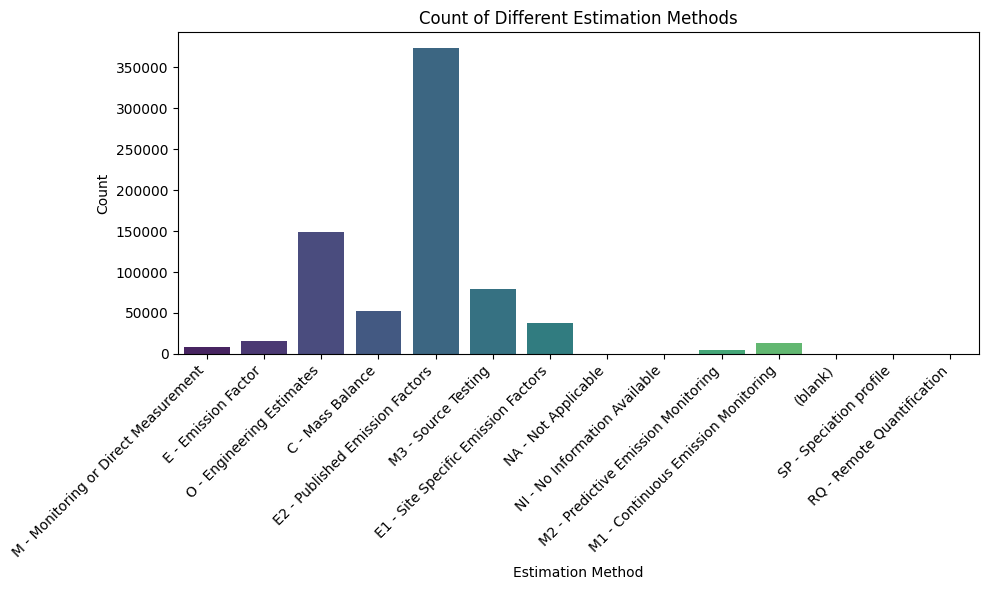

In [ ]:
# Visualization 1: Bar plot of the count of different estimation methods
estimation_counts = data1['Estimation_Method / Mthode_destimation'].value_counts() #Counting the occurrences of each unique estimation method in the 'Estimation_Method / Méthode_d’estimation' column
plt.figure(figsize=(10, 6))
sns.barplot(x=estimation_counts.index, y=estimation_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Estimation Method')
plt.ylabel('Count')
plt.title('Count of Different Estimation Methods')
plt.tight_layout()
plt.show()


Bar Plot: This shows the number of times each estimation method is used. It helps us see which methods are most common across facilities.

As depicted by the barplot, E2- Published Emission Factors is the most used method to calculate or estimate the pollutant emissions.

In [ ]:
 # Descriptive Statistics
merged_df.describe()

Reporting_Year / Anne  NPRI_ID / No_INRP  Number of employees  \
count                         133169      133169.000000        133169.000000   
mean   2012-05-11 02:30:24.154270208       15792.169454           142.261930   
min              2002-01-01 00:00:00           1.000000             0.000000   
25%              2007-01-01 00:00:00        7117.000000             1.000000   
50%              2012-01-01 00:00:00       16730.000000             1.000000   
75%              2018-01-01 00:00:00       21755.000000            30.000000   
max              2022-01-01 00:00:00       33879.000000        211934.000000   
std                              NaN        8581.936492          1134.065117   

       NAICS / Code_SCIAN       Latitude      Longitude  \
count       133169.000000  132786.000000  132786.000000   
mean        251388.125052      52.001194    -106.661469   
min         111120.000000       0.000000    -140.883600   
25%         211113.000000      50.049663    -116.921800   
50%         211113.000000      52.550800    -113.141000   
75%         221320.000000      54.635400    -107.954600   
max         911910.000000      82.498758       0.000000   
std          85135.813399       4.615542      16.988852   

       Release to Air - Fugitive  Release to Air - Other Non-Point  \
count              133169.000000                     133169.000000   
mean                    5.061838                          5.175912   
min                     0.000000                          0.000000   
25%                     0.000000                          0.000000   
50%                     0.000000                          0.000000   
75%                     0.000000                          0.000000   
max                 43070.000000                      44620.000000   
std                   202.678898                        320.900506   

       Release to Air - Road dust  Release to Air - Spills  \
count                    133169.0            133169.000000   
mean                          0.0                 0.013434   
min                           0.0                 0.000000   
25%                           0.0                 0.000000   
50%                           0.0                 0.000000   
75%                           0.0                 0.000000   
max                           0.0               358.770000   
std                           0.0                 1.271877   

       Release to Air - Stack / Point  Release to Air - Storage / Handling  \
count                   133169.000000                        133169.000000   
mean                       235.911107                             0.277497   
min                          0.000000                             0.000000   
25%                         22.948000                             0.000000   
50%                         45.000000                             0.000000   
75%                        112.481000                             0.000000   
max                      94106.842000                         10586.478000   
std                       1784.193177                            35.130844   

       Total_Release_to_Land  Total_Release_to_Water_Bodies  \
count               133169.0                       133169.0   
mean                     0.0                            0.0   
min                      0.0                            0.0   
25%                      0.0                            0.0   
50%                      0.0                            0.0   
75%                      0.0                            0.0   
max                      0.0                            0.0   
std                      0.0                            0.0   

       Total_Release_to_Air  
count         133169.000000  
mean             246.439789  
min                0.000000  
25%               24.020000  
50%               46.720000  
75%              116.182000  
max            96000.864000  
std             1848.813438

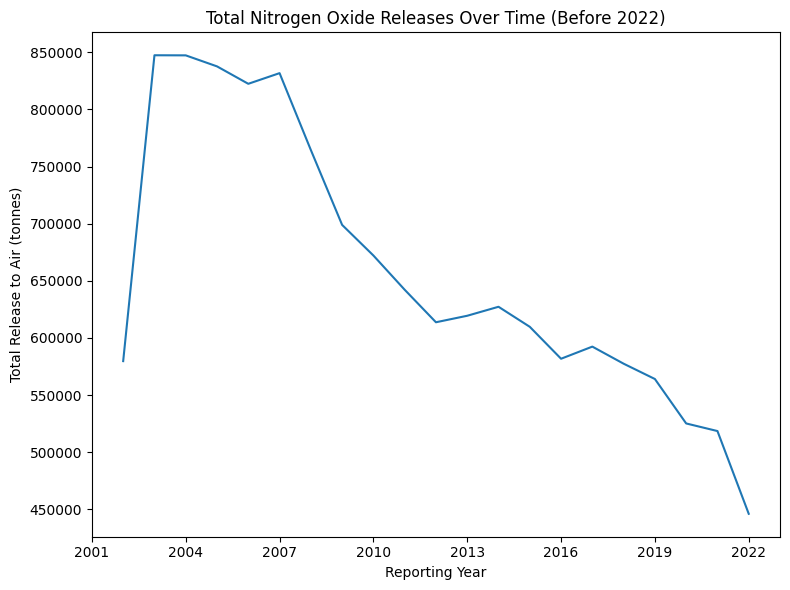

In [ ]:

filtered_df = nitrogen_df[nitrogen_df['Reporting_Year / Anne'].dt.year < 2023]

# Group data by year and sum total releases
yearly_releases = filtered_df.groupby(filtered_df['Reporting_Year / Anne'].dt.year)['Total_Release_to_Air'].sum().reset_index()

# Fix the x-axis formatting to display whole years (instead of floating points)
plt.figure(figsize=(8, 6))
sns.lineplot(x='Reporting_Year / Anne', y='Total_Release_to_Air', data=yearly_releases)

# Format the x-axis to show whole numbers (years)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Add labels and title
plt.title('Total Nitrogen Oxide Releases Over Time (Before 2022)')
plt.xlabel('Reporting Year')
plt.ylabel('Total Release to Air (tonnes)')
plt.tight_layout()
plt.show()



The overall trend shows a significant reduction in NOx emissions over the years, highlighting the possible positive effects of regulations, technological advances, and economic incentives like carbon pricing. The chart suggests that Canada has made progress in reducing NOx emissions, and the continuing downward trend reflects the effectiveness of these initiatives in pushing towards lower pollution levels.

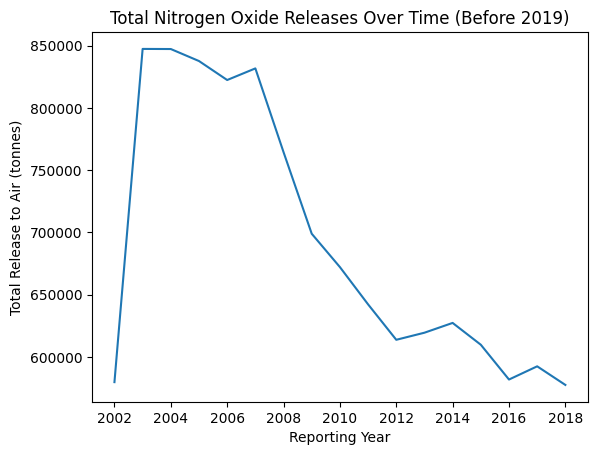

In [ ]:
# Before 2019

# Filter data before 2019
filtered_df = nitrogen_df[nitrogen_df['Reporting_Year / Anne'].dt.year < 2019]

# Group data by year and sum total releases
yearly_releases = filtered_df.groupby(filtered_df['Reporting_Year / Anne'].dt.year)['Total_Release_to_Air'].sum().reset_index()

# Create the line graph using Seaborn
sns.lineplot(x='Reporting_Year / Anne', y='Total_Release_to_Air', data=yearly_releases)
plt.title('Total Nitrogen Oxide Releases Over Time (Before 2019)')
plt.xlabel('Reporting Year')
plt.ylabel('Total Release to Air (tonnes)')
plt.show()

=>  From 2001 to about 2005, there was a sharp increase in NOx emissions, reaching a peak of approximately 850,000 tonnes. This suggests that industrial or economic activity involving NOx emissions increased during this period.

=> After peaking around 2005, there is a noticeable downward trend in NOx emissions. This decline may indicate the effects of regulatory measures, technological improvements, or a shift towards cleaner energy sources.

=> Between 2010 and 2019, emissions continued to drop steadily, showing a sustained commitment to reducing NOx emissions. This period might coincide with increased environmental regulations or corporate responsibility initiatives aimed at lowering emissions.

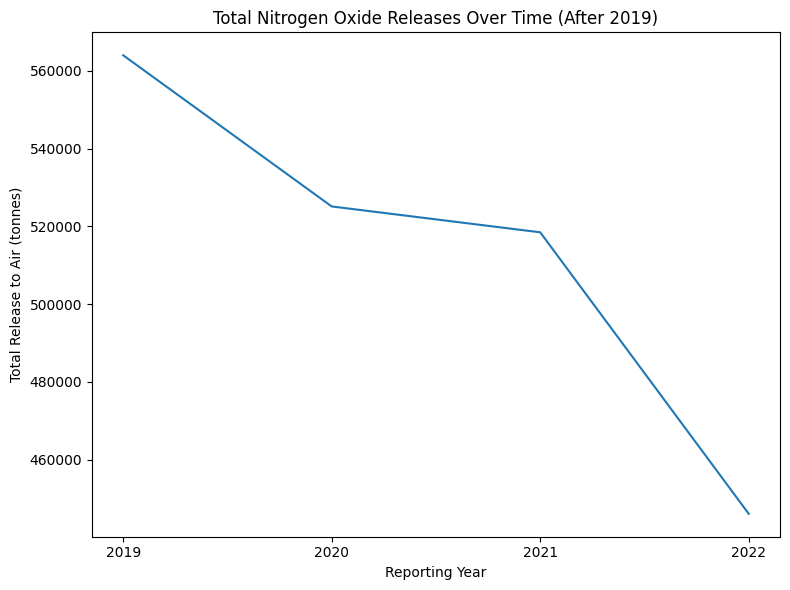

In [ ]:

filtered_df = nitrogen_df[nitrogen_df['Reporting_Year / Anne'].dt.year >= 2019]

# Group data by year and sum total releases
yearly_releases = filtered_df.groupby(filtered_df['Reporting_Year / Anne'].dt.year)['Total_Release_to_Air'].sum().reset_index()

# Fix the x-axis formatting to display whole years (instead of floating points)
plt.figure(figsize=(8, 6))
sns.lineplot(x='Reporting_Year / Anne', y='Total_Release_to_Air', data=yearly_releases)

# Format the x-axis to show whole numbers (years)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Add labels and title
plt.title('Total Nitrogen Oxide Releases Over Time (After 2019)')
plt.xlabel('Reporting Year')
plt.ylabel('Total Release to Air (tonnes)')
plt.tight_layout()
plt.show()


=> Although carbon pricing was introduced in Canada in 2019, the decline in emissions was already underway. However, the introduction of carbon pricing might have accelerated this downward trend, as companies faced financial incentives to reduce emissions further. The decline continues at a steady rate after 2019.

=> The final drop just before 2022 could suggest either a reduction in activity levels (possibly due to economic shifts or pandemic-related restrictions) or an accelerated response to environmental policies.

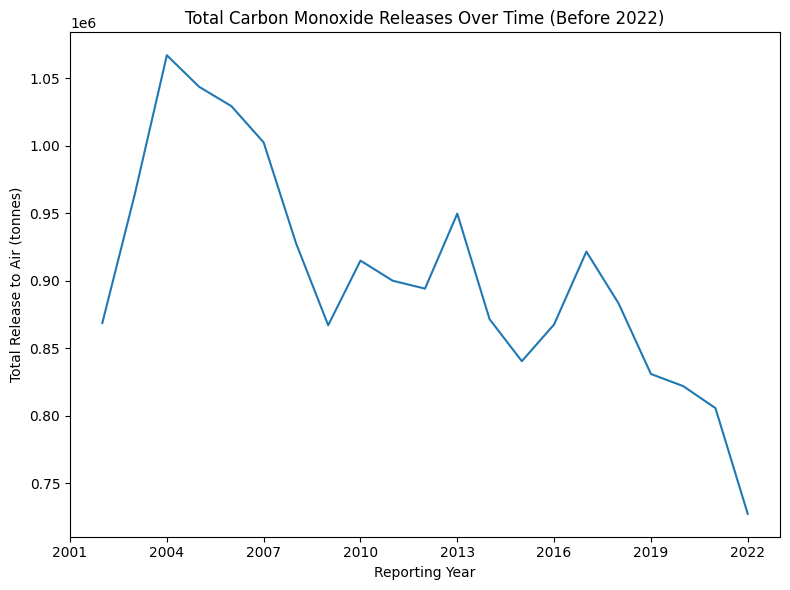

In [ ]:
filtered_df2 = carbon_monoxide_df[carbon_monoxide_df['Reporting_Year / Anne'].dt.year < 2023]

# Group data by year and sum total releases
yearly_releases = filtered_df2.groupby(filtered_df2['Reporting_Year / Anne'].dt.year)['Total_Release_to_Air'].sum().reset_index()

# Fix the x-axis formatting to display whole years (instead of floating points)
plt.figure(figsize=(8, 6))
sns.lineplot(x='Reporting_Year / Anne', y='Total_Release_to_Air', data=yearly_releases)

# Format the x-axis to show whole numbers (years)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Add labels and title
plt.title('Total Carbon Monoxide Releases Over Time (Before 2022)')
plt.xlabel('Reporting Year')
plt.ylabel('Total Release to Air (tonnes)')
plt.tight_layout()
plt.show()

The overall trend in carbon monoxide emissions is a gradual reduction from the mid-2000s onward, suggesting that regulatory measures, technological improvements, and economic incentives, such as carbon pricing, have had a positive impact. The chart highlights that Canada has made progress in reducing CO emissions, with a clear downward trend that suggests the country is moving toward lower pollution levels in alignment with environmental targets.


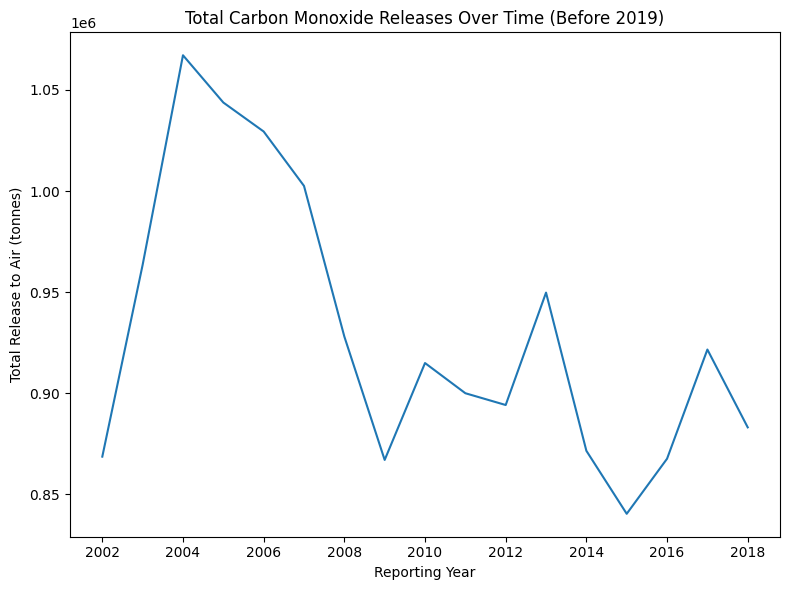

In [ ]:
filtered_df3 = carbon_monoxide_df[carbon_monoxide_df['Reporting_Year / Anne'].dt.year < 2019]

# Group data by year and sum total releases
yearly_releases = filtered_df3.groupby(filtered_df3['Reporting_Year / Anne'].dt.year)['Total_Release_to_Air'].sum().reset_index()

# Fix the x-axis formatting to display whole years (instead of floating points)
plt.figure(figsize=(8, 6))
sns.lineplot(x='Reporting_Year / Anne', y='Total_Release_to_Air', data=yearly_releases)

# Format the x-axis to show whole numbers (years)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Add labels and title
plt.title('Total Carbon Monoxide Releases Over Time (Before 2019)')
plt.xlabel('Reporting Year')
plt.ylabel('Total Release to Air (tonnes)')
plt.tight_layout()
plt.show()

=> From 2001 to around 2005, CO emissions sharply increased, reaching a peak of over 1 million tonnes. This indicates an increase in industrial or transportation activities associated with CO emissions during this period.

=> After the peak, emissions began to decline, showing a downward trend from around 2005 onward. This could reflect early regulatory efforts, improved technology, or shifts in industry practices to reduce CO emissions.

=> Between 2010 and 2015, there are noticeable fluctuations, with emissions rising and falling several times. These fluctuations may be due to economic factors, seasonal variations, or temporary changes in industry practices that impacted CO emissions.

=>From around 2016, there is a steady downward trend in CO emissions, with fewer fluctuations. This sustained decrease aligns with increased awareness and regulatory pressure to reduce greenhouse gases and pollutants, as well as the 2019 introduction of carbon pricing, which may have encouraged companies to adopt cleaner technologies.


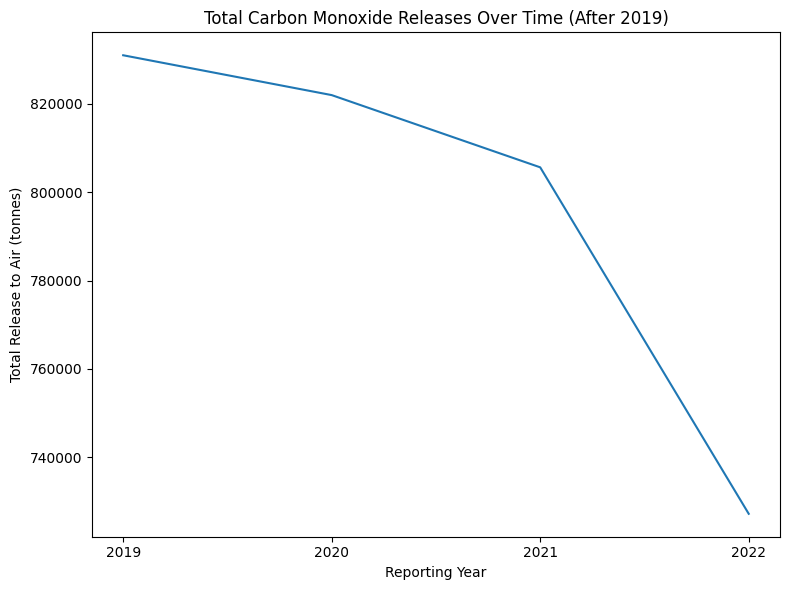

In [ ]:
filtered_df4 = carbon_monoxide_df[carbon_monoxide_df['Reporting_Year / Anne'].dt.year >= 2019]

# Group data by year and sum total releases
yearly_releases = filtered_df4.groupby(filtered_df4['Reporting_Year / Anne'].dt.year)['Total_Release_to_Air'].sum().reset_index()

# Fix the x-axis formatting to display whole years (instead of floating points)
plt.figure(figsize=(8, 6))
sns.lineplot(x='Reporting_Year / Anne', y='Total_Release_to_Air', data=yearly_releases)

# Format the x-axis to show whole numbers (years)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Add labels and title
plt.title('Total Carbon Monoxide Releases Over Time (After 2019)')
plt.xlabel('Reporting Year')
plt.ylabel('Total Release to Air (tonnes)')
plt.tight_layout()
plt.show()

 Just before 2022, there is a steep decline in CO emissions, similar to the pattern observed in NOx emissions. This might be influenced by reduced industrial activity due to economic shifts, potentially related to the COVID-19 pandemic, or it could reflect accelerated compliance with environmental policies.



In [ ]:
# Filter out substances reported in grams of Toxic Equivalent (g TEQ)
g_teq_substances = data1[data1['Units / Units'] == 'g TEQ']

<ipython-input-90-7e3e6caaa777>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=g_teq_substances['Reporting_Year / Anne'].dt.year, y=g_teq_substances['Total_Release_to_Air'], palette='plasma')


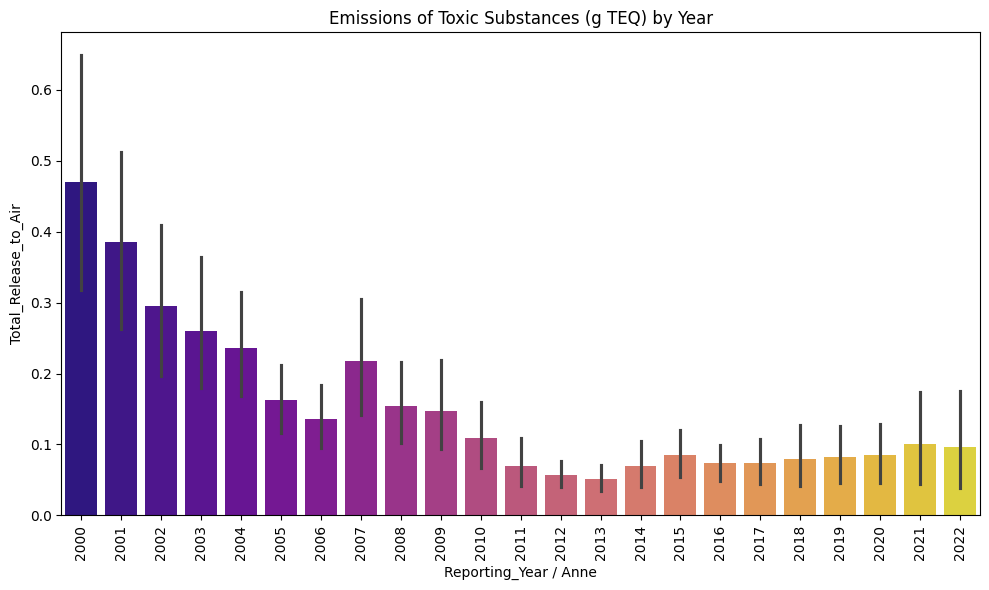

In [ ]:
# Visualization: Bar plot of facilities with g TEQ emissions
plt.figure(figsize=(10, 6))
sns.barplot(x=g_teq_substances['Reporting_Year / Anne'].dt.year, y=g_teq_substances['Total_Release_to_Air'], palette='plasma')
plt.xticks(rotation=90)
plt.xlabel('Reporting_Year / Anne')
plt.ylabel('Total_Release_to_Air')
plt.title('Emissions of Toxic Substances (g TEQ) by Year')
plt.tight_layout()
plt.show()


This bar plot visualizes emissions of toxic substances, specifically those reported in grams of Toxic Equivalent (g TEQ), over different years. Each bar represents the total release to air for a particular year, with a clear decline in emissions from 2000 onward, indicating improvements in emission control or regulatory compliance over time.

=> Significant Decrease Over Time: There is a clear overall downward trend in toxic substance emissions from 2000 to around 2010. This decline indicates significant reductions in emissions, likely due to environmental regulations, technological improvements, or shifts toward cleaner processes within industries.

=> From approximately 2010 onward, the decline levels off, with emissions stabilizing at a lower level. This plateau suggests that while initial efforts led to major reductions, further decreases may be more challenging, potentially requiring more advanced technologies or stricter policies.

=> The bars in the early years, particularly from 2000 to 2005, show relatively large variability, as indicated by the error bars. This may reflect inconsistencies in reporting methods or greater fluctuations in industrial activities contributing to emissions.

=> From around 2015 to 2022, emissions remain relatively constant, indicating that toxic emissions have reached a stable lower level. However, this also implies limited further reductions, which might require new policies or innovations to push emissions even lower.

=> The use of a gradient color scheme from dark purple (early years) to yellow (recent years) effectively illustrates the gradual reduction over time, making it easy to observe the transition from higher to lower emissions.

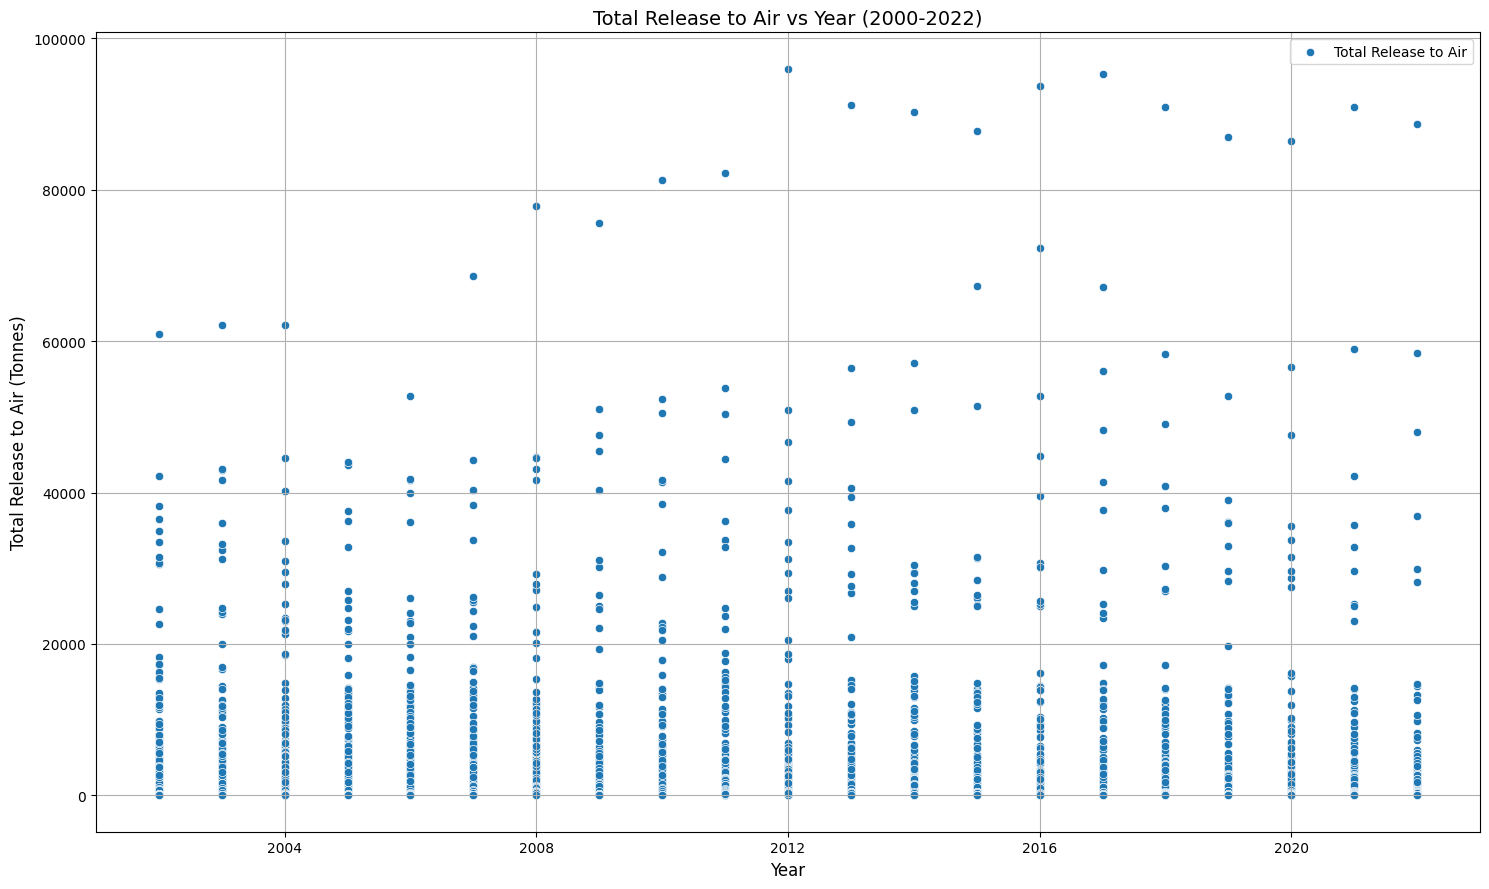

In [ ]:
# Create the scatter plot of Total Release to Air vs Year
plt.figure(figsize=(15,9))
# Remove the leading spaces and make sure the column name is exactly how it appears in your DataFrame
sns.scatterplot(data = merged_df, x='Reporting_Year / Anne', y='Total_Release_to_Air', label='Total Release to Air')

# Add titles and labels
plt.title('Total Release to Air vs Year (2000-2022)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Release to Air (Tonnes)', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


This scatter plot displays the total release to air of various substances over time from 2000 to 2022

=> There is a broad spread in the total release values each year, with values ranging from near zero up to around 100,000 tonnes. This suggests that while some facilities or activities release minimal pollutants, others contribute significantly more, indicating variability across industries or facilities.

=> Each year includes some high emission points, with certain facilities or sources releasing far greater amounts than others. These outliers could indicate specific high-emission industries or unusual events in certain years that led to spikes in emissions.

=> The general distribution pattern of emissions appears relatively consistent over time, with some points clustering at lower levels and others spread out across higher ranges. This stability suggests that, overall, emissions have not shown dramatic reductions or increases at a large scale.

=> Unlike previous visualizations showing trends for specific pollutants, this scatter plot does not show a clear downward trend in the overall release of emissions to air. This could imply that while some specific pollutants (like NOx or CO) may be declining, total emissions to air across all substances have remained more stable.

=> Many points are clustered near the lower end, indicating a large number of facilities or processes with relatively small emissions to air. This might suggest that although some facilities have high emissions, the majority contribute smaller amounts individually.

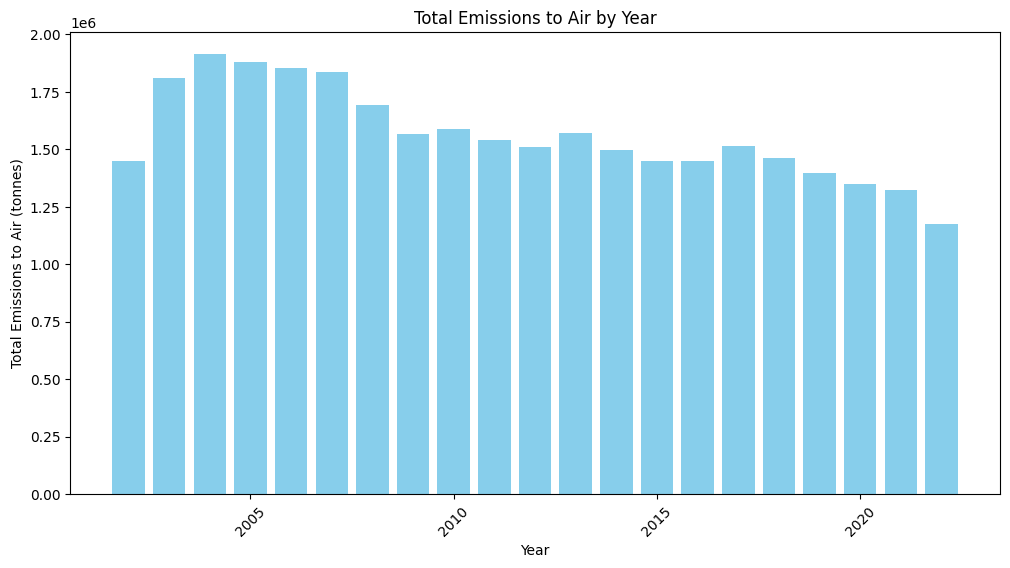

In [ ]:
# Extract the year from the date
merged_df['Year'] = merged_df['Reporting_Year / Anne'].dt.year

# Calculate total emissions for each year
total_emissions_by_year = merged_df.groupby('Year')['Total_Release_to_Air'].sum().reset_index()

# Plotting the bar plot
plt.figure(figsize=(12, 6))
plt.bar(total_emissions_by_year['Year'], total_emissions_by_year['Total_Release_to_Air'], color='skyblue')
plt.title("Total Emissions to Air by Year")
plt.xlabel("Year")
plt.ylabel("Total Emissions to Air (tonnes)")
plt.xticks(rotation=45)
plt.show()

This bar chart shows the total emissions to air (in tonnes) per year from 2000 to 2022. Here are the main insights:

=> There is a gradual increase in total emissions to air from 2000, reaching a peak around 2005-2006. This rise could reflect increased industrial activity, less stringent regulations, or both.

=> After the peak, there is a noticeable decline in emissions from 2007 onward, with a general downward trend observed over the years. This decline might indicate the impact of environmental regulations, technological improvements, or a shift toward cleaner energy sources and more sustainable practices.

=> Between approximately 2010 and 2020, the decline slows down, and emissions appear to level off with minor fluctuations. This plateau might suggest that initial reductions were easier to achieve, while further reductions require more substantial changes, possibly due to limitations in existing technologies or regulatory impact.

=> Emissions continue to decline after 2020, reaching their lowest level in 2022. This reduction may have been influenced by the effects of recent environmental policies, economic slowdowns, or shifts in industry practices, possibly accelerated by global events like the COVID-19 pandemic.

=> Despite fluctuations, the overall trend is downward, indicating progress in reducing total emissions to air. This trend aligns with long-term goals of emission reduction, suggesting that regulatory efforts and industry adjustments have contributed to lower pollution levels over the years.

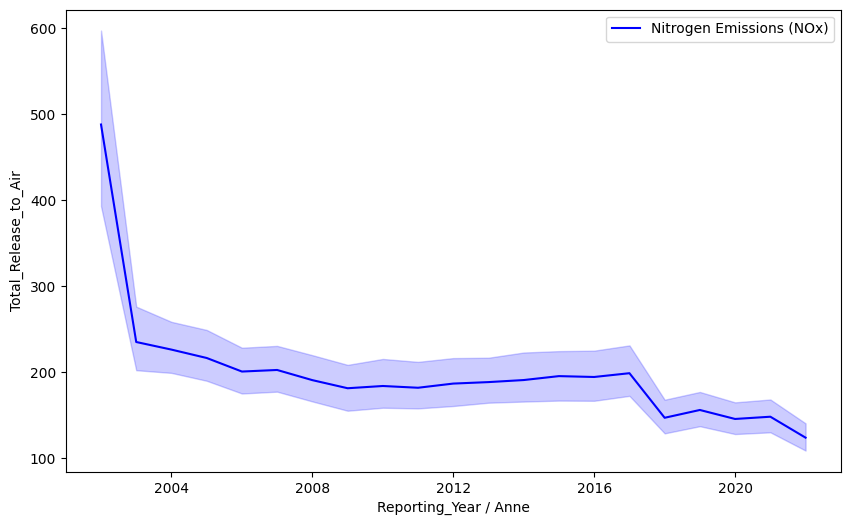

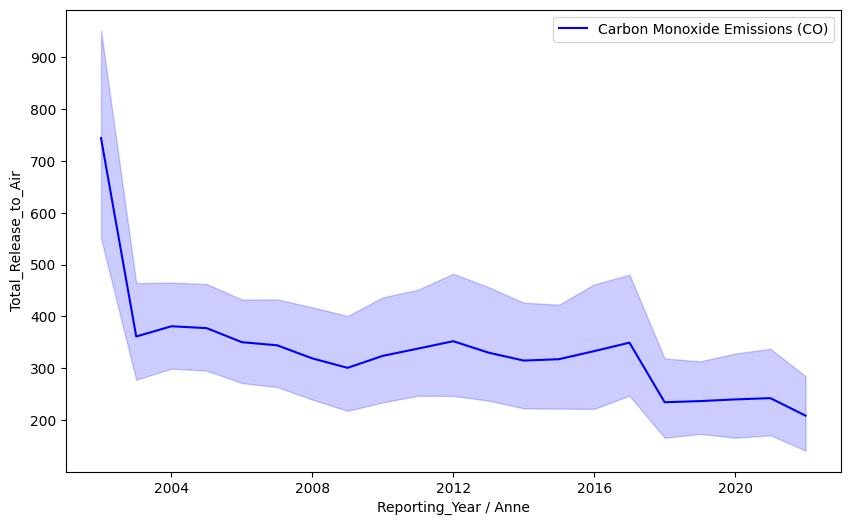

In [ ]:
# Create a line plot for Nitrogen and Carbon Monoxide emissions
plt.figure(figsize=(10,6))

# Plot Nitrogen data, ensuring column name is correct
# Remove leading spaces or tabs from 'Reporting_Year / Anne' if needed
sns.lineplot(data=nitrogen_df, x='Reporting_Year / Anne', y= 'Total_Release_to_Air', label='Nitrogen Emissions (NOx)', color='blue')

# Show the plot
plt.show()

# Create a line plot for Carbon Monoxide emissions
plt.figure(figsize=(10,6))

# Plot Carbon Monoxide data, ensuring column name is correct
# Remove leading spaces or tabs from 'Reporting_Year / Anne' if needed
sns.lineplot(data=carbon_monoxide_df, x='Reporting_Year / Anne', y= 'Total_Release_to_Air', label='Carbon Monoxide Emissions (CO)', color='blue')

# Show the plot
plt.show()

The shaded region around each line in the graphs represents the confidence interval for the emission values. This interval gives an indication of the uncertainty or variability in the data, showing how much the values could fluctuate around the central line (mean trend). In other words, the shadow provides a visual cue about the range within which the true values are likely to fal

For Nitrogen Emissions:

The plot shows a strong, sustained reduction in NOx emissions, with a steep initial decline followed by a gradual downward trend. The stabilization in the mid-2000s to 2015 period suggests challenges in further reductions, but recent years show renewed progress. This trend highlights the impact of long-term regulatory efforts and technological improvements in reducing air pollutants, though it suggests that continued effort may be required to maintain or accelerate this progress

For Carbon Monoxide Emissions:

The plot illustrates a strong initial reduction in CO emissions, followed by a prolonged period of stabilization and a gradual downward trend in recent years. This pattern indicates early success in reducing CO emissions, while more recent declines suggest the impact of continued regulatory efforts or technological improvements. The plot highlights that while initial reductions were substantial, maintaining and furthering reductions has required ongoing adjustments and interventions.

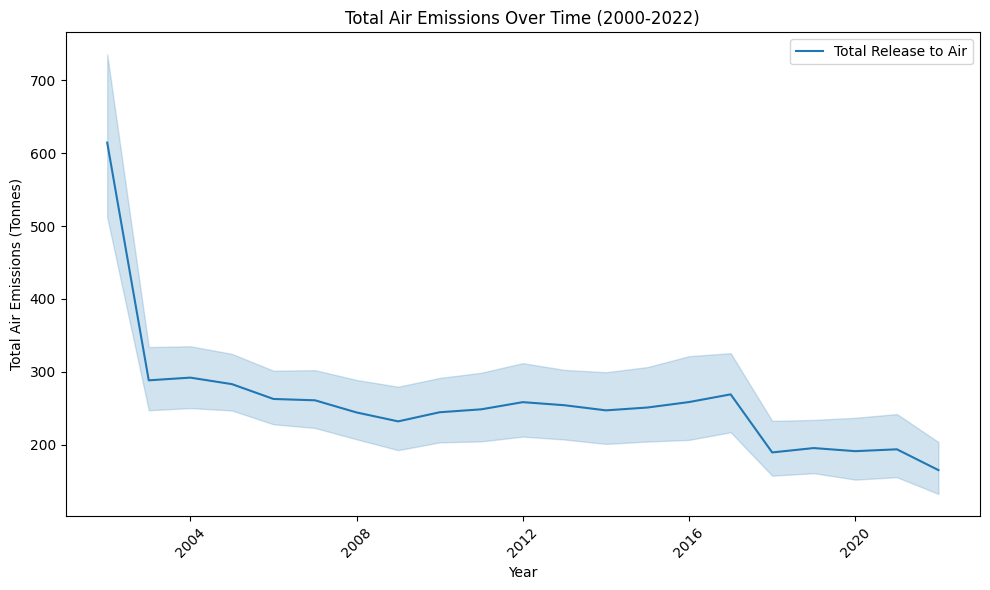

In [ ]:
# 1. Time Series of Emissions Over Years
plt.figure(figsize=(10,6))
# Remove leading spaces or tabs from 'Reporting_Year / Anne' if needed
sns.lineplot(data = merged_df, x='Reporting_Year / Anne', y='Total_Release_to_Air', label='Total Release to Air')
plt.title('Total Air Emissions Over Time (2000-2022)')
plt.ylabel('Total Air Emissions (Tonnes)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

This line plot illustrates the trend of total air emissions (in tonnes) from 2000 to 2022, with a shaded area representing variability or a confidence interval around the trend line. Here are the key insights:

=> From 2000 to around 2003, there is a steep reduction in total air emissions, indicating an early and significant decrease, likely due to initial regulatory measures or technological improvements in emission control.

=> After the sharp decline, total air emissions stabilize around 300 tonnes, with only minor fluctuations. This plateau from around 2004 to 2015 suggests that initial reductions were relatively easier to achieve, while further decreases required more sustained efforts or advanced strategies.

=> Around 2016, there is a slight rise in emissions, followed by a gradual decline toward the end of the timeline. This recent downward trend may be due to enhanced environmental regulations, cleaner technology adoption, or broader policy measures.

=> The shaded area around the line is wider in the early years, particularly between 2000 and 2004, indicating greater variability in emissions during this period. This could be due to inconsistencies in reporting practices or larger fluctuations in industrial activity.

=> By the end of the timeline (2020-2022), emissions reach a stable low, showing the impact of long-term environmental efforts and indicating that recent measures have likely been effective.

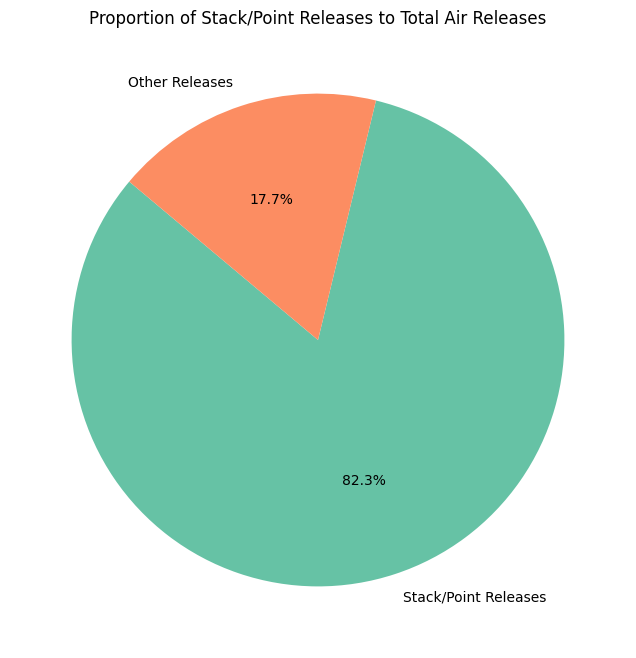

In [ ]:
import matplotlib.pyplot as plt

# Calculating total stack/point releases and total other releases
stack_point_total = data1['Release to Air - Stack / Point'].sum()
other_releases_total = data1['Total_Release_to_Air'].sum() - stack_point_total

# Defining data and labels for the pie chart
release_data = [stack_point_total, other_releases_total]
labels = ['Stack/Point Releases', 'Other Releases']

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(release_data, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
plt.title('Proportion of Stack/Point Releases to Total Air Releases')
plt.show()


This pie chart illustrates the proportion of "Stack/Point Releases" relative to "Total Air Releases."

-> "Stack/Point Releases" account for a substantial portion of the total air releases, making up 82.3% of all emissions to air. This suggests that stack or point sources (such as smokestacks and exhaust pipes from industrial facilities) are the primary contributors to air pollution in this dataset.

-> The remaining 17.7% of total air releases come from other sources, such as fugitive emissions, spills, or storage and handling. This smaller percentage indicates that non-point sources have a limited impact on overall emissions compared to stack/point sources.

-> Since a significant majority of emissions are from stack/point sources, focusing regulatory or technological improvements on these sources could yield substantial reductions in overall air pollution. Targeted interventions for reducing emissions from industrial stacks and point sources may be the most effective strategy.

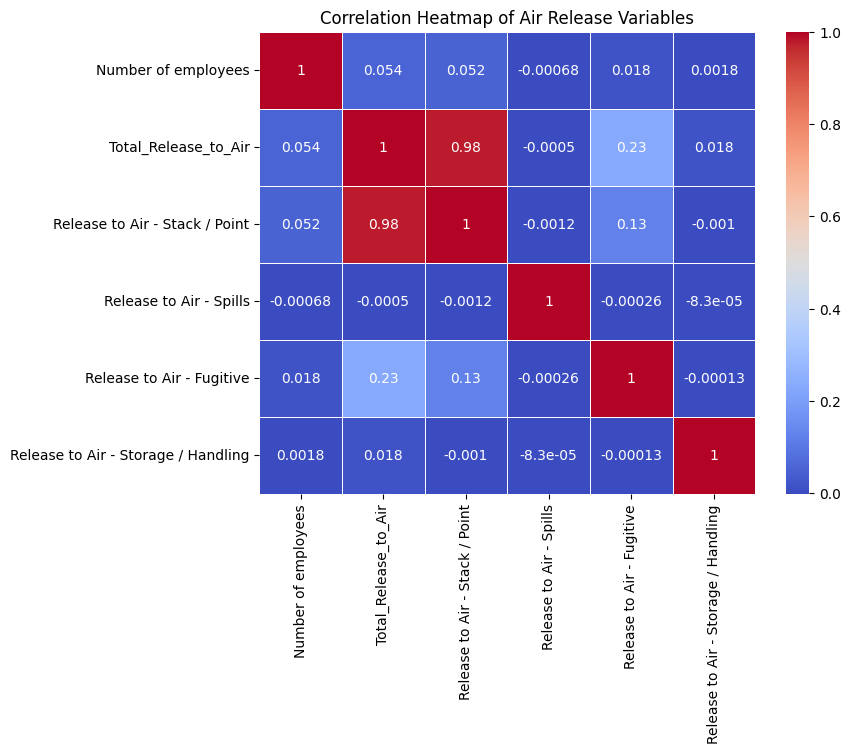

In [ ]:
# Focusing on air-related columns
numerical_columns = [
    'Number of employees',
    'Total_Release_to_Air',
    'Release to Air - Stack / Point',
    'Release to Air - Spills',
    'Release to Air - Fugitive',
    'Release to Air - Storage / Handling'
]

# Compute the correlation matrix for the selected numerical columns
correlation_matrix = merged_df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Air Release Variables')
plt.show()


The heatmap reveals that the "Release to Air - Stack/Point" category is the primary contributor to "Total_Release_to_Air," while other categories like spills, fugitive, and storage/handling have little to no impact on the total. This indicates that efforts to reduce total air emissions might be most effective if focused on controlling stack/point source emissions.

In [ ]:
pip install geopandas pandas folium


**Below, we have created an interactive map that shows nitrogen oxides and carbon monoxide emissions across Canadian provinces, using a color-coded layout and hover tooltips.**

Here’s a breakdown of what each section does:

Import Libraries: We used geopandas to handle the geographical data, pandas to manage emissions data, and folium for interactive map visualization.

Load GeoJSON Data: The GeoJSON file is loaded to provide geographical boundaries of Canadian provinces and territories. This file, sourced from Open Data Canada, helps display each province on the map accurately.

Replace Abbreviations with Full Names: In the emissions dataset (merged_df), provinces are listed as abbreviations (e.g., "AB" for Alberta). We map these to their full names to match the GeoJSON file’s format.

Filter and Summarize Emissions Data: We filter for nitrogen oxides and carbon monoxide emissions, then group and sum these by province. This summary (emissions_summary) gives us the total emissions of each substance for each province.

Merge Emissions Data with GeoJSON: The summarized emissions data is merged with the geographical data. Now each province has associated emission values for nitrogen oxides and carbon monoxide.

Color Setup for Provinces: We define a function to generate random colors and assign a unique color to each province. This makes the map visually engaging and easy to interpret.

Create the Map: The map is centered on Canada. Using folium.GeoJson, we add each province to the map with its unique color and an outline. A tooltip displays province names and emission data when hovered over.

Save the Map: Finally, the map is saved as emission_map_canada.html, making it accessible to view or share interactively.

The GeoJSON file was sourced from the Open Data Canada GitHub repository, specifically from this link (https://github.com/jpmckinney/open_data_canada/blob/master/maps/provinces-and-territories-areas.geojson). The repository provides various resources for Canadian spatial data, which can be directly integrated into tools like Folium for mapping purposes.

The GeoJSON file contains geographic boundary data for each Canadian province and territory. Specifically, it provides the shapes and borders (known as polygons) of each province, which helps in shading or outlining regions on a map. Each province in the file has properties such as its name, allowing us to link data (like emissions) to specific regions. This format enables interactive maps where users can hover over provinces to see associated data, such as emission levels for different pollutants in each province.

In summary, the GeoJSON file is like a digital map of Canada with structured region information, allowing us to visualize data geographically.





In [ ]:
 import geopandas as gpd
import pandas as pd
import folium
from folium.features import GeoJsonTooltip
import random

# Load the GeoJSON file for Canadian provinces and territories
geojson_file_path = 'provinces-and-territories-areas.geojson'
provinces_geo = gpd.read_file(geojson_file_path)

# Assume `merged_df` contains the emissions data
emissions_df = merged_df

# Map province abbreviations to full names
province_name_map = {
    'AB': 'Alberta',
    'BC': 'British Columbia',
    'MB': 'Manitoba',
    'NB': 'New Brunswick',
    'NL': 'Newfoundland and Labrador',
    'NS': 'Nova Scotia',
    'ON': 'Ontario',
    'PE': 'Prince Edward Island',
    'QC': 'Quebec',
    'SK': 'Saskatchewan',
    'NT': 'Northwest Territories',
    'NU': 'Nunavut',
    'YT': 'Yukon'
}

# Replace abbreviations with full names
emissions_df['PROVINCE'] = emissions_df['PROVINCE'].replace(province_name_map)

# Filter for nitrogen and carbon monoxide emissions only
filtered_emissions = emissions_df[emissions_df['Substance Name (English) / Nom de substance (Anglais)'].isin(['Nitrogen oxides (expressed as nitrogen dioxide)', 'Carbon monoxide'])]
emissions_summary = filtered_emissions.groupby(['PROVINCE', 'Substance Name (English) / Nom de substance (Anglais)'])['Total_Release_to_Air'].sum().unstack(fill_value=0)
emissions_summary = emissions_summary[['Nitrogen oxides (expressed as nitrogen dioxide)', 'Carbon monoxide']]
emissions_summary.columns = ['Nitrogen Oxides', 'Carbon Monoxide']

# Merge emissions summary with GeoDataFrame
provinces_geo = provinces_geo.merge(emissions_summary, left_on='Name', right_index=True, how='left').fillna(0)

# Define a function to generate random colors for each province
def random_color():
    return f'#{random.randint(0, 255):02x}{random.randint(0, 255):02x}{random.randint(0, 255):02x}'

# Create a dictionary of colors for each province
province_colors = {province: random_color() for province in provinces_geo['Name'].unique()}

# Create a base map centered on Canada
map_canada = folium.Map(location=[56.1304, -106.3468], zoom_start=4, tiles="cartodb positron")

# Add provinces to the map with unique colors
folium.GeoJson(
    provinces_geo,
    style_function=lambda feature: {
        'fillColor': province_colors[feature['properties']['Name']],
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7
    },
    tooltip=GeoJsonTooltip(
        fields=['Name', 'Nitrogen Oxides', 'Carbon Monoxide'],
        aliases=['Province', 'Nitrogen Oxides Emission (tonnes)', 'Carbon Monoxide Emission (tonnes)'],
        localize=True
    )
).add_to(map_canada)

# Save the map to an HTML file
map_canada.save('emission_map_canada.html')
map_canada


<ipython-input-99-5097c8472ce3>:32: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  emissions_df['PROVINCE'] = emissions_df['PROVINCE'].replace(province_name_map)
<ipython-input-99-5097c8472ce3>:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emissions_summary = filtered_emissions.groupby(['PROVINCE', 'Substance Name (English) / Nom de substance (Anglais)'])['Total_Release_to_Air'].sum().unstack(fill_value=0)


# **Pattern Discovery**

1. Regulatory Measures: Over the years, Canada introduced tougher environmental rules, especially after 2005. These rules pushed companies to adopt cleaner technology and cut down on pollution. In 2019, Canada introduced a federal carbon pricing system, making it more expensive for industries to pollute. This encouraged them to find ways to reduce emissions.

2. Technological Advancements:  Advances in technology, like catalytic converters, cleaner production methods, and fuel-efficient machinery, have helped reduce pollution. Many facilities started using cleaner energy sources or installed equipment to control emissions, leading to lower pollution levels

3. Economic Incentives and Carbon Pricing: The carbon pricing policy from 2019 gave companies a financial reason to cut emissions. Since the cost of emitting pollutants went up every year, companies had more incentive to switch to renewable energy or use less fossil fuel, which helped reduce emissions

4. Industrial and Economic Shifts:  Over time, Canada’s economy shifted more towards services and less on manufacturing, which is often more polluting. Additionally, certain areas or industries moved towards cleaner practices. This likely explains why emissions peaked in the early 2000s and then started to drop as industries became cleaner

5. Emission Estimation Methods: The data includes various methods for estimating emissions, like direct monitoring or using emission factors. Some methods are more accurate than others, which could affect reported emissions. Direct measurements tend to give a clearer picture of emission trends than estimates.

6. Provincial Carbon Pricing Programs: Even before the federal program, some provinces had their own carbon pricing systems, helping to cut emissions regionally. This added up over time, helping to reduce pollution across Canada as more areas introduced carbon pricing and pollution controls.

These factors combined likely influenced the downward trend in emissions, especially post-2010, as policies, economic incentives, and technological improvements aligned to reduce air pollution in Canada.

# **Fixing Bad HouseKeeping**

1. **Handling Missing Values**: For missing values in air release columns (like Release to Air - Fugitive, Release to Air - Stack/Point, etc.) were filled with zeroes, assuming these values were likely not reported due to non-occurrence.Then we calculated the sum of those releases to calculate Total_Releases_to_Air. For other columns, such as the number of employees,we used mean to fill missing entries. This approach reduced bias introduced by null values while retaining as much data as possible.

2. **Fixing Inconsistent or Invalid Data and Data types**: We identified and standardized inconsistent or invalid data. This included standardizing text formatting (like removing extra spaces or special characters in column names) and ensuring numerical data types were assigned correctly for computations. We also converted columns to appropriate data types, such as converting dates to datetime format and NAICS codes to integers.

3. **Removing Duplicates**: We removed Duplicate rows to prevent skewed analysis from repeated entries. We checked the dataset for duplicates, and fortunately, none were found, so no further action was necessary here.

4. **Standardizing Column Names**: We cleaned the Columns of any special characters or extra spaces, making them more accessible and consistent for analysis. This standardization helped avoid confusion or errors in referencing column names during analysis.

### Likely Causes for Observed Patterns:

1. **Missing Value**: Missing values may result from inconsistent reporting requirements, where certain facilities are not mandated to report specific data, or from data collection limitations, especially in smaller facilities that lack the resources to track all variables comprehensively.

2. **Inconsistent or Invalid Data**: Inconsistent or invalid data is often caused by a lack of standardization across facilities, leading to different formats or terms for similar data, compounded by human errors during data entry.

3. **Non-Standardized Column Names and Formatting**: Non-standardized column names and formatting can result from legacy data practices, language differences (common in bilingual datasets like those in Canada), or a lack of routine data cleaning procedures, causing inconsistencies over time. Incorrect data types may occur during data export/import processes, particularly when data is transferred between different software, or due to the absence of validation protocols to ensure correct formats during data entry.


## **Outlier Handling**

In [ ]:
nitrogen_df.head()

Reporting_Year / Anne  NPRI_ID / No_INRP  Number of employees  \
20037            2002-01-01                  1                  440   
20065            2002-01-01                  4                  450   
20177            2002-01-01                 54                  850   
20230            2002-01-01                106                   25   
20308            2002-01-01                126                  345   

      Company_Name / Dnomination_sociale_de_l'entreprise  \
20037                  ALBERTA PACIFIC FOREST INDUSTRIES   
20065                                  TEMBEC INDUSTRIES   
20177                                       NORANDA INC.   
20230                           Devon Canada Corporation   
20308                                   AT PLASTICS INC.   

      Facility_Name / Installation  NAICS / Code_SCIAN  \
20037                      (blank)              322112   
20065        PINE FALLS OPERATIONS              322122   
20177               Brunswick Mine              212231   
20230      Dunvegan Sour Gas Plant              211113   
20308                Edmonton Site              325110   

            NAICS Title / Titre Code_SCIAN PROVINCE                 City  \
20037                  Chemical pulp mills       AB  County of Athabasca   
20065                      Newsprint mills       MB           PINE FALLS   
20177                 Lead-zinc ore mining       NB             BATHURST   
20230  Conventional oil and gas extraction       AB             Fairview   
20308          Petrochemical manufacturing       AB                  NaN   

        Latitude  ...  Estimation_Method / Mthode_destimation  \
20037  54.923116  ...    M - Monitoring or Direct Measurement   
20065  50.568600  ...    M - Monitoring or Direct Measurement   
20177  47.471700  ...                     E - Emission Factor   
20230  55.998570  ...                     E - Emission Factor   
20308        NaN  ...    M - Monitoring or Direct Measurement   

      Release to Air - Fugitive Release to Air - Other Non-Point  \
20037                       0.0                              0.0   
20065                       0.0                              0.0   
20177                       0.0                              0.0   
20230                       0.0                              0.0   
20308                       0.0                              0.0   

      Release to Air - Road dust Release to Air - Spills  \
20037                        0.0                     0.0   
20065                        0.0                     0.0   
20177                        0.0                     0.0   
20230                        0.0                     0.0   
20308                        0.0                     0.0   

       Release to Air - Stack / Point  Release to Air - Storage / Handling  \
20037                        1376.830                                  0.0   
20065                         260.803                                  0.0   
20177                         453.570                                  0.0   
20230                         648.139                                  0.0   
20308                         415.000                                  0.0   

       Total_Release_to_Land  Total_Release_to_Water_Bodies  \
20037                    0.0                            0.0   
20065                    0.0                            0.0   
20177                    0.0                            0.0   
20230                    0.0                            0.0   
20308                    0.0                            0.0   

       Total_Release_to_Air  
20037              1376.830  
20065               260.803  
20177               453.570  
20230               648.139  
20308               415.000  

[5 rows x 24 columns]

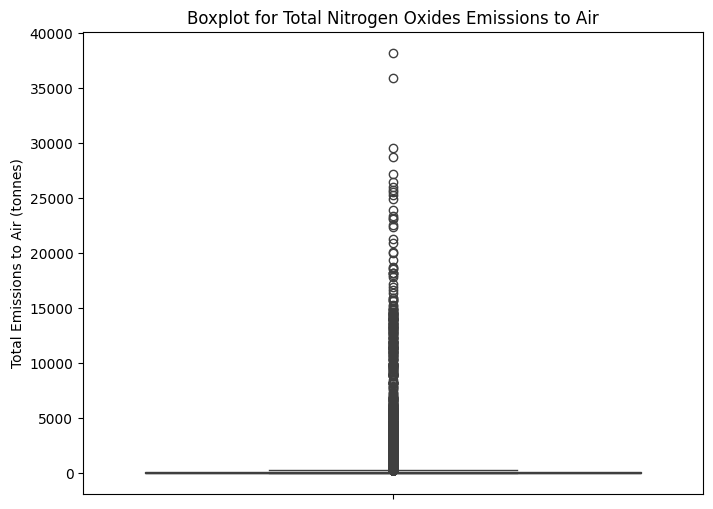

In [ ]:

# Boxplot for the total nitrogen oxides emissions to air
plt.figure(figsize=(8, 6))
sns.boxplot(y='Total_Release_to_Air', data=nitrogen_df)
plt.title("Boxplot for Total Nitrogen Oxides Emissions to Air")
plt.ylabel("Total Emissions to Air (tonnes)")
plt.show()

The boxplot for Total Nitrogen Oxides Emissions to Air shows several outliers with extremely high emissions values, as indicated by the points far above the whiskers. These outliers represent facilities or entries with unusually large emissions, which may be worth investigating individually.

Since most data points are near the bottom with a few extreme high values, the data is highly right-skewed. This suggests that while most facilities emit lower levels of nitrogen oxides, a few emit very high levels.

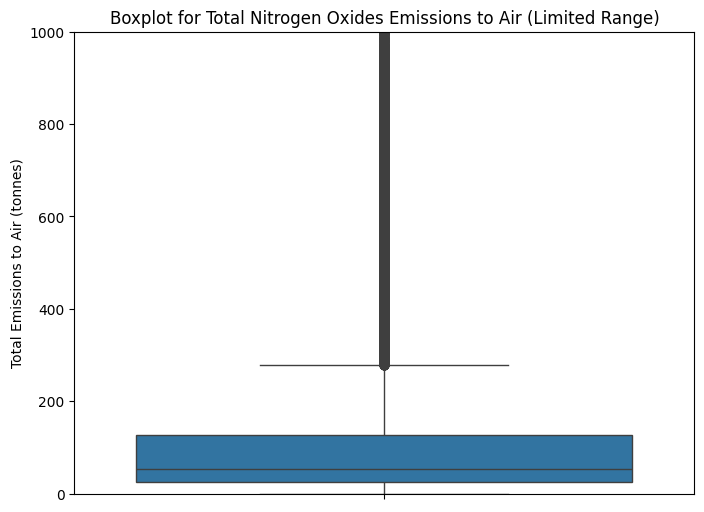

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y='Total_Release_to_Air', data=nitrogen_df)
plt.ylim(0, 1000)  # Adjust this limit to better view the IQR box
plt.title("Boxplot for Total Nitrogen Oxides Emissions to Air (Limited Range)")
plt.ylabel("Total Emissions to Air (tonnes)")
plt.show()

This modified boxplot shows the distribution of total nitrogen oxides emissions within a limited range (0 to 1000 tonnes). By setting a specific range, we can focus on the interquartile range (IQR) and more typical emission levels, excluding extreme outliers.

In this boxplot, the limited y-axis range has made the IQR (the box portion) more visible. Here’s what each component represents in this plot:

Box (IQR): The blue box shows the interquartile range (IQR), which is the range from the 25th percentile (Q1) to the 75th percentile (Q3) of the nitrogen oxides emission values.

Whiskers: The vertical lines extending from the box (whiskers) represent the range within 1.5 times the IQR above and below Q1 and Q3. These whiskers include most of the typical values.

Outliers: The points outside the whiskers would be considered outliers. In this case, since the y-axis is capped at 1000, some of the more extreme values are not shown.

The plot shows that a large portion of the nitrogen oxides emissions are concentrated below 200 tonnes, with a few values extending well beyond this range, which were identified as outliers in the original boxplot.

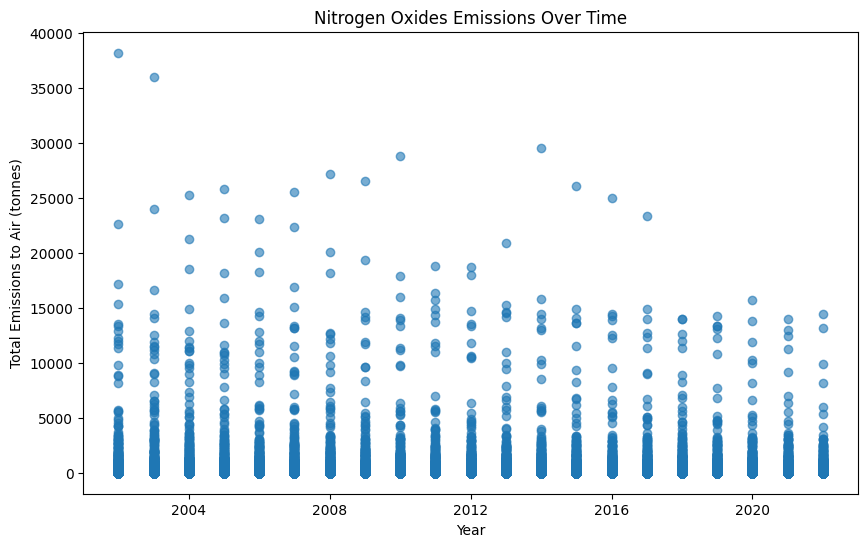

In [ ]:
# 1. Scatter Plot of Total Emissions Over Time
plt.figure(figsize=(10, 6))
plt.scatter(nitrogen_df['Reporting_Year / Anne'], nitrogen_df['Total_Release_to_Air'], alpha=0.6)
plt.title("Nitrogen Oxides Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("Total Emissions to Air (tonnes)")
plt.show()

Emissions Distribution: The plot shows a wide range of emissions levels across years, with most data points clustered towards the lower end of the emissions scale but with a few significantly higher values.

Trend Over Time: We can observe some fluctuations in the emissions across the years, with certain peaks around 2010-2012, followed by a more consistent range of emissions in recent years.

Unsually high values: we can observe that in 2003 and 2004 there are extreme emissions seen


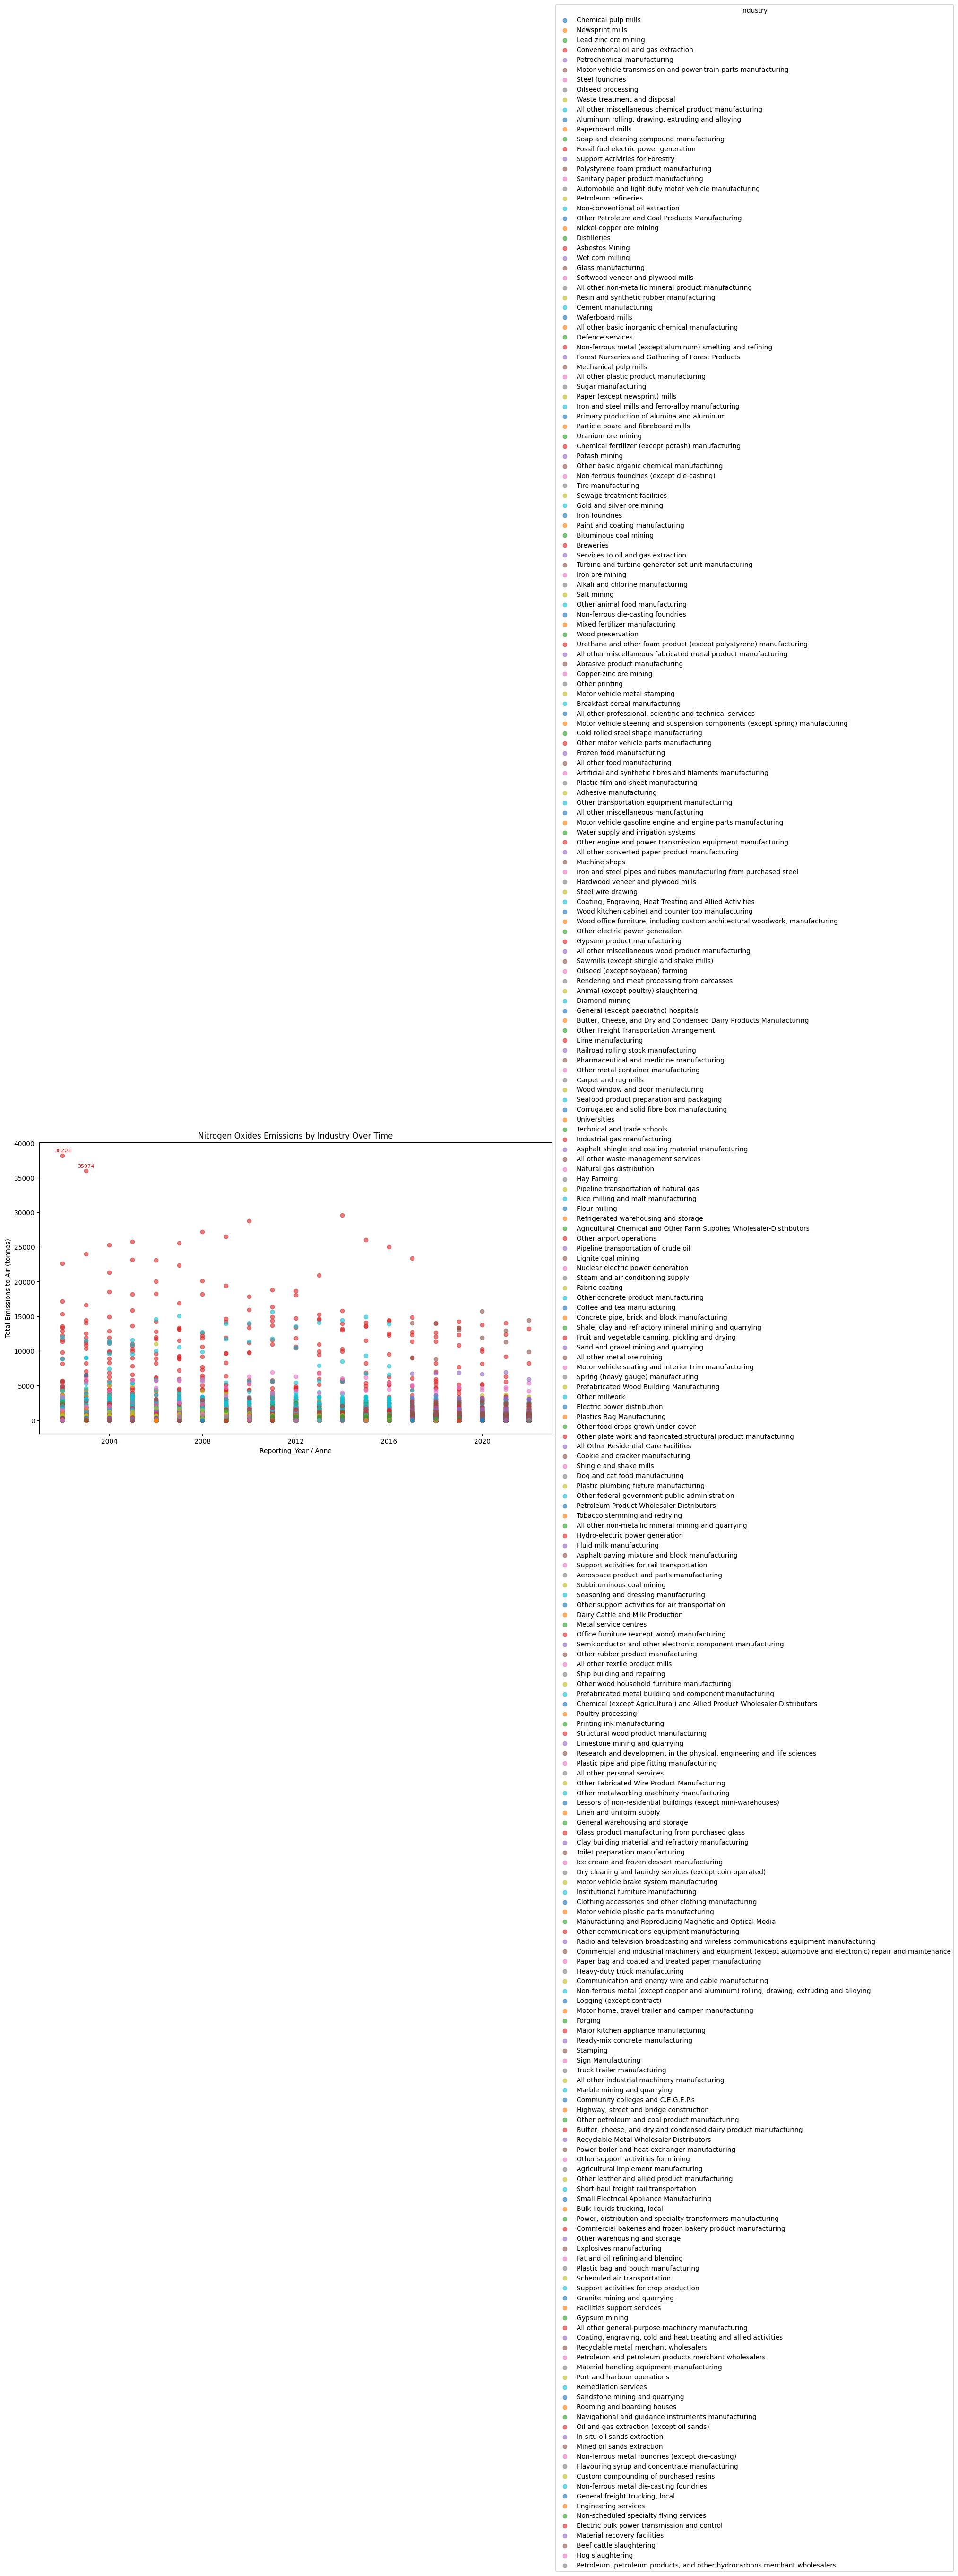

In [ ]:
# Set a threshold for annotation; adjust as needed to highlight key outliers
annotation_threshold = 30000  # Emissions threshold for annotation

# Plot emissions by industry
plt.figure(figsize=(14, 8))
for industry in nitrogen_df['NAICS Title / Titre Code_SCIAN'].unique():
    industry_data = nitrogen_df[nitrogen_df['NAICS Title / Titre Code_SCIAN'] == industry]
    plt.scatter(industry_data['Reporting_Year / Anne'], industry_data['Total_Release_to_Air'], label=industry, alpha=0.6)

    # Annotate points above the threshold
    for _, row in industry_data[industry_data['Total_Release_to_Air'] > annotation_threshold].iterrows():
        plt.annotate(f"{row['Total_Release_to_Air']:.0f}", (row['Reporting_Year / Anne'], row['Total_Release_to_Air']),
                     textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, color='red')

plt.title("Nitrogen Oxides Emissions by Industry Over Time")
plt.xlabel("Reporting_Year / Anne")
plt.ylabel("Total Emissions to Air (tonnes)")
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5), title="Industry")
plt.show()


This scatter plot displays nitrogen oxides emissions over time, separated by industry categories. Each dot represents emissions data for a specific industry in a particular year. Here’s what the visualization highlights:

Industry-Wise Distribution: Different colors represent different industries, showing the distribution of emissions across multiple sectors. This helps in identifying which industries contribute most to nitrogen oxide emissions over time.

Outliers: The labels highlight exceptionally high emission values above a set threshold (e.g., 30,000 tonnes), shown in red. These values stand out as significant outliers, likely from industries with larger environmental impacts.

Trend Over Time: The scatter plot suggests fluctuations in emissions from various industries over the years, with some industries showing consistently high emissions.

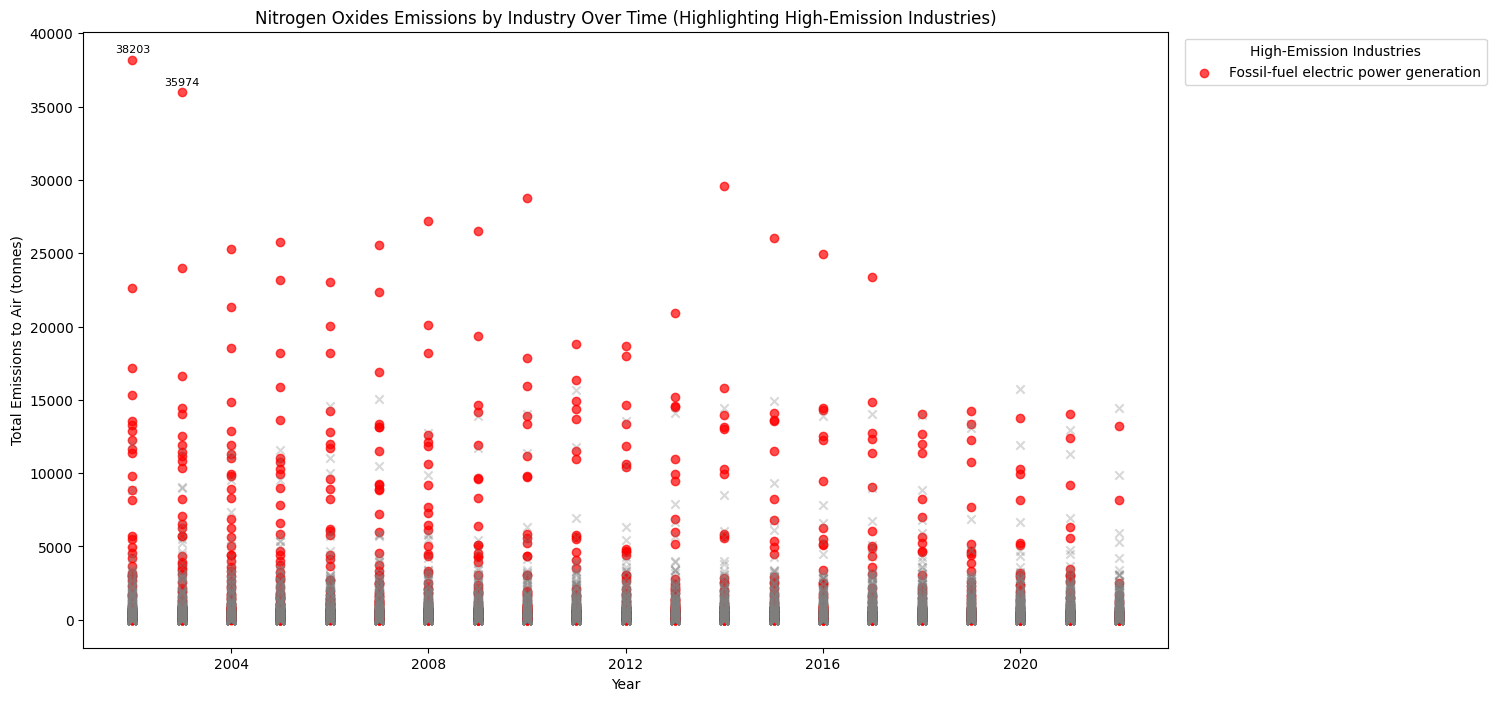

In [ ]:
import matplotlib.pyplot as plt

# Define the threshold for identifying high-emission values
extreme_threshold = 35000

# Filter the data to get only high-emission entries
high_emission_data = nitrogen_df[nitrogen_df['Total_Release_to_Air'] > extreme_threshold]

# Identify unique industries associated with high emissions
high_emission_industries = high_emission_data['NAICS Title / Titre Code_SCIAN'].unique()

# Plot all industries
plt.figure(figsize=(14, 8))
for industry in nitrogen_df['NAICS Title / Titre Code_SCIAN'].unique():
    industry_data = nitrogen_df[nitrogen_df['NAICS Title / Titre Code_SCIAN'] == industry]
    if industry in high_emission_industries:
        # Highlight high-emission industries with a different color and marker
        plt.scatter(industry_data['Reporting_Year / Anne'], industry_data['Total_Release_to_Air'], label=industry, color='red', alpha=0.7, marker='o')
    else:
        # Plot other industries with a lighter color
        plt.scatter(industry_data['Reporting_Year / Anne'], industry_data['Total_Release_to_Air'], color='grey', alpha=0.3, marker='x')

# Annotate the high-emission points
for _, row in high_emission_data.iterrows():
    plt.annotate(f"{row['Total_Release_to_Air']:.0f}", (row['Reporting_Year / Anne'], row['Total_Release_to_Air']),
                 textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, color='black')

plt.title("Nitrogen Oxides Emissions by Industry Over Time (Highlighting High-Emission Industries)")
plt.xlabel("Year")
plt.ylabel("Total Emissions to Air (tonnes)")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1), title="High-Emission Industries")
plt.show()


**To handle these outliers,**

Here, First we calculated the IQR and found that the lower bound value was negative. The negative value for the lower bound is due to the calculation of Q1 - 1.5 * IQR. Since the IQR value is relatively small (101.03), multiplying by 1.5 results in a value that, when subtracted from Q1, goes below zero. This is more common in skewed datasets where the IQR range is narrow compared to the overall range of values.

So, we decided to ignore the lower bound and take it zero, because it is unrealistic for emissions to have negative value.

In [ ]:
# Calculate the IQR for the 'Total_Release_to_Air' column in nitrogen_df
Q1 = nitrogen_df['Total_Release_to_Air'].quantile(0.25)
Q3 = nitrogen_df['Total_Release_to_Air'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the calculated IQR and bounds
print(f"IQR: {IQR}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

# Filter emissions data based on IQR
outliers = nitrogen_df[(nitrogen_df['Total_Release_to_Air'] < lower_bound) |
                       (nitrogen_df['Total_Release_to_Air'] > upper_bound)]


IQR: 101.03005
Lower bound: -125.575125
Upper bound: 278.545075


Here, then we implemented the lower bound to be zero and plotted a graph again. where we took threshold to be upper bound.

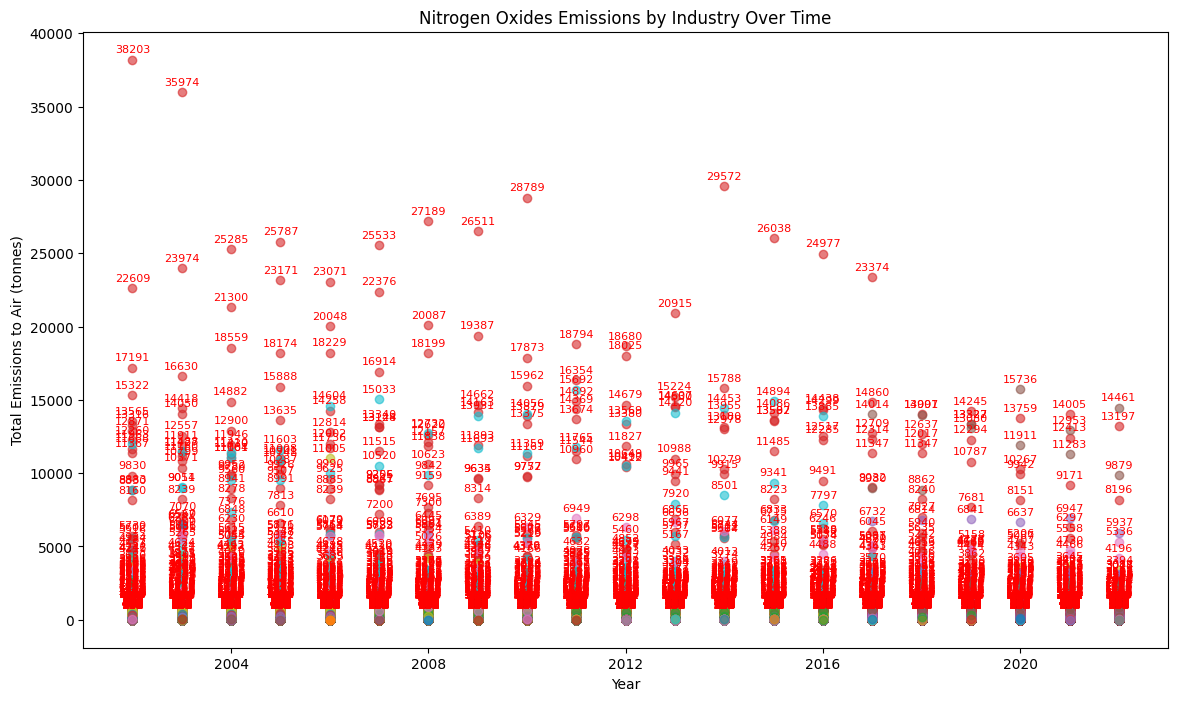

In [ ]:
import matplotlib.pyplot as plt

# Set annotation threshold based on IQR upper bound
annotation_threshold = upper_bound  # Use the upper bound calculated from IQR

# Plot emissions by industry
plt.figure(figsize=(14, 8))
for industry in nitrogen_df['NAICS Title / Titre Code_SCIAN'].unique():
    industry_data = nitrogen_df[nitrogen_df['NAICS Title / Titre Code_SCIAN'] == industry]
    plt.scatter(industry_data['Reporting_Year / Anne'], industry_data['Total_Release_to_Air'], label=industry, alpha=0.6)

    # Annotate points above the IQR-based threshold
    for _, row in industry_data[industry_data['Total_Release_to_Air'] > annotation_threshold].iterrows():
        plt.annotate(f"{row['Total_Release_to_Air']:.0f}", (row['Reporting_Year / Anne'], row['Total_Release_to_Air']),
                     textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, color='red')

plt.title("Nitrogen Oxides Emissions by Industry Over Time")
plt.xlabel("Year")
plt.ylabel("Total Emissions to Air (tonnes)")
plt.show()


Then,here, we saw that , considering the upper bound is very unrealistic approach because it tell you that all the values above upper bound is an outlier as upper bound is too low .So , we will not consider removing outliers just be calculating the IQR.

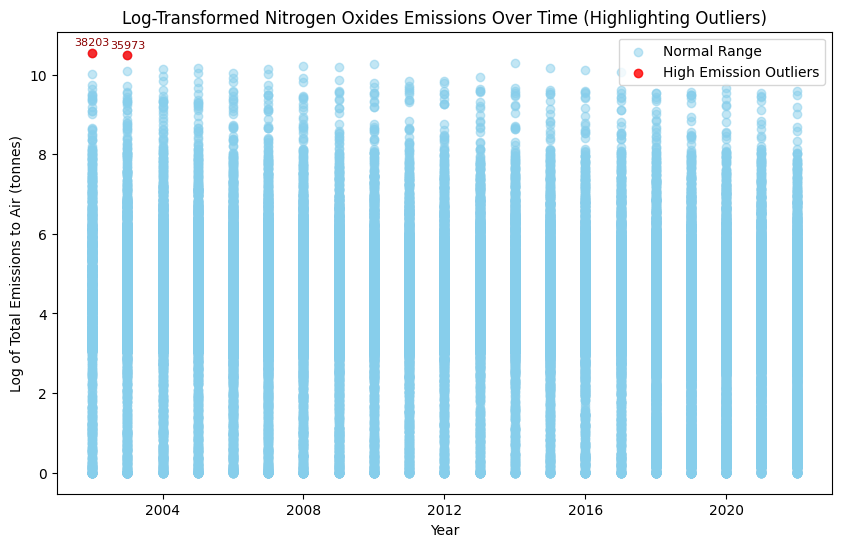

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a log-transformed threshold for identifying high-emission values
log_extreme_threshold = np.log1p(30000)  # Threshold based on original scale of 20,000 tonnes

# Create the log-transformed emissions column
nitrogen_df['Log_Total_Release_to_Air'] = np.log1p(nitrogen_df['Total_Release_to_Air'])

# Plotting with log-transformation
plt.figure(figsize=(10, 6))

# Plot all points in a lighter color
plt.scatter(nitrogen_df['Reporting_Year / Anne'], nitrogen_df['Log_Total_Release_to_Air'],
            color='skyblue', alpha=0.5, label="Normal Range")

# Highlight points above the threshold in a different color
high_emission_points = nitrogen_df[nitrogen_df['Log_Total_Release_to_Air'] > log_extreme_threshold]
plt.scatter(high_emission_points['Reporting_Year / Anne'], high_emission_points['Log_Total_Release_to_Air'],
            color='red', alpha=0.8, label="High Emission Outliers")

# Annotate the extreme outliers
for _, row in high_emission_points.iterrows():
    plt.annotate(f"{int(np.expm1(row['Log_Total_Release_to_Air'])):.0f}",
                 (row['Reporting_Year / Anne'], row['Log_Total_Release_to_Air']),
                 textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, color='darkred')

# Labels and title
plt.title("Log-Transformed Nitrogen Oxides Emissions Over Time (Highlighting Outliers)")
plt.xlabel("Year")
plt.ylabel("Log of Total Emissions to Air (tonnes)")
plt.legend(loc="upper right")
plt.show()


The emission values are transformed using the natural logarithm (log1p) to compress large values while maintaining the relative scale. This approach reduces the skewness and spreads out smaller emission values, allowing us to see patterns and clusters more clearly across the years.

These two unusually high emmisions seem contextual outliers...explained next

In [ ]:
# Filter rows in nitrogen_df where the Total_Release_to_Air matches the specified values
specific_emissions = nitrogen_df[nitrogen_df['Total_Release_to_Air'].isin([38203, 35974])]

# Display the relevant columns for these specific records
specific_emissions[['Reporting_Year / Anne', 'NAICS Title / Titre Code_SCIAN', 'PROVINCE', 'Total_Release_to_Air', 'Estimation_Method / Mthode_destimation']]

Reporting_Year / Anne         NAICS Title / Titre Code_SCIAN PROVINCE  \
24767            2002-01-01  Fossil-fuel electric power generation       ON   
48781            2003-01-01  Fossil-fuel electric power generation       ON   

       Total_Release_to_Air Estimation_Method / Mthode_destimation  
24767               38203.0    M1 - Continuous Emission Monitoring  
48781               35974.0    M1 - Continuous Emission Monitoring

In [ ]:
# Remove rows with specific emission values of 38,203 and 35,974
nitrogen_df = nitrogen_df[~nitrogen_df['Total_Release_to_Air'].isin([38203, 35974])]

In 2002 and 2003, Ontario's coal-fired power plants, particularly the Nanticoke Generating Station, recorded exceptionally high emissions of nitrogen oxides (NOx). This was largely due to the reliance on coal for power generation, as Ontario’s fossil-fuel power plants emitted substantial levels of pollutants, contributing significantly to air quality issues. These emissions became a key environmental concern, leading to various studies and policies aimed at addressing air pollution in Ontario.

Synapse Energy Economics, in a report for the Sierra Club Ontario, explored the impact of phasing out coal-fired plants in Ontario as part of compliance with the U.S.-Canada Ozone Annex. This phase-out aimed to reduce nitrogen oxides and sulfur dioxide emissions, aligning with broader efforts to combat smog and improve air quality. The study highlighted that Ontario’s coal plants, including Nanticoke, were substantial contributors to the region's pollution, making their emissions particularly relevant to regulatory initiatives targeting fossil-fuel pollution sources in the early 2000s​


These findings help explain why we observe contextual outliers in nitrogen oxide emissions for Ontario in 2002 and 2003 in our dataset, aligning with historical records of elevated pollution from fossil-fuel power generation in the province during that period.

Reference:

 Keith, G., Biewald, B., & White, D. E. (2003). A clean path to ozone annex compliance. Synapse Energy Economics. https://www.synapse-energy.com/sites/default/files/SynapseReport.2003-03.Sierra-Club-.Ontario-Ozone-Annex-Compliance.03-02.pdf

In [ ]:
nitrogen_df.to_csv('nitrogen_emissions_outliers_removed.csv', index=False)

# ***Now, for carbon monoxide***

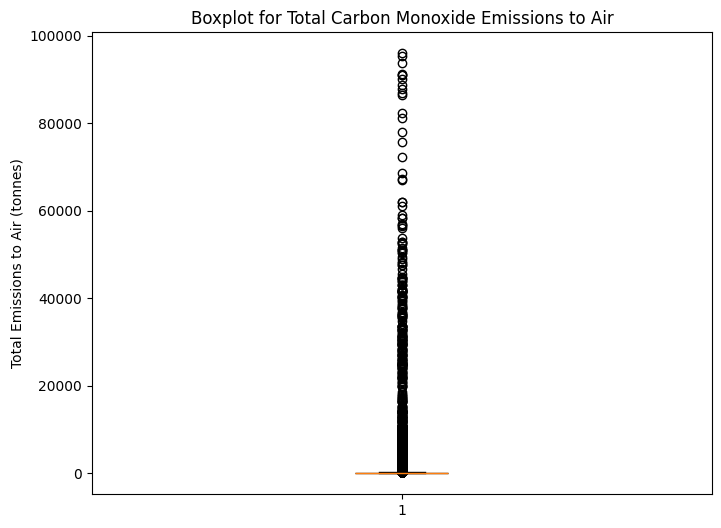

In [ ]:
# Creating a boxplot for Total Carbon Monoxide Emissions to Air
plt.figure(figsize=(8, 6))
plt.boxplot(carbon_monoxide_df['Total_Release_to_Air'], vert=True, patch_artist=True)
plt.title("Boxplot for Total Carbon Monoxide Emissions to Air")
plt.ylabel("Total Emissions to Air (tonnes)")
plt.show()

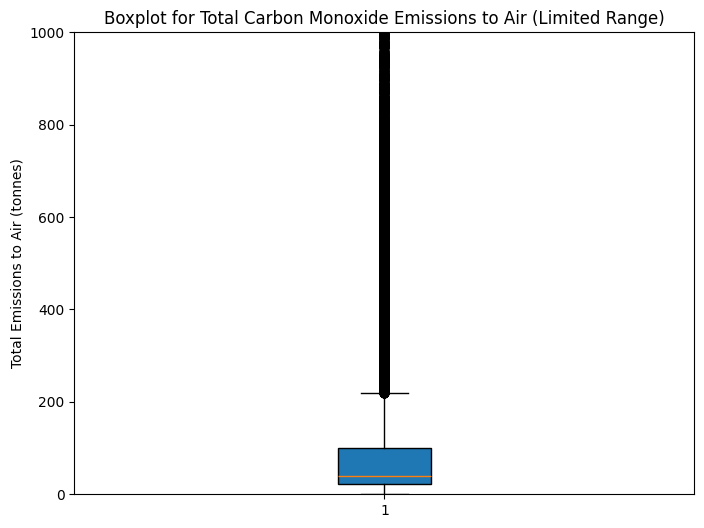

In [ ]:
# Creating a boxplot for Total Carbon Monoxide Emissions to Air with limited y-axis
plt.figure(figsize=(8, 6))
plt.boxplot(carbon_monoxide_df['Total_Release_to_Air'].dropna(), vert=True, patch_artist=True)
plt.ylim(0, 1000)  # Adjust this limit based on the typical range of data in the IQR
plt.title("Boxplot for Total Carbon Monoxide Emissions to Air (Limited Range)")
plt.ylabel("Total Emissions to Air (tonnes)")
plt.show()

This limit hides the extreme outliers so that the main data range is visible, providing a clearer view of the box (IQR) and whiskers.
This plot should make the middle 50% of the data (the IQR) and the whiskers more visible.

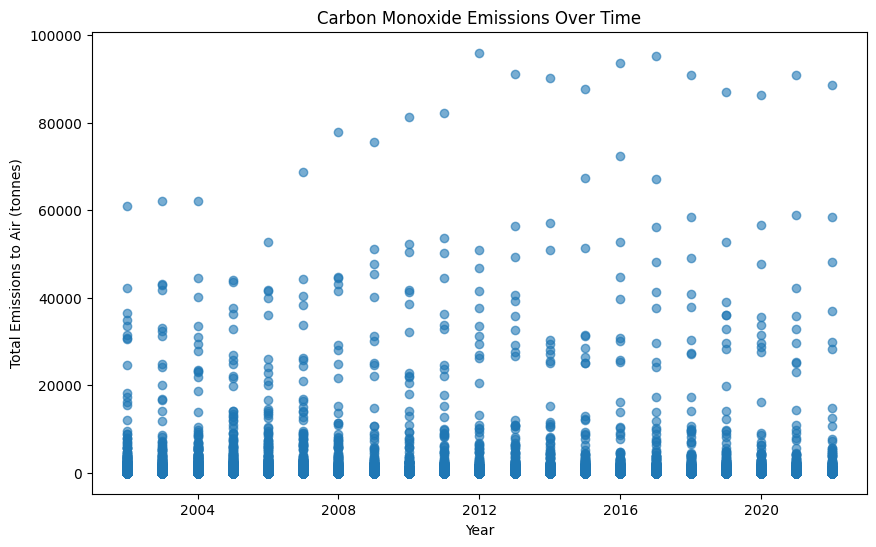

In [ ]:

# Scatter plot of Total Carbon Monoxide Emissions over Time
plt.figure(figsize=(10, 6))
plt.scatter(carbon_monoxide_df['Reporting_Year / Anne'], carbon_monoxide_df['Total_Release_to_Air'], alpha=0.6)
plt.title("Carbon Monoxide Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("Total Emissions to Air (tonnes)")
plt.show()

The scatter plot for Carbon Monoxide Emissions Over Time reveals some interesting patterns:

Observations
High Emission Outliers:

There are several points significantly above the main cluster of data, indicating high carbon monoxide emissions for certain years or entries. These could represent point outliers or specific facilities or events leading to high emissions.
Distribution Across Years:

The emissions appear relatively spread across years, with some consistent high emissions values around 2004–2010 and scattered spikes in recent years as well.
Possible Trends:

While there isn't a strong downward or upward trend, certain years seem to have clusters of higher values. This might indicate changes in industry practices or specific regulatory impacts.

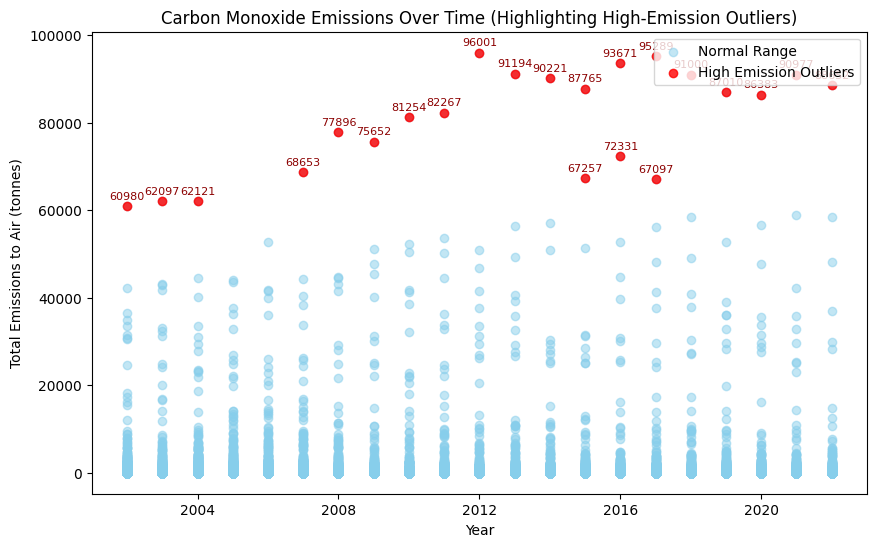

In [ ]:
# Define the threshold for highlighting extreme emissions
extreme_threshold = 60000

# Filter the data for high emissions values
high_emission_points = carbon_monoxide_df[carbon_monoxide_df['Total_Release_to_Air'] > extreme_threshold]

# Plotting the scatter plot with highlighted extreme values
plt.figure(figsize=(10, 6))

# Plot all points in a lighter color
plt.scatter(carbon_monoxide_df['Reporting_Year / Anne'], carbon_monoxide_df['Total_Release_to_Air'],
            color='skyblue', alpha=0.5, label="Normal Range")

# Highlight points above the threshold in a different color
plt.scatter(high_emission_points['Reporting_Year / Anne'], high_emission_points['Total_Release_to_Air'],
            color='red', alpha=0.8, label="High Emission Outliers")

# Annotate the extreme outliers
for _, row in high_emission_points.iterrows():
    plt.annotate(f"{row['Total_Release_to_Air']:.0f}", (row['Reporting_Year / Anne'], row['Total_Release_to_Air']),
                 textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, color='darkred')

# Labels and title
plt.title("Carbon Monoxide Emissions Over Time (Highlighting High-Emission Outliers)")
plt.xlabel("Year")
plt.ylabel("Total Emissions to Air (tonnes)")
plt.legend(loc="upper right")
plt.show()

These high-emission values appear to be collective outliers. Collective outliers are a group of data points that deviate significantly from the overall distribution, often due to specific factors rather than random fluctuations. In the case of carbon monoxide, we observed multiple years with consistently high emissions values that don’t align with the general emission trend across other data points. This pattern indicates that these high emissions are likely related to particular industrial processes or events rather than natural variation in emission levels.

In [ ]:
# Remove carbon monoxide emissions outliers above 60,000 tonnes
filtered_carbon_monoxide_df = carbon_monoxide_df[carbon_monoxide_df['Total_Release_to_Air'] <= 60000]

# Display the filtered DataFrame to verify changes
print(filtered_carbon_monoxide_df.shape)
print(filtered_carbon_monoxide_df['Total_Release_to_Air'].max())


(60092, 24)
59012.88


By removing these collective outliers, we create a more balanced and representative dataset. This adjustment is especially important when merging with the nitrogen data, where similar high-value outliers were identified and handled. Eliminating these extremes helps prevent skewed results in our analysis and ensures that the merged dataset better reflects typical emission levels across provinces over time. This balanced approach supports a more accurate analysis of trends and reduces the influence of extreme values on the overall insights derived from the data.

In [ ]:
carbon_monoxide_df.to_csv('carbon_monoxide_emissions_outliers_removed.csv', index=False)

**Outlier detection using Multivariate method:**

In [ ]:
from sklearn.ensemble import IsolationForest

# Function to detect and label outliers using Isolation Forest
def detect_outliers(df, features):
    # Initialize Isolation Forest
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    # Fit and predict
    df['Outlier'] = iso_forest.fit_predict(df[features])
    # Outliers are labeled as -1, and inliers as 1
    return df

# Applying the function to nitrogen_df using relevant features
features = ['Total_Release_to_Air', 'Number of employees']
nitrogen_df = detect_outliers(nitrogen_df, features)

# Applying the function to carbon_monoxide_df using relevant features
carbon_monoxide_df = detect_outliers(carbon_monoxide_df, features)

# To separate outliers for review
nitrogen_outliers = nitrogen_df[nitrogen_df['Outlier'] == -1]
carbon_outliers = carbon_monoxide_df[carbon_monoxide_df['Outlier'] == -1]


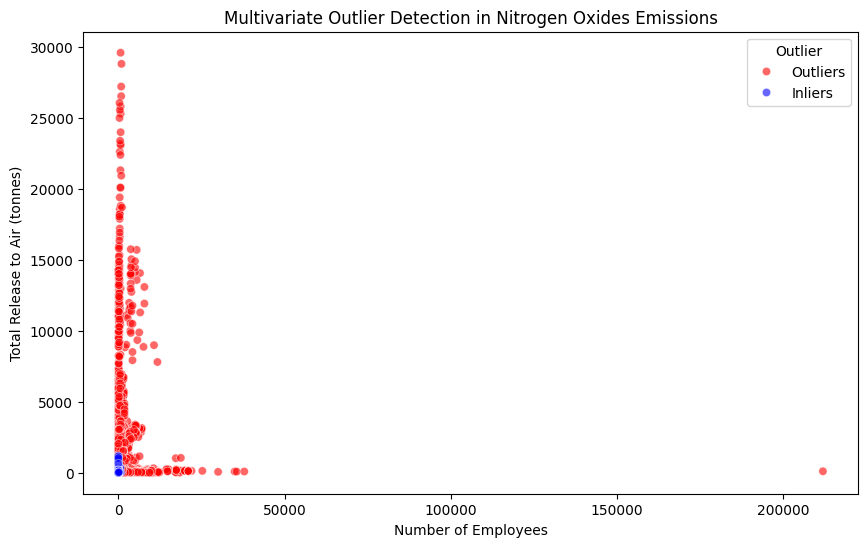

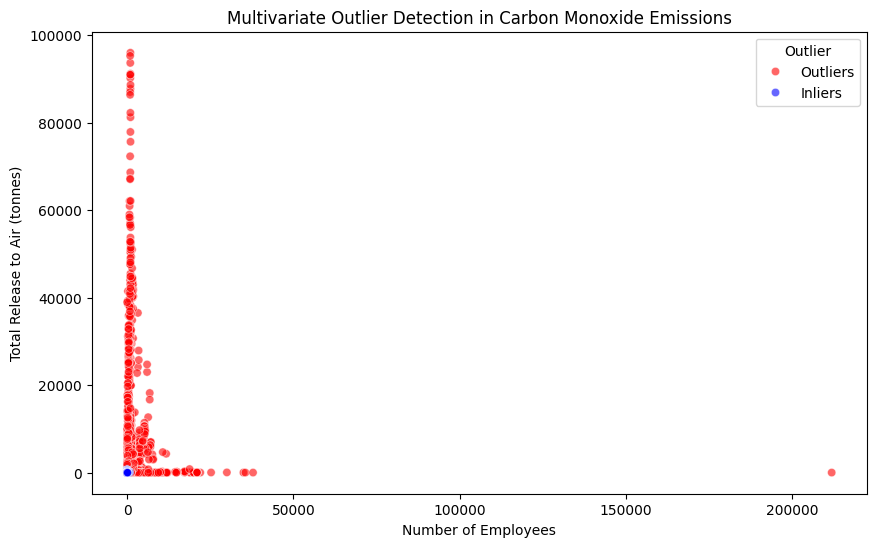

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_multivariate_outliers(df, title):
    # Scatter plot of 'Total Release to Air' vs 'Number of employees'
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='Number of employees',
        y='Total_Release_to_Air',
        hue=df['Outlier'].map({1: 'Inliers', -1: 'Outliers'}) ,
        palette={'Inliers': 'blue', 'Outliers': 'red'},
        data=df,
        alpha=0.6
    )
    plt.title(title)
    plt.xlabel('Number of Employees')
    plt.ylabel('Total Release to Air (tonnes)')
    plt.legend(title='Outlier', loc='upper right')
    plt.show()

# Plot for nitrogen_df
plot_multivariate_outliers(nitrogen_df, 'Multivariate Outlier Detection in Nitrogen Oxides Emissions')

# Plot for carbon_monoxide_df
plot_multivariate_outliers(carbon_monoxide_df, 'Multivariate Outlier Detection in Carbon Monoxide Emissions')


The majority of data points cluster around lower values for both Total Release to Air and Number of Employees, showing that typical facilities tend to have moderate emissions.
A few data points show extreme values in either emissions or employee numbers, flagged as outliers. For example, some points have high emissions even with a low employee count, which might suggest intense, emission-heavy processes or automation in production.

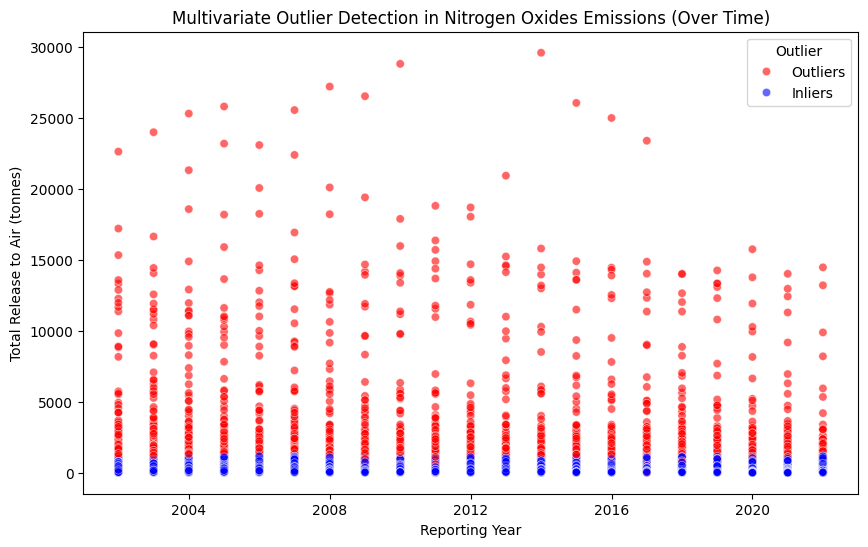

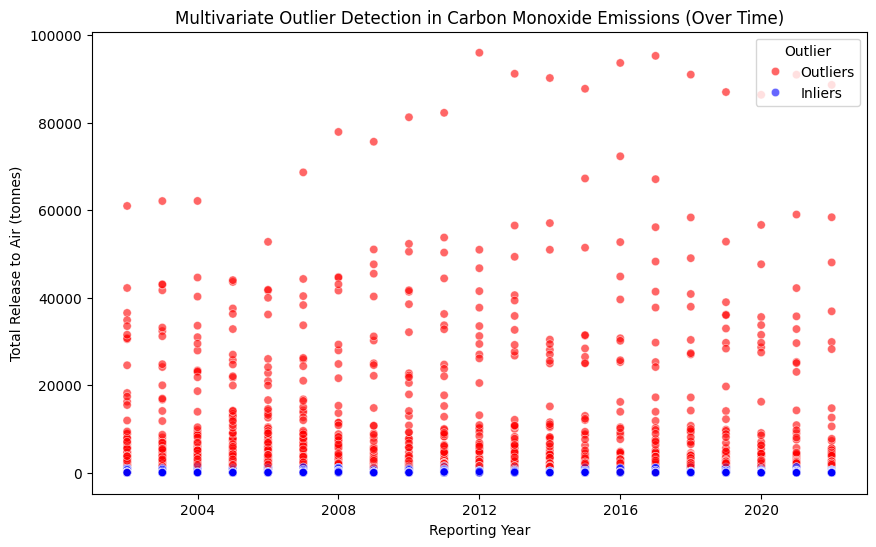

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_multivariate_outliers_year(df, title):
    # Scatter plot of 'Reporting Year' vs 'Total Release to Air'
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='Reporting_Year / Anne',
        y='Total_Release_to_Air',
        hue=df['Outlier'].map({1: 'Inliers', -1: 'Outliers'}),  # Map values to labels for the legend
        palette={'Inliers': 'blue', 'Outliers': 'red'},          # Explicitly set colors
        data=df,
        alpha=0.6
    )
    plt.title(title)
    plt.xlabel('Reporting Year')
    plt.ylabel('Total Release to Air (tonnes)')
    plt.legend(title='Outlier', loc='upper right')
    plt.show()

# Plot for nitrogen_df
plot_multivariate_outliers_year(nitrogen_df, 'Multivariate Outlier Detection in Nitrogen Oxides Emissions (Over Time)')

# Plot for carbon_monoxide_df
plot_multivariate_outliers_year(carbon_monoxide_df, 'Multivariate Outlier Detection in Carbon Monoxide Emissions (Over Time)')


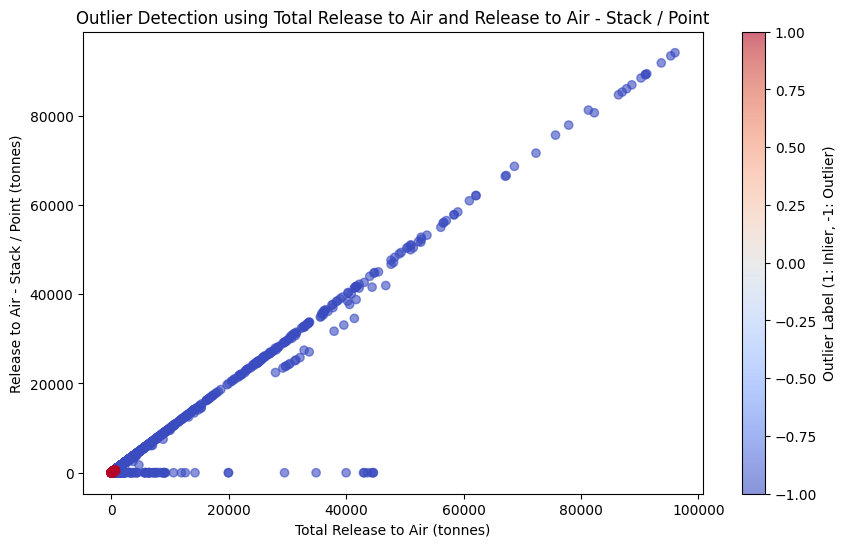

In [ ]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Selecting two other features for analysis
features = ['Total_Release_to_Air', 'Release to Air - Stack / Point']

# Initialize Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model and predict outliers
outlier_preds = iso_forest.fit_predict(carbon_monoxide_df[features])

# Add predictions to the dataframe for easy plotting
carbon_monoxide_df['Outlier'] = outlier_preds

# Plotting the data points with inliers and outliers distinguished
plt.figure(figsize=(10, 6))
plt.scatter(carbon_monoxide_df['Total_Release_to_Air'], carbon_monoxide_df['Release to Air - Stack / Point'],
            c=carbon_monoxide_df['Outlier'], cmap='coolwarm', alpha=0.6)
plt.xlabel('Total Release to Air (tonnes)')
plt.ylabel('Release to Air - Stack / Point (tonnes)')
plt.title('Outlier Detection using Total Release to Air and Release to Air - Stack / Point')
plt.colorbar(label='Outlier Label (1: Inlier, -1: Outlier)')
plt.show()


In [ ]:
pricing_data = pd.read_csv('canadian_carbon_pricing_per_province.csv', encoding='latin1')